<b>Data mining project - 2020/21</b><br>
<b>Authors</b>: [Alexandra Bradan](https://github.com/alexandrabradan), [Alice Graziani](https://github.com/alicegraziani25) and [Eleonora Cocciu](https://github.com/eleonoracocciu)<br>
<b>Python version</b>: 3.x<br>
<b>Last update: 21/05/2021<b>

In [73]:
import os
import sys

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

from collections import Counter

In [74]:
tracks = pd.read_csv('../../data/fma_metadata/tracks.csv', index_col=0, header=[0, 1])

In [75]:
tracks.head()

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

                                                                          \
         favorites id                                information listens   
track_id                                                                   
2                4  1                                    <p></p>    6073   
3                4  1                                    <p></p>    6073   
5                4  1                                    <p></p>    6073   
10               4  6                                        NaN   47632   
20               2  4  <p> "spiritual songs" from Nicky Cook</p>    2710   

                        ...       track                         \
         producer tags  ... information interest language_code   
track_id                ...                                      
2             NaN   []  ...         NaN     4656            en   
3             NaN   []  ...         NaN     1470            en   
5             NaN   []  ...         NaN     1933            en   
10            NaN   []  ...         NaN    54881            en   
20            NaN   []  ...         NaN      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                 
         number publisher tags            title  
track_id                                         
2             3       NaN   []             Food  
3             4       NaN   []     Electric Ave  
5             6       NaN   []       This World  
10            1       NaN   []          Freeway  
20            3       NaN   []  Spiritual Level  

[5 rows x 52 columns]

In [269]:
tracks.shape

(106574, 52)

In [270]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   (album, comments)            106574 non-null  int64  
 1   (album, date_created)        103045 non-null  object 
 2   (album, date_released)       70294 non-null   object 
 3   (album, engineer)            15295 non-null   object 
 4   (album, favorites)           106574 non-null  int64  
 5   (album, id)                  106574 non-null  int64  
 6   (album, information)         83149 non-null   object 
 7   (album, listens)             106574 non-null  int64  
 8   (album, producer)            18060 non-null   object 
 9   (album, tags)                106574 non-null  object 
 10  (album, title)               105549 non-null  object 
 11  (album, tracks)              106574 non-null  int64  
 12  (album, type)                100066 non-null  object 
 13 

<h2> Checking duplicate rows </h2>

In [271]:
# calculate duplicated rows
dups = tracks.duplicated()
# report if there are any duplicates
print("Duplicate rows = ", dups.any(), sep="\t")

# list all duplicate rows
# print(df[dups])

# delete duplicate rows
# df.drop_duplicates(inplace=True)

Duplicate rows = 	False


<h2> Checking missing values </h6>

In [272]:
for column_name in tracks.columns:
    # count number of rows with missing values
    data = tracks[column_name]
    n_miss = data.isnull().sum()
    perc = n_miss / tracks.shape[0] * 100
    if n_miss > 0:
        print( '%s, Missing: %d (%.1f%% of rows) ' % (column_name, n_miss, perc))

('album', 'date_created'), Missing: 3529 (3.3% of rows) 
('album', 'date_released'), Missing: 36280 (34.0% of rows) 
('album', 'engineer'), Missing: 91279 (85.6% of rows) 
('album', 'information'), Missing: 23425 (22.0% of rows) 
('album', 'producer'), Missing: 88514 (83.1% of rows) 
('album', 'title'), Missing: 1025 (1.0% of rows) 
('album', 'type'), Missing: 6508 (6.1% of rows) 
('artist', 'active_year_begin'), Missing: 83863 (78.7% of rows) 
('artist', 'active_year_end'), Missing: 101199 (95.0% of rows) 
('artist', 'associated_labels'), Missing: 92303 (86.6% of rows) 
('artist', 'bio'), Missing: 35418 (33.2% of rows) 
('artist', 'date_created'), Missing: 856 (0.8% of rows) 
('artist', 'latitude'), Missing: 62030 (58.2% of rows) 
('artist', 'location'), Missing: 36364 (34.1% of rows) 
('artist', 'longitude'), Missing: 62030 (58.2% of rows) 
('artist', 'members'), Missing: 59725 (56.0% of rows) 
('artist', 'related_projects'), Missing: 93422 (87.7% of rows) 
('artist', 'website'), Mis

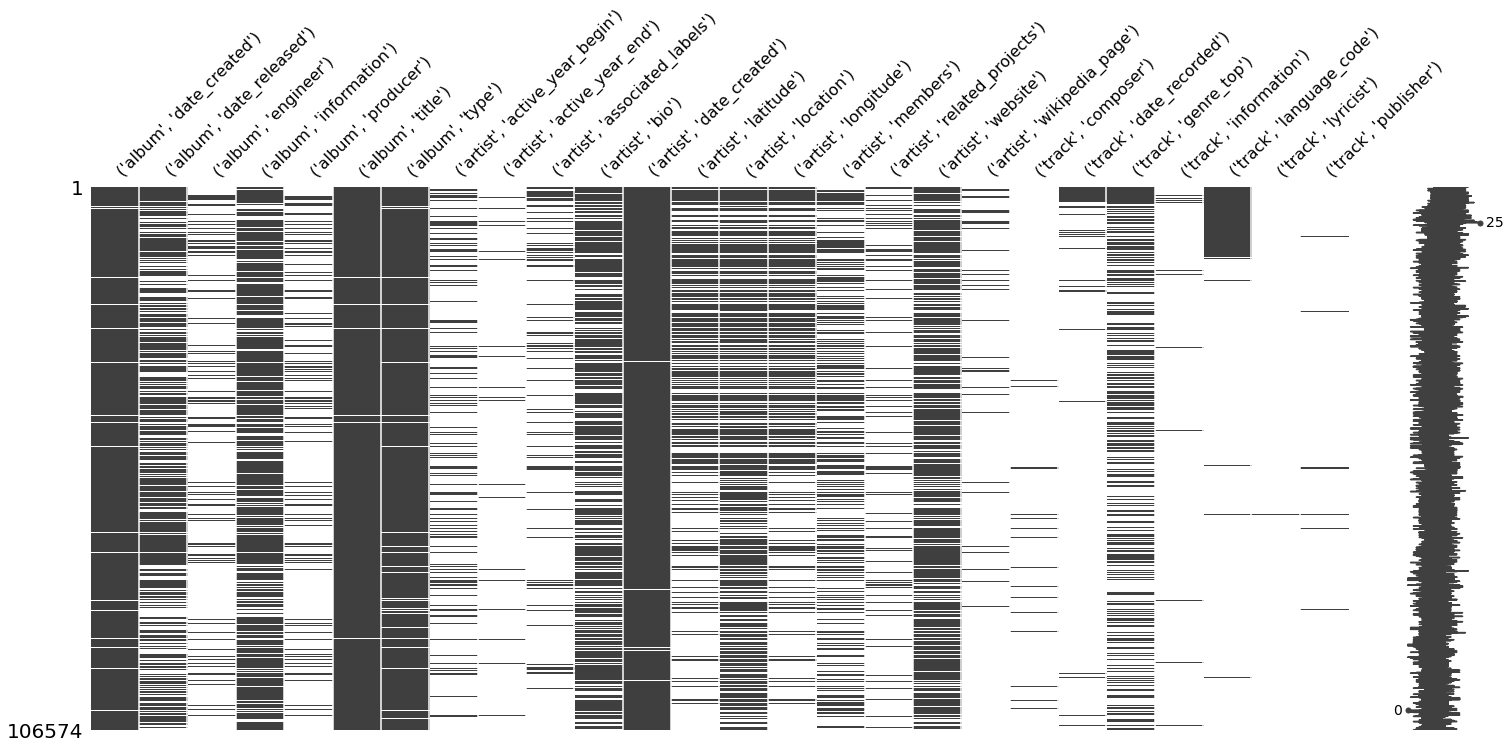

In [273]:
filtered_tracks = msno.nullity_filter(tracks, filter='bottom', p=0.999)
msno.matrix(filtered_tracks)

<h6> Eliminating columns with >= 60% of missing values </h6>

In [274]:
for column_name in tracks.columns:
    # count number of rows with missing values
    data = tracks[column_name]
    n_miss = data.isnull().sum()
    perc = n_miss / tracks.shape[0] * 100
    if n_miss > 0:
        if perc >= 60:
            del tracks[column_name]
            print("%s DELETE" % str(column_name))

tracks.shape

('album', 'engineer') DELETE
('album', 'producer') DELETE
('artist', 'active_year_begin') DELETE
('artist', 'active_year_end') DELETE
('artist', 'associated_labels') DELETE
('artist', 'related_projects') DELETE
('artist', 'wikipedia_page') DELETE
('track', 'composer') DELETE
('track', 'date_recorded') DELETE
('track', 'information') DELETE
('track', 'language_code') DELETE
('track', 'lyricist') DELETE
('track', 'publisher') DELETE


(106574, 39)

In [275]:
for column_name in tracks.columns:
    # count number of rows with missing values
    data = tracks[column_name]
    n_miss = data.isnull().sum()
    perc = n_miss / tracks.shape[0] * 100
    if n_miss > 0:
        print( '%s, Missing: %d (%.1f%% of rows) ' % (column_name, n_miss, perc))

('album', 'date_created'), Missing: 3529 (3.3% of rows) 
('album', 'date_released'), Missing: 36280 (34.0% of rows) 
('album', 'information'), Missing: 23425 (22.0% of rows) 
('album', 'title'), Missing: 1025 (1.0% of rows) 
('album', 'type'), Missing: 6508 (6.1% of rows) 
('artist', 'bio'), Missing: 35418 (33.2% of rows) 
('artist', 'date_created'), Missing: 856 (0.8% of rows) 
('artist', 'latitude'), Missing: 62030 (58.2% of rows) 
('artist', 'location'), Missing: 36364 (34.1% of rows) 
('artist', 'longitude'), Missing: 62030 (58.2% of rows) 
('artist', 'members'), Missing: 59725 (56.0% of rows) 
('artist', 'website'), Missing: 27318 (25.6% of rows) 
('track', 'genre_top'), Missing: 56976 (53.5% of rows) 
('track', 'license'), Missing: 87 (0.1% of rows) 
('track', 'title'), Missing: 1 (0.0% of rows) 


17 tracks.csv's features are removed due to the high number of missing values. Now we try to impute the remaing missing value columns.

<h2>First tracks' genre understanding </h2>

From tracks' "genre_top" feature we find out that the dataset is unbalanced in respect to the 16 main music genres. The three, most prominent features are:

1. Rock (14,182)
2. Experimental (10,608)
3. Electronic (9,372)

All the other **72,412 tracks** (among which 56,976 must be impunted since they present NaN values) belong to the remaining 13 main genres.

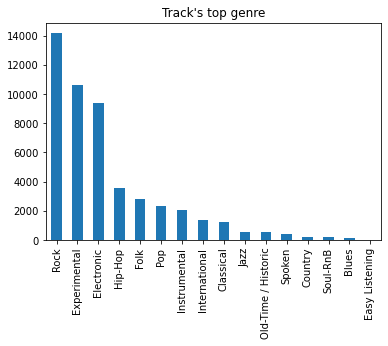

In [94]:
tracks[[('track', 'genre_top')]].apply(pd.value_counts).plot(kind='bar', legend=False, title="Track's top genre")

In [82]:
rock = tracks[tracks[('track', 'genre_top')] == "Rock"].shape[0] 
rock

14182

In [79]:
experimental = tracks[tracks[('track', 'genre_top')] == "Experimental"].shape[0] 
experimental

10608

In [80]:
electronic = tracks[tracks[('track', 'genre_top')] == "Electronic"].shape[0] 
electronic

9372

<h6>Songs NOT having as main genre Rock, Experimental or Electronic</h6>

In [83]:
tracks.shape[0] - (rock + experimental + electronic)

72412

<h6>among which NaN genre_top: </h6>

In [84]:
tracks[(tracks[('track', 'genre_top')].isna())].shape[0]

56976

<h6> so untill genre_top imputation we have:</h6<

In [85]:
tracks.shape[0] - (rock + experimental + electronic) - tracks[(tracks[('track', 'genre_top')].isna())].shape[0]

15436

<h6>Songs having as main genre Rock, Experimental or Electronic</h6>

In [66]:
tracks[tracks[('track', 'genre_top')] == "Rock"].shape[0] + \
tracks[tracks[('track', 'genre_top')] == "Experimental"].shape[0] + \
tracks[tracks[('track', 'genre_top')] == "Electronic"].shape[0]

34162

<h2> First imputation attempt </h2>

In [276]:
def get_column_nan_indexes(column_name):
    return tracks[tracks[(column_name)].isna() == True].index.tolist()

In [294]:
def imputation_based_on_ids(album_or_artist_flag, colum_name):
    impunted = 0 
    record_indeces = get_column_nan_indexes(colum_name)
    for record_index in record_indeces:
        print(record_index)
        if album_or_artist_flag == 'album' or album_or_artist_flag == 'artist':
            my_id = tracks.at[record_index, (album_or_artist_flag, 'id')]
            tmp_list = tracks[(tracks[(album_or_artist_flag, 'id')] == my_id) 
                            & ~(tracks[colum_name].isna())][colum_name].tolist()
        else:
            album_id = tracks.at[record_index, ('album', 'id')]
            artists_id = tracks.at[record_index, ('artist', 'id')]
            bit_rate = tracks.at[record_index, ('track', 'bit_rate')]
            tmp_list = tracks[(tracks[('album', 'id')] == album_id)
                            & (tracks[('artist', 'id')] == artist_id)
                            # & (tracks[('track', 'bit_rate')] == bit_rate) 
                            & ~(tracks[colum_name].isna())][colum_name].tolist()
            """tmp_list = tracks[(tracks[(album_or_artist_flag, 'id')] == my_id) 
                            & ~(tracks[colum_name].isna())][colum_name].tolist()"""
        if len(tmp_list) > 0:
            my_set = set()
            for elem in tmp_list:
                my_set.add(elem)
            if len(my_set) == 1:
                impunted_value =  list(my_set)[0]
                print("missing_record_index=%s" % record_index, "impunted_value=%s" % impunted_value)
                # tracks.at[record_index, colum_name] = impunted_value
            elif len(my_set) > 1:
                tmp_tuple_list = Counter(list(my_set))
                impunted_value = tmp_tuple_list.most_common(1)[0][0]
                print("missing_record_index=%s" % record_index, "impunted_value=%s" % impunted_value)
                # tracks.at[record_index, colum_name] = impunted_value
            else:
                # print("Error for set=%s" % str(my_set))
                sys.exit(-1)
            impunted += 1
    print("impunted=%s" % impunted)

<h6> ('track', 'title') imputation </h6>

In [278]:
record_indeces = get_column_nan_indexes(('track', 'title'))
print(record_indeces)
for record_index in record_indeces:
    print("title", tracks.at[record_index, ('track', 'title')])
    print("artist_id", tracks.at[record_index, ('artist', 'id')])
    print("album_id", tracks.at[record_index, ('album', 'id')])
    print("bit_rate", tracks.at[record_index, ('track', 'bit_rate')])

[26620]
title nan
artist_id 3148
album_id 5786
bit_rate 192000


In [279]:
tracks[(tracks[('artist', 'id')] == 3148) 
       & (tracks[('album', 'id')] == 5786) 
       & (tracks['track', 'bit_rate'] == 192000)
       & ~(tracks['track', 'title'].isna())][('track', 'title')]

Series([], Name: (track, title), dtype: object)

In [280]:
tracks[(tracks[('artist', 'id')] == 3148) 
       & (tracks[('album', 'id')] == 5786) 
       & (tracks['track', 'bit_rate'] == 192000)
       & (tracks['track', 'title'].isna())] = "Unknown"

Doesn't exist tracks having the same artist id, album id and the same bit_rate, so we can't trace the only track's missing title. This, however, isn't a problem, since **we won't use title as a feature for our data mining tasks** (we will eliminate title feaure in the future). For now, we will craft a track title, calling the song **Unknown**.

<h6> ('track', 'license') imputation </h6>
First, we check if among missing license tracks, the relative album id is featuring in another record (track) with field licese filled.

In [281]:
imputation_based_on_ids('album', ('track', 'license'))

impunted=1


Since only for one record we found an associated album id having the license field not empty, we proceded imputing it with the retrieved information and for the other records we check if artist id can enclode the missing information.

In [282]:
imputation_based_on_ids('artist', ('track', 'license'))

impunted=43


43 tracks still doesn't have a license, since the relative artists haven't one. This, however, isn't a problem, since **we won't use license as a feature for our data mining tasks** (we will eliminate title feaure in the future). For now, we will craft a new license value, calling it **Unknown**.

In [283]:
tracks[(tracks[('track', 'license')].isna())].shape[0]

43

In [284]:
unkown_indeces = tracks[(tracks[('track', 'license')].isna())].index.tolist()
for idx in unkown_indeces:
    tracks.at[idx, ('track', 'license')] = "Unknown"

In [285]:
tracks[(tracks[('track', 'license')].isna())].shape[0]

0

<h6> ('track', 'genre_top') imputation </h6>

In [296]:
imputation_based_on_ids('album', ('track', 'genre_top'))

20
missing_record_index=20 impunted_value=Pop
26
missing_record_index=26 impunted_value=Pop
30
missing_record_index=30 impunted_value=Pop
46
missing_record_index=46 impunted_value=Pop
48
missing_record_index=48 impunted_value=Pop
185
236
246
248
250
251
253
254
418
missing_record_index=418 impunted_value=Experimental
420
missing_record_index=420 impunted_value=Experimental
422
missing_record_index=422 impunted_value=Experimental
423
missing_record_index=423 impunted_value=Experimental
440
441
442
443
444
445
446
447
448
449
450
451
452
461
462
463
464
465
554
555
556
557
558
559
560
561
613
871
872
873
900
901
902
903
1076
missing_record_index=1076 impunted_value=Experimental
1213
1215
1216
1217
1219
1220
1222
1223
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238
1349
1352
1353
1384
missing_record_index=1384 impunted_value=International
1429
1574
1575
1865
1867
1869
1871
1873
1892
missing_record_index=1892 impunted_value=Folk
2010
2624
3256
3257
3258
3259
3260
3261

9279
9319
9320
9321
9322
9323
9324
9325
9326
9327
9328
9329
9330
9331
9332
9334
9335
9343
9344
9362
9363
9364
9365
9366
9367
9368
9370
9371
9372
9373
9374
9375
9376
9377
9378
9379
9380
9381
9382
9383
9384
9385
9386
9387
9388
9389
9390
9391
9392
9393
9394
9395
9396
9399
9401
9403
9404
9405
9406
9407
9408
9409
9410
9411
9412
9413
9414
9415
9416
9417
9418
9419
9420
9421
9422
9423
9424
9425
9426
9427
9428
9429
9430
9431
9432
9433
9434
9435
9436
9437
9439
9440
9441
9442
9443
9445
9446
9447
9448
9449
9451
9452
9453
9454
9455
9456
9457
9458
9459
9460
9461
9463
9464
9466
9467
9468
9469
9470
9475
9484
9485
9486
9487
9488
9489
9494
9510
9522
9524
9525
9526
9527
9529
9530
9545
9546
9547
9548
9549
9581
9582
9583
9584
9585
9586
9587
9647
9648
9649
9660
missing_record_index=9660 impunted_value=Classical
9661
missing_record_index=9661 impunted_value=Classical
9665
missing_record_index=9665 impunted_value=Rock
9667
missing_record_index=9667 impunted_value=Classical
9668
9674
missing_record_index=9674 

11128
11129
11130
11131
11132
11133
11134
11135
11151
11152
11153
11154
11156
11202
missing_record_index=11202 impunted_value=Rock
11203
missing_record_index=11203 impunted_value=Rock
11210
11211
11213
11214
missing_record_index=11214 impunted_value=Rock
11248
11250
11253
11254
11260
11265
missing_record_index=11265 impunted_value=Rock
11267
missing_record_index=11267 impunted_value=Rock
11269
missing_record_index=11269 impunted_value=Rock
11270
missing_record_index=11270 impunted_value=Rock
11271
missing_record_index=11271 impunted_value=Rock
11272
missing_record_index=11272 impunted_value=Rock
11274
missing_record_index=11274 impunted_value=Rock
11300
missing_record_index=11300 impunted_value=Rock
11307
missing_record_index=11307 impunted_value=Rock
11308
missing_record_index=11308 impunted_value=Rock
11309
11310
11434
11436
11438
11439
11440
11441
11442
11443
11444
11445
11463
missing_record_index=11463 impunted_value=Rock
11471
11472
11477
11478
11479
11480
11481
11482
11483
11484


13232
13233
13234
13235
13236
13237
13239
13240
13241
13242
13244
13245
13246
13247
13248
13249
13250
13251
13252
13253
13264
13265
13266
13267
13268
13269
13270
13271
13316
missing_record_index=13316 impunted_value=Classical
13322
missing_record_index=13322 impunted_value=Pop
13323
missing_record_index=13323 impunted_value=Pop
13345
13346
13347
13348
13349
13352
13353
13354
13355
13356
13357
13358
13359
13360
13364
missing_record_index=13364 impunted_value=Pop
13368
missing_record_index=13368 impunted_value=Pop
13379
missing_record_index=13379 impunted_value=Pop
13380
missing_record_index=13380 impunted_value=Pop
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
missing_record_index=134

15729
15730
15732
15733
15734
15735
15736
15737
15738
15739
15744
15751
15752
15753
15774
15788
15789
15790
15791
15792
15793
15794
15795
15799
missing_record_index=15799 impunted_value=Spoken
15800
missing_record_index=15800 impunted_value=Spoken
15801
missing_record_index=15801 impunted_value=Spoken
15802
missing_record_index=15802 impunted_value=Spoken
15803
missing_record_index=15803 impunted_value=Spoken
15850
15851
15852
15853
15854
15855
15856
15872
15881
15882
15883
15884
15885
15886
15887
15888
15889
15890
15891
15892
15895
15896
15897
15898
15899
15900
15901
15902
15903
15904
15905
15906
15907
15908
15909
15910
15911
15912
15914
15916
15917
15918
15919
15920
15921
15922
15923
15924
15925
15926
15927
15928
15929
15930
15931
15932
15933
15934
15935
15936
15937
15938
15939
15940
15943
15945
15946
15947
15948
15950
15952
15953
15954
15955
15956
15957
15958
15959
15971
15972
15973
15974
15975
15977
15978
15979
15980
15981
15982
15983
15984
15998
15999
16000
16001
16002
16003
16004

18850
18851
18852
18853
18854
18855
18856
18857
18858
18859
18860
18861
18862
18863
18864
18865
18866
18867
18868
18869
18870
18871
18872
18873
missing_record_index=18873 impunted_value=Classical
18892
18917
18918
18919
18920
18921
18922
18923
18924
18925
18926
18927
18928
18929
18930
18931
18932
18934
18935
18936
18937
18938
18939
18940
18941
18942
18943
18944
19057
19060
19061
19063
19064
19065
19066
19067
19068
19069
19190
19191
19196
19198
19199
19201
19202
19205
19206
19207
19208
19209
19210
19211
19212
19214
19246
19247
19248
19250
19251
19252
19253
19254
19255
19256
19257
19260
19261
19275
19276
19277
19278
19279
19280
19281
19282
19283
19284
19285
19286
19287
19291
missing_record_index=19291 impunted_value=Experimental
19296
missing_record_index=19296 impunted_value=Classical
19301
19322
19323
19324
19325
19368
19371
19372
19373
19374
19376
missing_record_index=19376 impunted_value=Spoken
19377
missing_record_index=19377 impunted_value=Spoken
19379
missing_record_index=19379 im

missing_record_index=21718 impunted_value=Folk
21719
missing_record_index=21719 impunted_value=Folk
21720
missing_record_index=21720 impunted_value=Folk
21722
missing_record_index=21722 impunted_value=Folk
21744
missing_record_index=21744 impunted_value=Folk
21745
missing_record_index=21745 impunted_value=Folk
21747
missing_record_index=21747 impunted_value=Folk
21748
missing_record_index=21748 impunted_value=Folk
21749
missing_record_index=21749 impunted_value=Folk
21786
21788
21792
21793
21795
missing_record_index=21795 impunted_value=Classical
21801
21820
21821
21822
21823
21824
21825
21826
21827
21828
21829
21830
21831
21832
21833
21834
21835
21836
21851
21852
21853
21854
21968
21969
21970
21972
22009
22010
22011
22013
22056
22057
22058
22059
22060
22061
22062
22063
22064
22065
22066
22067
22163
22164
22165
22166
22167
22168
22169
22170
22171
22172
22173
22174
22175
22176
22177
22178
22191
22192
22193
22194
22195
22196
22197
22198
22199
22200
22201
22202
22203
22204
22205
22206
222

24285
24286
24287
24288
24289
24290
24291
24292
24293
24294
24295
24296
24297
24298
24299
24300
24301
24302
24303
24304
24305
24306
24307
24308
24309
24310
24311
24312
24313
24314
24315
24316
24317
24318
24319
24320
24321
24322
24323
24325
24326
24327
24328
24329
24342
24343
24344
24345
24346
24347
24348
24349
24350
24351
24352
missing_record_index=24352 impunted_value=Rock
24353
24354
24355
24356
24357
24372
24373
24374
24381
24383
24384
24404
24405
24406
24407
24409
24410
24411
24413
24414
24415
24416
24433
24434
24435
24436
24437
24438
24439
24440
24441
24442
24443
24444
24445
24446
24447
24450
24451
24452
24453
24454
24455
24456
24457
24458
24459
24531
missing_record_index=24531 impunted_value=Rock
24556
missing_record_index=24556 impunted_value=Classical
24557
24558
24559
24560
24561
24562
24563
24564
24565
24566
24567
24568
24573
24574
24575
24576
24577
24578
24579
24580
24581
24582
24583
24584
24585
24586
24587
24588
24589
24590
24591
24592
24593
24594
24595
24596
24597
24598
24

missing_record_index=27339 impunted_value=Rock
27347
27348
27351
27352
27353
27354
27355
27356
27357
27358
27359
27360
27361
27398
27399
27400
27401
27402
missing_record_index=27402 impunted_value=Classical
27403
missing_record_index=27403 impunted_value=Classical
27415
27417
27437
27461
missing_record_index=27461 impunted_value=Electronic
27468
27469
27470
27471
27472
27473
27474
27475
27476
27477
27478
27479
missing_record_index=27479 impunted_value=Pop
27480
27481
27482
27483
27484
27485
27486
27487
27488
27489
27490
27491
27492
27493
27494
27495
27496
27497
27498
27499
27500
27502
27503
27504
27505
27506
27507
27508
27509
27510
27511
27512
27513
27514
27515
27516
27517
27518
27519
27520
27521
27522
27523
27524
27525
27526
27527
27528
27543
27544
27545
27553
27577
missing_record_index=27577 impunted_value=Classical
27578
27579
missing_record_index=27579 impunted_value=Classical
27585
27586
27587
27588
27589
27635
27636
27637
27638
27639
27640
27641
27680
27681
27682
27683
27684
2768

30108
30109
30110
30116
30117
30167
30180
30181
30182
30183
30184
30185
30186
30187
30188
30189
30190
missing_record_index=30190 impunted_value=Electronic
30195
missing_record_index=30195 impunted_value=Electronic
30204
missing_record_index=30204 impunted_value=Electronic
30205
missing_record_index=30205 impunted_value=Electronic
30208
missing_record_index=30208 impunted_value=Electronic
30251
30252
30253
30254
30255
30256
30257
30258
30259
30260
30261
30262
30263
30264
30265
30290
30291
30292
missing_record_index=30292 impunted_value=Classical
30294
30295
30296
30297
30298
30299
30300
30301
30312
30332
30333
30334
30335
30336
30337
30338
30339
30340
30341
30342
30343
30344
30345
30346
30348
30349
30350
30351
30352
30353
30354
30355
30356
30357
30358
30359
30360
30361
30362
30363
30364
30365
30366
30367
30368
30369
30370
30371
30372
30373
30386
30387
30388
30389
30390
30391
30392
30394
30395
30419
30420
30421
30422
30423
30424
30425
30426
30427
30428
30429
30430
30431
30432
30433
30434

32581
32582
32583
32585
32588
32589
32590
32591
32592
32593
32594
32605
32606
32607
32608
32609
32610
32611
32613
32614
32616
32617
32618
32619
32620
32621
32622
32623
32624
32625
32626
32627
32628
32629
32630
32633
missing_record_index=32633 impunted_value=Classical
32634
missing_record_index=32634 impunted_value=Classical
32635
32636
32670
32671
32672
32673
32674
32675
32676
32707
32708
32709
32710
32711
32712
32713
32714
32736
32737
32738
32739
32740
32741
32749
missing_record_index=32749 impunted_value=Folk
32751
missing_record_index=32751 impunted_value=Folk
32754
missing_record_index=32754 impunted_value=Folk
32757
missing_record_index=32757 impunted_value=Folk
32794
32796
32797
32798
32799
32801
32802
32803
32804
32805
32806
32807
32809
32816
32817
32818
32819
32820
32821
32859
32860
32861
32862
32863
32864
32865
32866
32867
32868
32869
32870
32871
32872
32873
32884
32885
32886
32887
32924
32925
32926
32927
32928
32929
32930
32931
32932
32933
32934
32935
32936
32937
32938
32939


35405
35406
35407
35408
35409
35410
35411
35412
35413
35414
35415
35416
35417
35432
35434
35437
35438
35463
35464
35502
35503
35504
35505
35506
35507
35508
35509
35510
35511
35512
35513
35514
35515
35516
35517
35518
35519
35520
35521
35522
35523
35557
35558
35570
35617
35618
35619
35620
35621
35622
35623
35624
35625
35626
35627
35628
35629
35630
35631
35632
35633
35634
35635
35636
35637
35638
35639
35640
35641
35642
35643
35644
35645
35646
35647
35648
35649
35650
35651
35698
35699
35700
35701
35702
35704
35705
35706
35707
35708
35709
35710
35711
35713
35718
35719
35720
35721
35722
35723
35724
35725
35730
35732
35733
35755
35756
35757
35758
35759
35760
35761
35762
35763
35764
35765
35766
35767
35768
35769
35770
35771
35772
35785
35786
35787
35788
35789
35790
35791
35792
35793
35794
35795
35796
35797
35798
35799
35800
35801
35802
35803
35804
35805
35806
35807
35808
35809
35810
35811
35812
35813
35814
35815
35816
35849
35850
35851
35852
35853
35854
35855
35856
35857
35858
35859
35860
3586

37899
37900
37901
37902
37903
37904
37905
37906
37907
37908
37909
37910
37981
37982
37983
37984
37985
38004
38005
38007
38008
38024
38059
38060
38061
38062
38063
38064
38066
38067
38136
38211
38222
38223
38224
38225
38226
38227
38241
38242
38243
38244
38245
38246
38247
38248
38249
38250
38251
38252
38253
38273
38274
38275
38276
38277
38278
38279
38280
38281
38282
38283
38284
38285
38286
38287
38288
38289
38290
38291
38292
38293
38294
38295
38296
38297
38311
38319
38329
38330
38331
38336
38356
38357
38358
38359
38360
38380
38381
38382
38383
38384
38385
38386
38387
38388
38389
38398
missing_record_index=38398 impunted_value=Folk
38400
missing_record_index=38400 impunted_value=Folk
38401
missing_record_index=38401 impunted_value=Folk
38402
missing_record_index=38402 impunted_value=Folk
38403
missing_record_index=38403 impunted_value=Folk
38404
missing_record_index=38404 impunted_value=Folk
38406
missing_record_index=38406 impunted_value=Folk
38407
missing_record_index=38407 impunted_value

40186
40187
40188
40189
40190
40191
40192
40193
40194
40195
40196
40197
40198
40199
40200
40202
40203
40204
40205
40206
40207
40208
40209
40210
40211
40212
40213
40217
40218
40219
40220
40221
40222
40223
40224
40226
40259
40260
missing_record_index=40260 impunted_value=Rock
40261
missing_record_index=40261 impunted_value=Experimental
40262
missing_record_index=40262 impunted_value=Rock
40263
missing_record_index=40263 impunted_value=Rock
40268
40283
40284
40285
40286
40287
40288
40292
40293
40294
40295
40296
40297
40298
40299
40300
40301
40302
40303
40304
40305
40306
40307
40308
40309
40310
40311
40312
40313
40314
40315
40316
40317
40318
40319
40320
40321
40322
40323
40324
40325
40326
40327
40328
40329
40330
40331
40332
40333
40334
40335
40343
40344
40345
40346
40347
40348
40349
40350
40389
40390
40391
40392
40394
40395
40396
40397
40398
40408
40409
40410
40411
40412
40413
40422
40423
40424
40425
40426
40427
40428
40429
40430
40431
40432
40450
40451
40452
40453
40454
40455
40456
40487


missing_record_index=42024 impunted_value=International
42026
missing_record_index=42026 impunted_value=International
42032
missing_record_index=42032 impunted_value=International
42041
missing_record_index=42041 impunted_value=Pop
42042
missing_record_index=42042 impunted_value=Pop
42047
missing_record_index=42047 impunted_value=Pop
42050
missing_record_index=42050 impunted_value=Pop
42051
missing_record_index=42051 impunted_value=Pop
42052
42054
42055
42056
42057
42058
42059
42060
42061
42062
42063
42064
42065
42074
42075
42076
42077
42078
42079
42080
42081
42082
42083
42084
42085
42127
42173
42174
42175
42176
42177
42178
42179
42181
42182
42183
42184
42185
42187
42188
42189
42190
42191
42192
42193
42194
42219
42220
42221
42222
42223
42224
42225
42226
42227
42228
42229
42230
42231
42251
42252
42253
42254
42255
42266
42267
42268
42270
42271
42291
42292
42293
42294
42295
42296
42297
42298
42313
42314
42315
42316
42317
42318
42319
42320
42321
42322
42323
42324
42325
42326
42327
42328
42

44785
44786
44787
44788
44789
44790
44807
missing_record_index=44807 impunted_value=Pop
44808
missing_record_index=44808 impunted_value=Pop
44811
missing_record_index=44811 impunted_value=Pop
44812
missing_record_index=44812 impunted_value=Pop
44813
missing_record_index=44813 impunted_value=Pop
44814
missing_record_index=44814 impunted_value=Pop
44815
missing_record_index=44815 impunted_value=Pop
44816
missing_record_index=44816 impunted_value=Pop
44817
44818
44819
44826
44827
44828
44829
44830
44831
44832
44833
44834
44835
44836
44837
44838
44839
44840
44841
44842
44843
44844
44845
44846
44847
44858
44859
44860
44861
44862
44875
44880
44882
44883
44884
44885
44897
44898
44899
44900
44901
44902
44903
44904
44905
44906
44907
44908
44909
44910
44911
44912
44913
44914
44915
44923
44924
44925
44926
44927
44928
44929
44930
44931
44932
44933
44934
44935
44936
44937
44938
44939
44940
44941
44942
44943
44944
44945
44955
44956
44957
44987
44988
44989
44990
44991
44992
44993
44995
44996
44997
44

missing_record_index=47927 impunted_value=Experimental
47929
missing_record_index=47929 impunted_value=Experimental
47936
47937
47938
47941
47942
47943
47958
47959
47960
47997
missing_record_index=47997 impunted_value=Rock
47999
missing_record_index=47999 impunted_value=Rock
48000
missing_record_index=48000 impunted_value=Rock
48001
missing_record_index=48001 impunted_value=Rock
48002
missing_record_index=48002 impunted_value=Rock
48003
missing_record_index=48003 impunted_value=Rock
48004
missing_record_index=48004 impunted_value=Rock
48005
missing_record_index=48005 impunted_value=Rock
48006
missing_record_index=48006 impunted_value=Rock
48007
missing_record_index=48007 impunted_value=Rock
48009
missing_record_index=48009 impunted_value=Rock
48011
missing_record_index=48011 impunted_value=Rock
48012
missing_record_index=48012 impunted_value=Rock
48013
missing_record_index=48013 impunted_value=Rock
48014
missing_record_index=48014 impunted_value=Rock
48016
48017
48018
48019
48020
48021

50732
50733
50734
50735
50736
50737
50738
50739
50740
50741
50742
50743
50777
50778
50779
50780
50781
50782
50783
50814
50815
50816
50817
50872
50873
50953
missing_record_index=50953 impunted_value=Folk
50957
missing_record_index=50957 impunted_value=Folk
50959
missing_record_index=50959 impunted_value=Folk
50973
missing_record_index=50973 impunted_value=Jazz
50985
missing_record_index=50985 impunted_value=Jazz
50986
missing_record_index=50986 impunted_value=Jazz
50991
missing_record_index=50991 impunted_value=Jazz
50992
missing_record_index=50992 impunted_value=Jazz
50994
missing_record_index=50994 impunted_value=Jazz
50995
missing_record_index=50995 impunted_value=Jazz
50996
missing_record_index=50996 impunted_value=Jazz
50998
50999
51003
missing_record_index=51003 impunted_value=International
51007
missing_record_index=51007 impunted_value=International
51013
51014
51017
51018
51019
51020
51021
51034
51035
51036
51037
51038
51039
51040
51041
51042
51043
51044
51045
51046
51047
51048

53313
53314
53315
53316
53317
53318
53319
53320
53321
53322
53323
53325
53326
53327
53328
53330
53364
missing_record_index=53364 impunted_value=Rock
53382
53383
53384
53385
53386
53387
53388
53389
53390
53391
53392
53393
53394
53396
53399
53400
53401
53407
53408
53409
53410
53411
53412
53413
53414
53415
53416
53417
53418
53420
53421
53422
53423
53424
53425
53426
53427
53428
53429
53430
53431
53437
missing_record_index=53437 impunted_value=Classical
53438
53439
53441
53497
missing_record_index=53497 impunted_value=Experimental
53579
53580
53581
53582
53583
53584
53585
53593
53594
53648
53649
53650
53651
53652
53653
53654
53660
missing_record_index=53660 impunted_value=Classical
53661
53668
53670
53671
53674
53676
missing_record_index=53676 impunted_value=Experimental
53677
missing_record_index=53677 impunted_value=International
53678
53679
53680
53684
53693
53694
53696
53697
53699
53700
53701
53702
53703
53704
53705
53706
53707
53708
53709
53710
53711
53712
53759
missing_record_index=53

55428
55450
55482
55484
55485
55486
55487
55488
55543
55544
55592
55593
missing_record_index=55593 impunted_value=Classical
55720
missing_record_index=55720 impunted_value=Classical
55755
55787
55797
55798
55799
55800
55801
55802
55803
55804
55805
55806
55863
55864
55865
55866
55867
55868
55869
55884
55885
55886
55887
55888
55889
55890
55891
55892
55911
missing_record_index=55911 impunted_value=Spoken
55934
55935
55936
55937
55959
55960
55961
55962
55963
55985
55986
55987
55988
55989
55990
55991
55992
55993
55994
56023
56024
56026
56027
56037
56040
missing_record_index=56040 impunted_value=Experimental
56041
missing_record_index=56041 impunted_value=Experimental
56054
56057
56058
56059
missing_record_index=56059 impunted_value=Classical
56062
56063
56064
missing_record_index=56064 impunted_value=Classical
56068
56069
56070
56071
56072
56073
56074
56075
56077
56078
56079
56080
56081
56109
56110
56111
56112
56113
56114
56115
56116
56117
56126
56127
56128
56129
56130
56131
56132
56133
561

missing_record_index=58217 impunted_value=Rock
58218
missing_record_index=58218 impunted_value=Rock
58219
missing_record_index=58219 impunted_value=Rock
58220
missing_record_index=58220 impunted_value=Rock
58226
missing_record_index=58226 impunted_value=Rock
58229
missing_record_index=58229 impunted_value=Electronic
58231
missing_record_index=58231 impunted_value=Classical
58271
58272
58273
58274
58275
58276
58277
58278
58281
58282
58283
58284
58285
58286
58287
58288
58289
58290
58291
58292
58293
58294
58295
58296
58297
58298
58299
58300
58301
58302
58303
58304
58305
58306
58307
58308
58309
58310
58311
58312
58313
58315
58316
58318
58319
58320
58321
58322
58323
58324
58325
58327
58328
58329
58330
58331
58332
58335
missing_record_index=58335 impunted_value=Rock
58336
missing_record_index=58336 impunted_value=Rock
58337
missing_record_index=58337 impunted_value=Rock
58338
missing_record_index=58338 impunted_value=Rock
58339
missing_record_index=58339 impunted_value=Rock
58340
missing_rec

60949
60950
60951
60952
60975
60976
60977
60978
60979
61014
61015
61016
61017
61107
61108
61110
61111
61112
61113
61114
61116
61117
61118
61119
61120
61121
61123
61132
61133
61134
61135
61136
61137
61138
61139
61140
61141
61142
61143
61144
61145
61146
61147
61148
61149
61150
61151
61152
61153
61154
61155
61156
61157
61178
61179
61449
missing_record_index=61449 impunted_value=Hip-Hop
61456
61457
61459
61471
61472
61473
61474
61475
61476
61480
61483
missing_record_index=61483 impunted_value=Classical
61494
61495
61496
61497
61498
61499
61500
61501
61502
61503
61504
61505
61507
61508
61509
61510
61511
61512
61526
61541
61542
61571
61572
61573
61574
61575
61576
61577
61578
61579
61580
61581
61582
61583
61584
61585
61586
61599
61600
61639
61640
61641
61643
61644
61645
61651
61652
61653
61654
61655
61656
61657
61658
61659
61660
61666
missing_record_index=61666 impunted_value=Pop
61671
missing_record_index=61671 impunted_value=Pop
61672
missing_record_index=61672 impunted_value=Pop
61673
miss

64389
64390
64391
64392
64393
64395
64396
64397
64398
64399
64400
64401
64402
64403
64404
64405
64406
64411
64412
missing_record_index=64412 impunted_value=Classical
64414
64415
64418
64419
64420
64421
64422
64423
64424
64425
64426
64427
64428
64429
64430
64433
64434
64435
64436
64437
64438
64439
64440
64441
64442
64443
64460
64461
64462
missing_record_index=64462 impunted_value=Experimental
64480
64481
64482
64483
64484
64485
64486
64507
64508
64509
64510
64511
64512
64513
64514
64524
64525
64526
64527
64528
64529
64530
64531
64532
64533
64534
64575
64576
64577
64578
64588
missing_record_index=64588 impunted_value=Classical
64589
missing_record_index=64589 impunted_value=Classical
64662
64672
64673
64674
64675
64676
64677
64678
64679
64680
64681
64682
64683
64684
64685
64686
64687
64711
64713
64714
64716
64717
64722
64748
64749
64753
64754
64755
64756
64758
64759
64777
64778
64779
64780
64781
64782
64783
64784
64785
64786
64793
64794
64795
64797
64798
64799
64800
64801
64802
64815
648

66572
66573
66574
66575
66576
66577
66578
66579
66580
66581
66582
66583
66584
66585
66586
66587
66588
66589
66590
66591
66592
66593
66594
66595
66596
66597
66598
66599
66600
66601
66602
66603
66604
66605
66606
66607
66608
66609
66610
66611
66612
66613
66614
66615
66616
66617
66618
66619
66620
66621
66622
66623
66624
66625
66627
66628
66629
66630
66631
missing_record_index=66631 impunted_value=Electronic
66639
66651
66652
66653
66654
66674
66675
66676
66677
66678
66679
66680
66681
66682
66683
66684
66685
66686
66687
66688
66709
missing_record_index=66709 impunted_value=Electronic
66710
66712
66718
66719
66720
66721
66722
66723
66724
66725
66726
66727
66728
66729
66730
66731
66734
66735
66736
66737
66738
66739
66740
66741
66742
66744
missing_record_index=66744 impunted_value=Instrumental
66745
missing_record_index=66745 impunted_value=Instrumental
66746
missing_record_index=66746 impunted_value=Instrumental
66747
missing_record_index=66747 impunted_value=Instrumental
66748
missing_record

69078
69079
69080
69159
missing_record_index=69159 impunted_value=Classical
69161
69162
69163
69164
69165
69166
69167
69168
69169
69179
69180
69190
69191
69192
69214
69215
69216
69217
69218
69219
69220
69224
69225
69226
69227
69228
69229
69230
69231
69232
69233
69234
69235
69236
69237
69238
69239
69240
69241
69242
69243
69244
69245
69246
69247
69248
69249
69250
69251
69252
69253
69254
69255
69256
69314
69315
69316
69317
69318
69319
69320
69321
69322
69323
69324
69325
69326
69327
69328
69329
69330
69331
69332
69333
69334
69335
69336
69337
69347
69348
69458
69573
69575
69576
69577
69578
69596
69597
69598
69599
69600
69601
69603
69604
69605
69606
69607
69608
69609
69610
69611
69612
69613
69614
69615
69616
69617
69618
69619
69620
69621
69622
69623
69624
69625
69626
69627
69628
69629
69630
69631
69632
69633
69634
69635
69654
69655
69658
69659
69660
69661
69663
missing_record_index=69663 impunted_value=Classical
69697
69698
69699
69700
69701
69702
69703
69704
69705
69706
69748
69749
69750
69

71467
71468
71469
71470
71471
71472
71473
71474
71475
71476
71478
71479
71480
71481
71482
71493
71494
71495
71496
71497
71498
71499
71500
71501
71517
71518
71519
71520
71521
71522
71523
71524
71525
71548
71549
71550
71570
71571
71572
71573
71574
71575
71577
71578
71579
71580
71581
71582
71583
71584
71585
71586
71587
71588
71589
71590
71591
71592
71593
71594
71595
71596
71597
71598
71599
71600
71606
71705
71706
71707
71708
71712
71713
71716
71718
71724
71725
71727
71728
71729
71730
71731
71732
71734
71735
71736
71737
71738
71739
71740
71741
71742
71743
71744
71746
71747
71748
71749
71750
71751
71752
71761
71762
71763
71764
71765
71766
71767
71768
71826
71827
71828
71829
71830
71831
71832
71833
71834
71835
71836
71837
71838
71839
71840
71841
71842
71843
71845
71846
71847
71848
71849
71850
71851
71852
71853
71854
71855
71856
71887
71911
71912
71914
71915
71916
71918
71919
71939
missing_record_index=71939 impunted_value=Classical
71940
missing_record_index=71940 impunted_value=Classical
71

73935
73936
73937
73938
73940
73941
73942
73943
73944
73945
73946
73947
73948
73949
73950
73951
73952
73953
73954
73955
73956
73957
73958
73959
73960
73961
73962
73963
73964
73965
73966
73967
73968
73969
73970
73971
73972
73979
73980
73981
73982
73983
73984
73985
73986
74008
74010
74011
74012
74013
74014
74015
74016
74017
74018
74019
74020
74021
74022
74023
74024
74025
74026
74027
74028
74029
74030
74031
74032
74033
74034
74035
74036
74037
74038
74053
74054
74055
74056
74057
74058
74059
74060
74061
74062
74063
74064
74090
74111
74112
74113
74117
74118
74119
74120
74121
74122
74123
74124
74125
74143
74165
74166
74167
74168
74169
74192
74199
74200
74201
74202
74203
74205
74206
74207
74208
74209
74210
74211
74212
74213
74214
74215
74216
74217
74219
missing_record_index=74219 impunted_value=Electronic
74230
74231
74232
74241
74242
74243
74244
74245
74246
74247
74248
74249
74250
74251
74252
74253
74254
74255
74256
74269
74270
74271
74272
74273
74274
74275
74276
74277
74278
74279
74280
74281

77374
77375
77376
77377
77378
77379
77380
77450
77451
77452
77453
77454
77455
77456
77457
77458
77459
77460
77461
77462
77463
77464
77465
77466
77467
77468
77470
77471
77472
77473
77474
77475
77476
77477
77479
77480
77481
77482
77483
77484
77485
77486
77487
77488
77489
77490
77491
77492
77493
77494
77495
77496
77497
77498
77499
77500
77501
77502
77503
77504
77505
77506
77507
77508
77509
77510
77511
77512
77513
77515
77516
77539
77540
77541
77542
77543
77544
77545
77546
77547
77548
77549
77550
77551
77552
77557
77560
77561
77562
77563
missing_record_index=77563 impunted_value=Pop
77566
missing_record_index=77566 impunted_value=Pop
77568
missing_record_index=77568 impunted_value=Pop
77569
missing_record_index=77569 impunted_value=Pop
77570
missing_record_index=77570 impunted_value=Pop
77575
missing_record_index=77575 impunted_value=Pop
77576
missing_record_index=77576 impunted_value=Pop
77577
missing_record_index=77577 impunted_value=Pop
77581
77582
77583
77585
77587
77589
77593
77594
77

missing_record_index=81450 impunted_value=Instrumental
81451
missing_record_index=81451 impunted_value=Instrumental
81452
missing_record_index=81452 impunted_value=Instrumental
81453
missing_record_index=81453 impunted_value=Instrumental
81454
missing_record_index=81454 impunted_value=Instrumental
81455
missing_record_index=81455 impunted_value=Instrumental
81456
missing_record_index=81456 impunted_value=Instrumental
81458
missing_record_index=81458 impunted_value=Instrumental
81459
missing_record_index=81459 impunted_value=Instrumental
81460
missing_record_index=81460 impunted_value=Instrumental
81461
missing_record_index=81461 impunted_value=Instrumental
81462
missing_record_index=81462 impunted_value=Instrumental
81463
missing_record_index=81463 impunted_value=Instrumental
81464
missing_record_index=81464 impunted_value=Instrumental
81465
missing_record_index=81465 impunted_value=Instrumental
81466
missing_record_index=81466 impunted_value=Instrumental
81467
missing_record_index=814

missing_record_index=81622 impunted_value=Instrumental
81625
81626
81627
81628
81629
81630
81631
81632
81633
81634
81635
81636
81640
missing_record_index=81640 impunted_value=Instrumental
81641
missing_record_index=81641 impunted_value=Instrumental
81642
missing_record_index=81642 impunted_value=Instrumental
81643
missing_record_index=81643 impunted_value=Instrumental
81644
missing_record_index=81644 impunted_value=Instrumental
81645
missing_record_index=81645 impunted_value=Instrumental
81646
missing_record_index=81646 impunted_value=Instrumental
81647
missing_record_index=81647 impunted_value=Instrumental
81648
missing_record_index=81648 impunted_value=Instrumental
81649
missing_record_index=81649 impunted_value=Instrumental
81651
missing_record_index=81651 impunted_value=Instrumental
81652
missing_record_index=81652 impunted_value=Instrumental
81653
missing_record_index=81653 impunted_value=Instrumental
81654
missing_record_index=81654 impunted_value=Instrumental
81655
missing_recor

82372
82373
82375
82382
82383
82384
82385
82386
82387
82388
82389
82390
82391
82392
82393
82394
82395
82396
82397
82398
82399
82400
82401
82402
82403
82404
82407
82408
82409
82415
82416
82417
82418
82419
82420
82421
82422
82423
82424
82425
82427
82428
82429
82430
82431
82432
82433
82434
82435
82436
82438
missing_record_index=82438 impunted_value=Classical
82439
missing_record_index=82439 impunted_value=Classical
82470
82471
82472
82473
82474
82500
missing_record_index=82500 impunted_value=Rock
82503
missing_record_index=82503 impunted_value=Rock
82508
missing_record_index=82508 impunted_value=Rock
82532
82533
82534
82535
82536
82537
82538
82539
82540
82541
82543
82544
82545
82546
82547
82548
82549
82550
82551
82552
82556
82557
missing_record_index=82557 impunted_value=Folk
82559
82560
82561
82562
82563
82565
82567
82568
82569
82570
82574
82575
82576
82577
82578
82602
82603
82604
82605
82606
82608
82609
82610
82611
82612
82614
82615
82616
82617
82618
82619
82620
82621
82633
82634
82635


84835
84836
84837
84838
84839
84840
84841
84842
84843
84844
84846
84847
84848
84849
84850
84851
84852
84853
84854
84855
84856
84857
84858
84859
84860
84861
84862
84863
84864
84865
84866
84867
84868
84869
84870
84871
84872
84873
84874
84875
84876
84877
84878
84879
84880
84881
84882
84883
84884
84885
84886
84887
84888
84889
84890
84892
84893
84894
84895
84905
84906
84907
84908
84909
84910
84911
84912
84913
84914
84915
84916
84917
84918
84919
84920
84921
84922
84923
84924
84925
84926
84927
84928
84929
84930
84931
84932
84933
84934
84935
84936
84937
84938
84939
84940
84963
84964
84965
84966
84967
84968
84969
84970
84971
84972
84973
84974
84975
84976
84977
84978
84979
84980
84981
84982
84983
84984
84985
84986
84987
84988
84989
84990
84991
84992
84993
84994
84995
84996
84997
84998
84999
85000
85001
85002
85003
85004
85005
85006
85007
85008
85009
85010
85011
85012
85013
85014
85015
85016
85017
85018
85019
85020
85021
85022
85023
85024
85045
85048
85049
85063
85065
85066
85067
85068
85077
8507

87239
87240
87241
87242
87243
87244
87245
87246
87247
87248
87250
87251
87252
87253
87254
87255
87256
87257
87258
87259
87260
87261
87262
87263
87275
87276
87277
87278
87279
87280
87281
87282
87283
87284
87285
87286
87287
87288
87289
87290
87291
87292
87302
87316
87317
87318
87319
87320
87321
87331
87332
87333
87334
87335
87336
87337
87338
87339
87340
87341
87342
87343
87344
87360
87367
87368
missing_record_index=87368 impunted_value=Classical
87384
87385
87386
87387
87388
87389
87390
87391
87407
87408
87409
87435
87438
87439
87440
87441
87442
87443
87444
87445
87446
87447
87448
87449
87450
87451
87452
87453
87454
87455
87463
87464
87465
87466
87467
87468
87498
87499
87500
87501
87518
missing_record_index=87518 impunted_value=Classical
87519
87520
87536
87537
87538
87547
missing_record_index=87547 impunted_value=Folk
87551
missing_record_index=87551 impunted_value=Folk
87552
missing_record_index=87552 impunted_value=Folk
87558
87559
87560
87561
87562
87563
87564
87565
87566
87567
87568

91736
91737
91738
91739
91740
91741
91759
91760
91761
91762
91763
91764
91765
91766
91767
91768
91769
91770
91771
91772
91773
91774
91775
91776
91777
91778
91779
91780
91781
91782
91783
91784
91785
91786
91787
91799
91800
91801
91802
91803
91804
91805
91806
91807
91808
91809
91810
91811
91813
91814
91815
91816
91817
91818
91819
91820
91821
91823
91824
91825
91826
91827
91828
91829
91830
91831
91871
91872
91873
91874
91875
91876
91879
91880
91881
91882
91883
91901
91902
91903
91904
91905
91946
missing_record_index=91946 impunted_value=Classical
91947
missing_record_index=91947 impunted_value=Classical
91948
missing_record_index=91948 impunted_value=Classical
91949
missing_record_index=91949 impunted_value=Classical
91962
91972
missing_record_index=91972 impunted_value=Experimental
91973
missing_record_index=91973 impunted_value=Experimental
91974
91989
91990
91992
91993
91994
91995
91996
91997
92001
92002
92003
92004
92005
92006
92007
92012
92013
92014
92015
92016
92017
92018
92019
9202

94812
94813
94814
94818
94819
94820
94821
94822
94831
94832
94833
94834
94835
94836
94837
94838
94839
94840
94841
94842
94843
94844
94845
94846
94847
94848
94849
94850
94851
94852
94853
94854
94855
missing_record_index=94855 impunted_value=Experimental
95116
95117
95131
95132
95133
95134
95135
95139
95140
95146
95147
95148
95149
95150
95151
95152
95153
95154
95155
95156
95157
95158
95159
95160
95161
95162
95163
95164
95165
95166
95167
95168
95201
95238
95239
95240
95252
95253
95256
95257
95258
95259
95260
95261
95262
95263
95264
95266
95267
95268
95269
95270
95276
95277
missing_record_index=95277 impunted_value=Classical
95278
missing_record_index=95278 impunted_value=Classical
95287
95288
95289
95293
95294
95296
95297
95298
95317
95318
95319
95320
95321
95322
95323
95324
95331
95333
95334
95335
95336
95337
95338
95339
95340
95341
95342
95343
95344
95350
95351
95352
95353
95354
95384
95385
95386
95387
95388
95389
95390
95391
95392
95393
95394
95395
95396
95397
95398
95399
95400
95401
9

97190
97191
97192
97193
97194
97195
97196
97197
97198
97199
97200
97201
97202
97203
97221
97222
97223
missing_record_index=97223 impunted_value=Classical
97224
97225
97226
97227
97228
97229
97234
97235
97236
97237
97238
97239
97240
97241
97242
97243
97244
97245
97246
97247
97248
97249
97250
97251
97252
97253
97254
97255
97256
97257
97258
97259
97260
97261
97262
97263
97264
97265
97266
97267
97268
97269
97270
97271
97272
97273
97274
97275
97276
97277
97278
97296
97298
97339
97340
97341
97342
97343
97344
97345
97347
97348
97349
97350
97351
97352
97353
97354
97355
97356
97357
97358
missing_record_index=97358 impunted_value=Classical
97360
97361
97362
97363
97364
97365
97366
97367
97368
97369
97370
97377
97382
97383
97408
97409
97410
97411
97412
97413
97414
97416
97417
97418
97419
97420
97421
97422
97423
97436
97437
97438
97439
97440
97441
97442
97443
97444
97445
97446
97447
97448
97451
97452
97453
97454
97455
97456
97457
97458
97459
97460
97461
97462
97463
97464
97465
97466
97467
97491
97

101740
101743
101746
101851
101852
101856
101858
101859
101884
missing_record_index=101884 impunted_value=Electronic
101885
missing_record_index=101885 impunted_value=Electronic
101890
missing_record_index=101890 impunted_value=Electronic
101896
missing_record_index=101896 impunted_value=Electronic
101903
missing_record_index=101903 impunted_value=Electronic
101904
missing_record_index=101904 impunted_value=Electronic
101909
101917
101919
101920
101921
101931
101932
101933
101934
101935
101936
101937
101938
101939
101940
101952
101953
101954
101955
101956
101958
101959
101960
101961
101967
101968
101972
101973
101975
101976
101977
101978
101981
102054
102055
102056
102057
102058
102059
102060
102061
102062
102063
102064
102065
102066
102067
102068
102069
102070
102071
102072
102073
102074
102075
102076
102077
102078
102079
102080
102081
102082
102083
102084
102085
102086
102087
102088
102089
102090
102091
102115
102116
102117
102118
102119
102135
102136
102137
102138
102177
102212
1022

105459
105460
105461
105462
105463
105464
105465
105466
105467
105468
105469
105470
105471
105472
105473
105474
105475
105476
105477
105478
105479
105480
105481
105482
105483
105484
105485
105486
105487
105488
105489
105490
105491
105492
105493
105494
105495
105496
105497
105498
105499
105500
105501
105502
105503
105504
105505
105506
105507
105508
105509
105510
105511
105512
105513
105514
105515
105516
105517
105518
105519
105520
105521
105522
105528
105529
105530
105531
105532
105533
105534
105536
105537
105538
105539
105540
105541
105542
105543
105544
105552
105555
105556
105557
105558
105559
missing_record_index=105559 impunted_value=Folk
105560
missing_record_index=105560 impunted_value=Folk
105561
105562
105563
105564
105565
105566
105567
105568
105569
105570
105571
105572
105573
105574
105575
105576
105577
105578
105579
105580
105581
105582
105583
105584
missing_record_index=105584 impunted_value=Easy Listening
105612
105613
105614
105615
105616
105617
105618
105619
105620
105621

107612
107633
107634
107635
107636
107637
107638
107639
107640
107641
107642
107643
107644
107645
107648
missing_record_index=107648 impunted_value=Classical
107663
107664
107665
107666
107667
107668
107669
107670
107671
107672
107673
107674
107675
107676
107677
107678
107689
107690
107691
107692
107693
107694
107695
107706
107707
107708
107709
107710
107711
107712
107713
107714
107715
107723
107724
107725
107726
107727
107728
107729
107730
107731
107732
107733
107734
107735
107736
107737
107738
107739
107740
107741
107742
107750
107751
107752
107753
107754
107755
107756
missing_record_index=107756 impunted_value=Classical
107757
missing_record_index=107757 impunted_value=Classical
107758
missing_record_index=107758 impunted_value=Classical
107759
missing_record_index=107759 impunted_value=Classical
107760
107761
107762
107763
107764
107765
107766
107767
107768
107769
107770
107771
107772
107773
107782
107783
107784
107785
107786
107787
107788
107789
107790
107791
107792
107793
107794


110095
110096
110097
110098
110112
110113
110114
110115
110116
110117
110118
110119
110120
110121
110122
missing_record_index=110122 impunted_value=Classical
110123
110124
110125
110126
110127
110128
110129
110130
110131
110132
110137
110138
110139
110141
110143
110146
110147
110149
110173
110174
110175
110176
110177
110178
110179
110180
110181
110183
110195
110196
110210
110241
110242
110243
110244
110245
110246
110247
110248
110249
110250
110255
110256
110257
110258
110268
110269
110270
110271
110272
110273
110332
110333
110334
110335
110336
110337
110338
110339
110340
110341
110342
110343
110344
110345
110346
110347
110348
110349
110350
110351
110352
110353
110354
110355
110356
110357
110358
110359
110360
110361
110362
110379
110380
110381
110382
110385
110386
110387
110388
110389
110390
110391
110392
110393
110394
110395
110396
110397
110398
110399
110400
110401
110402
110442
110444
110446
110453
110454
110455
110456
110457
110458
110459
110460
110461
110462
110463
110464
110465
11

112181
112182
112183
112184
112185
112186
112187
112188
112189
112190
112191
112219
112220
112221
112222
112223
112224
112225
112226
112227
112228
112229
112230
112231
112253
112254
112255
112256
112257
112258
112259
112260
112261
112262
112263
112264
112265
112266
112267
112268
112269
112270
112271
112272
112273
112274
112275
112276
112277
112278
112279
112280
112281
112282
112283
112284
112285
112286
112287
112288
112289
112290
112291
112292
112293
112294
112295
112296
112297
112319
112320
112321
112322
112323
112324
112325
112326
112327
112328
112329
112330
112351
112352
112353
112354
112355
112356
112357
112358
112359
112360
112361
112362
112363
112364
112365
112366
112367
112385
112386
112387
112388
112389
112390
112391
112392
112393
112394
112395
112396
112397
112398
112399
112400
112401
112408
112409
112410
112411
112412
112413
112414
112415
112416
112417
112418
112419
112420
112421
112422
112423
112511
112512
112513
112514
112515
112516
112517
112518
112519
112520
112521
112522

114550
114551
114552
114553
114554
114555
114563
114564
114565
114566
114567
114571
114572
114591
114599
114600
114601
114602
114603
114604
114605
114606
114607
114608
114609
114610
114611
114612
114613
114614
114615
114616
114617
114618
114619
114620
114621
114622
114623
114624
114625
114626
114627
114628
114629
114630
114631
114632
114633
114634
114635
114636
114637
114638
114639
114640
114641
114642
114643
114684
114686
114687
114688
114690
114691
114692
114693
114694
114695
114704
114705
114706
114707
114708
114710
missing_record_index=114710 impunted_value=Experimental
114749
114750
114751
114752
114753
114754
114755
114756
114757
114769
114777
114778
114779
114780
114781
114782
114783
114784
114785
114786
114787
114788
114790
114795
114801
114802
114803
114804
114805
114809
114810
114811
114812
114813
114814
114815
114816
114817
114818
114819
114820
114821
114822
114823
114824
114825
114826
114827
114828
114829
114830
114831
114832
114833
114834
114835
114839
114840
114841
114842

117114
117115
117116
117117
117118
117119
117120
117121
117122
117123
117124
117125
117126
117127
117128
117129
117131
117132
117135
117136
117137
117138
117139
117140
117141
117142
117143
117144
117145
117146
117149
117150
117151
117152
117153
117163
117164
117167
117168
117174
missing_record_index=117174 impunted_value=Instrumental
117182
missing_record_index=117182 impunted_value=Spoken
117183
missing_record_index=117183 impunted_value=Classical
117188
117189
117190
117191
117192
117203
117215
117216
117218
117222
117225
117226
117238
117239
117240
117241
117242
117243
117244
117248
117249
117250
117266
117267
117268
117269
117270
117271
117272
117273
117274
117275
117276
117277
117289
117290
117291
117292
117293
117294
117297
117299
117300
117301
117302
117303
117304
117305
117306
117307
117312
117313
117314
117315
117316
117317
117318
117319
117320
117321
117322
117323
117324
117325
117326
117336
117337
117338
117339
117340
117341
117342
117343
117344
117345
117346
117347
117348
1

119291
119292
119293
119294
119295
119296
119297
119298
119299
119300
119301
119302
119303
119304
119305
119306
119307
119308
119309
119310
119311
119312
119313
119314
119315
119316
119317
119318
119319
119320
119348
119349
119350
119351
119352
119353
119354
119355
119356
119357
119358
119359
119360
119361
119362
119363
119364
119365
119366
119367
119425
119426
119427
119428
119429
119430
119431
119432
119433
119434
119435
119436
119437
119438
119439
119440
119442
119444
119446
119448
119450
119452
119454
119456
119458
119460
119462
119464
119466
119468
119470
119472
119474
119476
119478
119480
119482
119484
119486
119488
119490
119492
119494
119496
119498
119500
119502
119504
119506
119508
119510
119512
119514
119516
119518
119520
119522
119524
119526
119528
119530
119532
119534
119536
119555
119556
119557
119558
119559
119560
119561
119562
119563
119595
119596
119597
119598
119599
119600
119601
119602
119603
119604
119605
119606
119607
119608
119609
119610
119611
119612
119613
119614

121635
121636
121637
121638
121639
121640
121642
121643
121644
121645
121646
121647
121648
121649
121650
121667
missing_record_index=121667 impunted_value=Classical
121668
missing_record_index=121668 impunted_value=Classical
121669
missing_record_index=121669 impunted_value=Classical
121671
missing_record_index=121671 impunted_value=Classical
121672
missing_record_index=121672 impunted_value=Classical
121673
121674
121675
121676
121677
121678
121679
121680
121681
121682
121683
121684
121685
121686
121687
121688
121689
121690
121691
121692
121693
121694
121695
121696
121697
121698
121699
121700
121701
121702
121703
121704
121705
missing_record_index=121705 impunted_value=Electronic
121706
missing_record_index=121706 impunted_value=Classical
121707
121708
121709
121710
121711
121712
121728
121729
121730
121731
121732
121733
121741
121742
121743
121744
121745
121746
121747
121751
121752
121753
121754
121755
121757
121758
121761
121762
121763
121764
121765
121772
121773
121774
121775
12177

123995
123996
123997
123998
123999
124000
124001
124013
124015
124016
124017
124018
124019
124020
124021
124022
124023
124024
124025
124026
124027
124028
124031
124032
124033
124034
124035
124036
124037
124038
124039
124040
124041
124042
124043
124044
124045
124046
124047
124048
124049
124050
124051
124052
124053
124054
124055
124056
124057
124058
124059
124060
124061
124062
124063
124064
124065
124066
124067
124068
124069
124070
124071
124072
124073
124074
124075
124076
124077
124078
124079
124080
124081
124082
124083
124084
124085
124086
124087
124088
124089
124090
124091
124092
124093
124094
124095
124096
124097
124098
124099
124100
124101
124102
124103
124104
124105
124106
124107
124121
124122
missing_record_index=124122 impunted_value=Classical
124123
124136
124137
124138
124139
124140
124141
124142
124145
missing_record_index=124145 impunted_value=Experimental
124146
missing_record_index=124146 impunted_value=Experimental
124147
missing_record_index=124147 impunted_value=Experime

126067
126074
126075
126076
126077
126078
126079
126080
126081
126082
126083
126084
126085
126086
126087
126088
126089
126090
126091
126092
126093
126094
126095
126096
126097
126098
126099
126100
126101
126106
126107
126108
126109
126110
126111
126112
126113
126114
126115
126118
126119
126120
126121
126122
126123
126124
126125
126138
126139
126140
126141
126142
126143
126144
126145
126146
126147
126148
126149
126151
126152
126153
126154
126155
126156
126157
126158
126159
126160
126161
126162
126163
126164
126165
126166
126167
126168
126169
126170
126171
126172
126173
missing_record_index=126173 impunted_value=Classical
126190
126191
126192
126193
126194
126195
126196
126197
126198
126235
126236
126237
126238
126248
126249
126250
126251
126252
126253
126322
126324
126325
126326
126327
126328
126329
126330
126331
126332
126333
126334
126335
126336
126337
126338
126339
126340
126341
126342
126343
126344
126345
126346
126347
126348
126349
126350
126351
126352
126363
126364
126365
126366
12

128029
128030
128031
128032
128033
128034
128035
128036
128037
128038
128039
128040
128041
128042
128043
128044
128045
128046
128047
128048
128059
128060
128061
128069
128070
128071
128072
128073
128074
128105
128117
128118
128120
128143
128144
128145
128146
128147
128149
128150
128151
128152
128153
128154
128155
128156
128157
128159
128160
128161
128162
128163
128164
128165
128167
128168
128169
128170
128171
128173
128174
128175
128176
128177
128178
128179
128184
128185
128186
128187
128188
128189
128191
128192
128193
128194
128196
128197
128199
128200
128214
128215
128216
128217
128218
128219
128220
128221
128222
128223
128224
128225
128226
128240
128241
128242
128243
128244
128245
128246
128247
128248
128249
128250
128251
128252
128259
missing_record_index=128259 impunted_value=Classical
128260
missing_record_index=128260 impunted_value=Classical
128273
128274
128275
128276
128277
128289
128290
128291
128292
128293
128294
128295
128296
128297
128298
128299
128300
128301
128304
12830

130118
130119
130120
130121
130122
130123
130124
130125
130126
130127
130128
130138
130139
130140
130141
130142
130143
130144
130147
130148
130150
130151
130152
130153
130154
130171
130172
130173
130174
130175
130176
130177
130178
130179
130180
130181
130182
130183
130184
130185
130186
130187
130188
130189
130190
130191
130192
130193
130194
130195
130196
130197
130198
130199
130200
130201
130202
130203
130204
130205
130206
130207
130208
130209
130210
130211
130212
130213
130214
130215
130216
130217
130245
missing_record_index=130245 impunted_value=Classical
130249
130250
130251
130252
130253
130254
130255
130256
130257
130258
130259
130260
130261
130262
130283
130284
130285
130286
130287
130288
130289
130290
130291
130292
130293
130294
130295
130297
130299
130300
130301
130311
130312
130313
130314
130326
130327
130328
130329
130330
130331
130332
130333
130334
130335
130336
130338
130358
missing_record_index=130358 impunted_value=Instrumental
130359
130360
130361
130362
130363
130373
13

132233
missing_record_index=132233 impunted_value=Experimental
132234
132239
132240
132241
132242
132243
132244
132245
132246
132247
132248
132250
132251
132252
132253
132254
132255
132256
132257
132258
132259
132260
132261
132262
132263
132264
132265
132266
132267
132268
132269
132270
132276
132278
132280
132281
missing_record_index=132281 impunted_value=Blues
132282
missing_record_index=132282 impunted_value=Blues
132283
missing_record_index=132283 impunted_value=Blues
132284
132285
132292
missing_record_index=132292 impunted_value=Classical
132293
132294
132295
132296
132297
132298
132299
missing_record_index=132299 impunted_value=Electronic
132301
132302
132303
132304
132305
132306
132311
132312
132313
132314
132315
132316
132317
132318
132319
132320
132321
132322
132345
132347
132348
132350
132357
132358
132359
132360
132361
132362
132363
132364
132365
132366
132367
132368
132369
132370
132371
132372
132373
132375
missing_record_index=132375 impunted_value=Experimental
132397
1323

134019
134020
134021
134035
134036
134037
134038
134039
134040
134041
134042
134043
134044
134045
134046
134047
134055
134056
134057
134058
134062
134063
134085
134086
134087
134088
134089
134090
134091
134092
134093
134095
missing_record_index=134095 impunted_value=Classical
134096
134097
134098
134099
134100
134101
134102
134103
134104
134105
134106
134107
134108
missing_record_index=134108 impunted_value=Classical
134109
134110
134111
134112
134113
134114
134116
134117
134118
134119
134120
134121
134122
134123
134124
134126
134128
134129
134130
134131
134132
134133
134134
134135
134136
134137
134138
134139
134140
134141
134142
134143
134156
134157
134158
134159
134160
134161
134162
134163
134164
134165
134166
134167
134168
134169
134170
134171
134172
134173
134174
134175
134176
134178
missing_record_index=134178 impunted_value=Classical
134179
134180
134181
134182
134183
134184
134185
134189
134190
134191
134192
134193
134194
134195
134196
134197
134198
134200
134201
134202
134203
1

135790
135791
135793
135794
missing_record_index=135794 impunted_value=Classical
135795
missing_record_index=135795 impunted_value=Classical
135801
135802
135803
135805
135806
135817
135818
135819
135820
135821
135822
135823
135824
135825
135826
135827
135828
135829
135830
135831
135833
135846
135847
135855
135857
135859
135860
135861
135867
135868
135869
135871
135872
135874
135875
135876
135885
135886
135887
135890
135892
135893
135894
135895
135896
135917
135946
135948
135949
135950
135951
135952
135953
135954
135955
135956
135957
135958
135960
135961
135962
135963
135964
135965
135966
135967
135968
135969
135970
135971
135972
135973
135974
135975
135976
135977
135978
135979
135980
135991
135992
135993
135994
135995
135996
135997
135998
135999
136000
136001
136002
136003
136004
136005
136006
136007
136008
136009
136010
136011
136012
136013
136019
136020
136021
136022
136023
136024
136025
136026
136027
136028
136029
136030
136031
136032
136033
136034
136035
136036
136037
136038
13603

137699
137700
137701
137707
137708
137709
137710
137712
137745
137746
137747
137748
137749
137750
137751
137752
137753
137754
137755
137756
137757
137758
137760
missing_record_index=137760 impunted_value=Rock
137761
missing_record_index=137761 impunted_value=Rock
137762
137764
137765
137766
137767
137768
137769
137770
137771
137772
137773
137774
137775
137776
137777
137778
137779
137780
137781
137782
137783
137784
137785
137786
137787
137788
137789
137790
137791
137792
137793
137794
137795
137796
137797
137808
137810
137811
137812
137813
137814
137815
137816
137817
137818
137819
137820
137821
137822
137823
137824
137825
137826
137827
137829
137830
137831
137832
137833
137834
137842
137843
137844
137845
137847
137848
137849
137850
137851
137852
137853
137854
137855
137856
137857
137858
137859
137860
137861
missing_record_index=137861 impunted_value=Experimental
137862
missing_record_index=137862 impunted_value=Experimental
137867
137868
137869
137870
137871
137872
137878
137879
137880
1

139427
139428
139429
139430
139431
139432
139436
139437
139454
139455
139457
139463
139464
139465
139466
139467
139468
139469
139470
139471
139472
139473
139474
139475
139476
139477
139478
missing_record_index=139478 impunted_value=Classical
139479
139480
139481
139482
139483
139513
139514
139515
139516
139517
139518
139519
139531
missing_record_index=139531 impunted_value=Classical
139561
139564
139565
139566
139567
139568
139569
139570
139573
139574
139575
139640
139641
139642
139643
139644
139645
139646
139647
139648
139649
139650
139651
139652
139653
139654
139655
139656
139657
139658
139659
139660
139661
139662
139664
139665
139666
139667
139668
139669
139670
139671
139672
139673
139674
139676
139678
139679
missing_record_index=139679 impunted_value=Experimental
139680
139690
missing_record_index=139690 impunted_value=Pop
139691
139692
139693
139694
139695
139696
139697
139698
139699
139700
139701
139702
139703
139704
139705
139732
139733
139734
139735
139736
139737
139738
139739


141460
141461
141462
141463
141506
141512
141513
141514
141515
141516
141517
141518
141519
141520
141522
141538
141539
141540
141541
141543
141573
141574
141587
141588
141589
141595
141596
141597
141598
141599
141600
141601
141602
141603
141604
141605
141606
141607
141608
141609
141610
141611
141612
141613
141614
141615
141620
141621
141622
141858
141859
141860
141861
141862
141863
141864
141865
141866
missing_record_index=141866 impunted_value=Experimental
141867
141868
141879
141880
141881
141882
141883
141884
141885
141886
141887
141888
141889
141890
141891
141896
missing_record_index=141896 impunted_value=Classical
141898
missing_record_index=141898 impunted_value=Classical
141899
141900
missing_record_index=141900 impunted_value=Classical
141904
141905
141906
141907
141908
141909
141921
141923
141925
141926
141927
141928
141931
141933
141934
141935
141936
141937
141939
141942
141943
141944
141945
141946
141952
141953
141954
141955
141956
141957
141958
141959
141960
141961
141962
1

143487
143488
143489
143490
143491
143492
143493
143494
143495
143496
143497
143498
143499
143500
143501
143502
143503
143504
143505
143506
143507
143508
143509
143510
143511
143512
143513
143514
143515
143516
143517
143518
143519
143520
143521
143522
143523
143524
143525
143526
143533
143593
143595
143598
143599
143600
143602
143603
143604
143606
143609
143610
143611
143612
143614
143615
143616
143617
143618
143619
143620
143621
143622
143623
143624
143625
143626
143627
143632
143633
143634
143635
143636
143637
143638
143639
143640
143641
143642
143643
143644
143645
143646
143647
143648
143649
143650
143651
143652
143653
143654
143655
143656
143657
143658
143659
143660
143661
143662
143663
143664
143665
143666
143667
143668
143669
143670
143671
143672
143673
143674
143675
143676
143677
143678
143679
143680
143681
143682
143683
143684
143685
143686
143687
143688
143689
143690
143691
143692
143693
143694
143695
143696
143697
143698
143699
143701
143702
143703
143704
143706
143708
143711

145425
145426
145427
145428
145429
145430
145438
145439
145440
145441
145442
145443
145444
145445
145446
145460
missing_record_index=145460 impunted_value=Classical
145465
145466
145467
145468
145469
145470
145471
145472
145473
145474
145478
145480
145481
145482
145483
145484
145485
145486
145487
145488
145489
145490
145491
145492
145493
145494
145495
145496
145497
145498
145499
145500
145501
145502
145503
145504
145505
145506
145507
145508
145521
missing_record_index=145521 impunted_value=Experimental
145522
145523
145524
145525
145526
145527
145528
145529
145530
145531
145532
145533
145534
145535
145536
145537
145538
145539
145540
145541
145542
145543
145545
145546
145547
145557
145558
145559
145560
145561
145562
145573
145574
145575
145576
145577
145578
145579
missing_record_index=145579 impunted_value=Classical
145580
145581
145582
145583
145584
145585
145586
145587
145588
145590
145592
145593
145594
145595
145596
145597
145598
145599
145600
145620
145621
145622
145623
145624
14562

147047
147048
147060
147061
147062
147063
147064
147065
147066
147067
147068
147069
147070
147071
147072
147073
147075
147077
147078
147079
147081
147082
147084
147088
147089
147090
147091
147092
147093
147094
147095
147096
147097
147098
147099
147100
147101
147102
147103
147104
147105
147106
147107
147108
147109
147110
147111
147112
147113
147114
147115
147116
147117
147118
147119
147120
147121
147122
147123
147124
147125
missing_record_index=147125 impunted_value=Classical
147130
147131
147132
147133
147134
147135
147136
147137
147138
147139
147140
147141
147142
147143
147144
147145
147146
147169
147170
147203
147204
147205
147206
147207
147208
147222
147223
147224
147225
147226
147227
147228
147229
147230
147231
147232
147233
147234
147235
147236
147237
147238
147244
147245
147246
147247
147248
147249
147250
147251
147252
147253
147254
147255
147256
147257
147258
147259
147260
147262
147270
147271
147272
147273
147274
147275
147276
147277
147278
147279
147280
147281
147282
147283
14

149063
149064
149065
149066
149084
149085
149086
149087
149088
149089
149090
149091
149092
149093
149094
149095
149096
149097
149098
149116
149117
149149
missing_record_index=149149 impunted_value=Classical
149152
149153
149154
149155
149156
149157
149158
149159
149160
149161
149162
149163
149164
149165
149166
149167
149168
149169
149170
149171
149172
149173
149174
149175
149176
149177
149178
149179
149180
149181
149182
149183
149186
missing_record_index=149186 impunted_value=Instrumental
149206
149207
149208
149239
149245
149246
149248
149249
149250
149251
149252
149253
149254
149255
149267
149268
149269
149270
149273
149276
149285
149288
149293
149295
149296
149298
149299
149300
149301
149302
149303
149307
149309
149312
149313
149314
149315
149316
149319
149321
149322
149324
149325
149326
149327
149330
149333
149334
149336
149379
149380
149381
149382
149383
149384
149385
149386
149387
149388
149389
149390
149391
149392
149393
149394
149395
149396
149398
149423
missing_record_index=14

151824
151825
151826
151827
151838
missing_record_index=151838 impunted_value=Classical
151839
151840
151852
151853
151854
151855
151856
151857
151858
151859
151860
151861
151862
151863
151864
151865
151866
151867
151868
151869
151870
151871
151872
151873
151874
151875
151882
151883
151884
151885
151886
151887
151888
151889
151890
151891
151892
151893
151895
151896
151897
151898
151899
151900
151901
151902
151903
151904
151905
151906
151907
151908
151909
151910
151911
151912
151913
151914
151915
151916
151917
151918
151919
151920
151921
151922
151923
151924
151925
151926
151927
151928
151929
151930
151931
151932
151933
151934
151935
151936
151937
151938
151939
151940
151941
151942
151943
151944
152092
152093
152094
152095
152096
152097
152098
152099
152100
152101
152102
152112
152113
152114
152115
152116
152117
152118
152119
152120
152121
152122
152123
missing_record_index=152123 impunted_value=Classical
152124
152125
152126
152127
152128
152129
152130
152131
152132
152133
152134
15213

154831
154832
154833
154834
154835
154836
154837
154838
154839
154840
154841
154842
154843
154844
154845
154846
154847
154867
154868
154869
154874
154875
154876
154877
154878
154879
154880
154881
154882
154883
154884
154885
154886
154887
154888
154892
154898
154899
154900
154901
154902
154903
154904
154905
154906
154907
154908
154909
154910
154911
154946
154947
154948
154949
154950
154951
154952
154953
154954
154955
154956
154957
154958
154959
154961
154967
154968
154969
154970
154971
154998
154999
missing_record_index=154999 impunted_value=Classical
155018
155020
155021
155022
155023
155024
155025
155026
155027
155028
155029
155031
missing_record_index=155031 impunted_value=Classical
155042
155043
155044
155045
155046
155047
155048
155049
155050
155051
155052
155053
155054
155056
155057
missing_record_index=155057 impunted_value=Classical
155059
missing_record_index=155059 impunted_value=Classical
155060
missing_record_index=155060 impunted_value=Classical
155061
missing_record_index=

In [297]:
imputation_based_on_ids('artist', ('track', 'genre_top'))

20
missing_record_index=20 impunted_value=Folk
26
missing_record_index=26 impunted_value=Folk
30
missing_record_index=30 impunted_value=Folk
46
missing_record_index=46 impunted_value=Folk
48
missing_record_index=48 impunted_value=Folk
185
missing_record_index=185 impunted_value=Rock
236
246
missing_record_index=246 impunted_value=Pop
248
missing_record_index=248 impunted_value=Pop
250
missing_record_index=250 impunted_value=Pop
251
missing_record_index=251 impunted_value=Pop
253
missing_record_index=253 impunted_value=Pop
254
missing_record_index=254 impunted_value=Pop
418
missing_record_index=418 impunted_value=Experimental
420
missing_record_index=420 impunted_value=Experimental
422
missing_record_index=422 impunted_value=Experimental
423
missing_record_index=423 impunted_value=Experimental
440
missing_record_index=440 impunted_value=Electronic
441
missing_record_index=441 impunted_value=Electronic
442
missing_record_index=442 impunted_value=Electronic
443
missing_record_index=443 im

4873
4874
4875
4876
4877
4878
4879
4880
4881
4882
4883
4884
4885
4886
4887
4888
4889
4890
4891
4892
4893
4894
4895
4896
4897
4898
4899
4900
4901
4902
4903
4904
4905
4906
4907
4908
4909
4910
4911
4912
4913
4914
4915
4916
4917
4918
4919
4920
4921
4922
4923
4924
4925
4926
4927
4928
4929
4930
4931
4932
4933
4934
4935
4936
4937
4938
4939
4940
4941
4942
4943
4944
4945
4946
4947
4948
4949
4950
4951
4952
4953
4954
4955
4956
4957
4958
4959
4960
4961
4962
4963
4964
4965
4966
4967
4968
4969
4970
4971
4972
4973
4974
4975
4976
4977
4978
4979
4980
4981
4982
4983
4984
4985
4986
4987
4988
4989
4994
missing_record_index=4994 impunted_value=Rock
5025
5081
missing_record_index=5081 impunted_value=Jazz
5082
5083
5084
5085
5097
missing_record_index=5097 impunted_value=Rock
5155
5198
missing_record_index=5198 impunted_value=Experimental
5199
missing_record_index=5199 impunted_value=Experimental
5200
missing_record_index=5200 impunted_value=Experimental
5201
missing_record_index=5201 impunted_value=Experimen

8953
8954
8956
8963
8964
8965
8966
8967
8968
8971
8972
8973
8974
8975
8981
8982
8983
8984
8985
8986
8987
8988
8989
8990
8991
8992
8993
8994
missing_record_index=8994 impunted_value=Experimental
9154
missing_record_index=9154 impunted_value=Experimental
9156
9161
9181
9182
9185
9209
missing_record_index=9209 impunted_value=Electronic
9210
missing_record_index=9210 impunted_value=Rock
9212
missing_record_index=9212 impunted_value=Instrumental
9213
missing_record_index=9213 impunted_value=Instrumental
9214
missing_record_index=9214 impunted_value=Instrumental
9215
missing_record_index=9215 impunted_value=Instrumental
9216
missing_record_index=9216 impunted_value=Instrumental
9217
missing_record_index=9217 impunted_value=Instrumental
9218
missing_record_index=9218 impunted_value=Instrumental
9219
missing_record_index=9219 impunted_value=Instrumental
9221
missing_record_index=9221 impunted_value=Instrumental
9222
missing_record_index=9222 impunted_value=Instrumental
9223
9234
missing_record

10413
10414
10415
10417
missing_record_index=10417 impunted_value=Experimental
10419
missing_record_index=10419 impunted_value=Experimental
10421
10423
10424
10425
10429
10431
missing_record_index=10431 impunted_value=Experimental
10461
missing_record_index=10461 impunted_value=Experimental
10471
10472
10473
10474
10475
10476
10477
10478
10479
10489
10490
10491
10492
10493
10494
10495
10496
10497
10498
10499
10500
10501
10503
10504
10505
10506
10507
10508
10509
10510
10511
10512
10513
10515
10516
10517
10518
10519
10550
10561
10562
10563
10564
10565
10566
missing_record_index=10566 impunted_value=Experimental
10569
10570
10571
10572
10573
10574
10576
10578
10579
10580
missing_record_index=10580 impunted_value=Rock
10581
missing_record_index=10581 impunted_value=Rock
10587
10588
10589
10590
10591
10592
10593
10594
10595
10596
10597
10598
10599
10600
10601
10602
10603
10604
10605
10608
10609
10610
10613
10614
10615
10616
10617
10618
10619
10620
missing_record_index=10620 impunted_value=E

missing_record_index=12190 impunted_value=Rock
12191
missing_record_index=12191 impunted_value=Rock
12197
12198
12201
12203
missing_record_index=12203 impunted_value=Electronic
12204
12205
12206
12207
12208
12209
12210
12211
12212
12213
12214
12215
12216
12217
12218
12219
12220
12221
12222
12223
12224
12225
12226
12227
12228
12229
12230
12231
12232
12233
12234
12235
12236
12237
12283
12284
12285
12286
12287
12288
12289
missing_record_index=12289 impunted_value=Experimental
12290
12291
12292
missing_record_index=12292 impunted_value=Electronic
12293
12294
12295
12297
missing_record_index=12297 impunted_value=Pop
12298
missing_record_index=12298 impunted_value=Instrumental
12299
12300
12301
12302
12303
12311
missing_record_index=12311 impunted_value=Pop
12312
missing_record_index=12312 impunted_value=Pop
12313
missing_record_index=12313 impunted_value=Pop
12314
missing_record_index=12314 impunted_value=Pop
12315
missing_record_index=12315 impunted_value=Pop
12316
missing_record_index=123

13239
13240
13241
13242
13244
13245
13246
13247
13248
13249
13250
13251
13252
13253
13264
13265
13266
13267
13268
13269
13270
13271
13316
13322
13323
13345
13346
13347
13348
13349
13352
missing_record_index=13352 impunted_value=Experimental
13353
missing_record_index=13353 impunted_value=Experimental
13354
missing_record_index=13354 impunted_value=Experimental
13355
missing_record_index=13355 impunted_value=Experimental
13356
missing_record_index=13356 impunted_value=Experimental
13357
missing_record_index=13357 impunted_value=Experimental
13358
missing_record_index=13358 impunted_value=Experimental
13359
missing_record_index=13359 impunted_value=Experimental
13360
missing_record_index=13360 impunted_value=Experimental
13364
13368
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
1

missing_record_index=15390 impunted_value=Instrumental
15391
missing_record_index=15391 impunted_value=Instrumental
15392
missing_record_index=15392 impunted_value=Instrumental
15393
missing_record_index=15393 impunted_value=Instrumental
15394
missing_record_index=15394 impunted_value=Instrumental
15395
15396
15397
15398
15399
15400
15401
15420
15421
15422
missing_record_index=15422 impunted_value=Jazz
15423
15425
15426
missing_record_index=15426 impunted_value=Experimental
15427
15429
15430
missing_record_index=15430 impunted_value=Jazz
15431
15432
15433
15434
15449
15450
15451
15452
15453
15459
15460
15461
15462
15463
15479
15514
15515
15516
15517
15518
15519
15520
15521
15522
15523
15524
15525
15526
15527
15528
15529
15530
15545
15546
15547
15548
15549
15550
15551
15552
15553
15557
missing_record_index=15557 impunted_value=Electronic
15559
missing_record_index=15559 impunted_value=Electronic
15564
missing_record_index=15564 impunted_value=Electronic
15565
15566
15567
15568
15569
155

16658
16663
16664
16665
16666
16667
16672
16673
16674
16675
16680
16681
16682
16683
16684
16685
16686
16687
16688
16689
16704
16705
16706
missing_record_index=16706 impunted_value=Experimental
16708
16709
16710
missing_record_index=16710 impunted_value=Pop
16711
missing_record_index=16711 impunted_value=Electronic
16712
16713
missing_record_index=16713 impunted_value=Pop
16714
16715
missing_record_index=16715 impunted_value=Pop
16716
16717
missing_record_index=16717 impunted_value=Experimental
16718
16719
missing_record_index=16719 impunted_value=Electronic
16720
missing_record_index=16720 impunted_value=Pop
16721
16722
missing_record_index=16722 impunted_value=Pop
16723
16724
16725
16726
16727
16728
16729
16738
16739
16740
16741
16742
16748
16749
16750
16751
16752
16753
16754
16755
16756
16757
16758
16773
16774
16775
16776
16777
16779
16780
16781
16782
16783
16784
16785
16786
16787
16788
16789
16790
16791
16792
16793
16798
16799
16800
16801
16802
16803
16804
16805
16806
16807
16808
16

missing_record_index=18143 impunted_value=Spoken
18152
18153
18154
18155
18156
18162
missing_record_index=18162 impunted_value=Folk
18163
18164
18165
18166
18167
18168
18169
18170
18171
18185
18186
18187
18188
18189
18190
18192
18193
18194
18195
18205
18206
18207
18208
18209
18210
18212
missing_record_index=18212 impunted_value=Electronic
18254
18255
18256
18257
18258
18259
18276
missing_record_index=18276 impunted_value=Classical
18289
missing_record_index=18289 impunted_value=Rock
18292
missing_record_index=18292 impunted_value=Rock
18293
missing_record_index=18293 impunted_value=Rock
18295
missing_record_index=18295 impunted_value=Rock
18298
missing_record_index=18298 impunted_value=Rock
18300
missing_record_index=18300 impunted_value=Rock
18301
missing_record_index=18301 impunted_value=Rock
18302
18303
18304
18305
18306
18307
18308
18309
18310
18311
18312
18313
missing_record_index=18313 impunted_value=Hip-Hop
18314
missing_record_index=18314 impunted_value=Hip-Hop
18315
missing_re

19377
missing_record_index=19377 impunted_value=Spoken
19379
missing_record_index=19379 impunted_value=Spoken
19380
19381
19402
missing_record_index=19402 impunted_value=Electronic
19406
19424
19426
19428
missing_record_index=19428 impunted_value=Electronic
19429
missing_record_index=19429 impunted_value=Electronic
19430
missing_record_index=19430 impunted_value=Electronic
19431
missing_record_index=19431 impunted_value=Electronic
19432
missing_record_index=19432 impunted_value=Electronic
19433
missing_record_index=19433 impunted_value=Electronic
19434
missing_record_index=19434 impunted_value=Electronic
19435
missing_record_index=19435 impunted_value=Electronic
19436
19437
19440
missing_record_index=19440 impunted_value=Soul-RnB
19443
missing_record_index=19443 impunted_value=Rock
19448
missing_record_index=19448 impunted_value=Electronic
19474
19475
19476
19477
19478
19479
19480
19533
missing_record_index=19533 impunted_value=Electronic
19534
missing_record_index=19534 impunted_value

20309
20310
20311
20312
20313
20314
20315
20323
20324
20325
20326
20327
20328
20329
20349
20350
20353
20354
20355
20356
20357
20358
20359
20360
20430
20433
20434
20435
20436
20439
20440
missing_record_index=20440 impunted_value=Experimental
20557
missing_record_index=20557 impunted_value=Experimental
20560
20561
20562
20563
missing_record_index=20563 impunted_value=Classical
20564
20565
missing_record_index=20565 impunted_value=Pop
20566
missing_record_index=20566 impunted_value=Pop
20567
missing_record_index=20567 impunted_value=Electronic
20568
20569
missing_record_index=20569 impunted_value=Rock
20570
missing_record_index=20570 impunted_value=Pop
20571
20574
missing_record_index=20574 impunted_value=Experimental
20575
missing_record_index=20575 impunted_value=Rock
20607
20608
20609
20610
20611
20612
20613
20614
20615
20616
20617
20618
20619
20620
20621
20622
20623
20624
20625
20626
20627
20630
20631
20657
missing_record_index=20657 impunted_value=Experimental
20660
20661
20687
missi

missing_record_index=21106 impunted_value=Instrumental
21110
21111
21112
21113
21115
21120
missing_record_index=21120 impunted_value=Experimental
21123
missing_record_index=21123 impunted_value=Experimental
21128
missing_record_index=21128 impunted_value=Classical
21139
missing_record_index=21139 impunted_value=Experimental
21171
21201
21202
21203
21204
21205
21206
21207
21208
21209
21210
21212
21213
21214
21215
21216
21217
21218
21219
21220
missing_record_index=21220 impunted_value=Classical
21221
missing_record_index=21221 impunted_value=Folk
21222
missing_record_index=21222 impunted_value=Folk
21223
missing_record_index=21223 impunted_value=Folk
21225
21229
missing_record_index=21229 impunted_value=Hip-Hop
21233
21236
21237
21238
21240
21242
21256
21257
21258
21259
21260
missing_record_index=21260 impunted_value=Classical
21268
missing_record_index=21268 impunted_value=Instrumental
21269
missing_record_index=21269 impunted_value=Instrumental
21270
missing_record_index=21270 impunted

missing_record_index=22752 impunted_value=Electronic
22753
22754
22756
22758
22759
22761
22765
22771
22772
22773
22774
22775
22776
22778
22779
22783
missing_record_index=22783 impunted_value=Instrumental
22784
missing_record_index=22784 impunted_value=Instrumental
22785
missing_record_index=22785 impunted_value=Instrumental
22786
missing_record_index=22786 impunted_value=Instrumental
22787
missing_record_index=22787 impunted_value=Instrumental
22788
missing_record_index=22788 impunted_value=Instrumental
22789
missing_record_index=22789 impunted_value=Instrumental
22790
missing_record_index=22790 impunted_value=Instrumental
22791
missing_record_index=22791 impunted_value=Instrumental
22792
missing_record_index=22792 impunted_value=Instrumental
22793
missing_record_index=22793 impunted_value=Instrumental
22794
missing_record_index=22794 impunted_value=Instrumental
22795
missing_record_index=22795 impunted_value=Instrumental
22796
missing_record_index=22796 impunted_value=Instrumental
227

22999
23005
missing_record_index=23005 impunted_value=Pop
23006
missing_record_index=23006 impunted_value=Pop
23011
23012
missing_record_index=23012 impunted_value=Pop
23024
23025
23026
23027
missing_record_index=23027 impunted_value=Pop
23028
missing_record_index=23028 impunted_value=Pop
23032
23040
23044
23059
23060
23062
23083
23084
23085
23086
23087
23088
23090
23091
23092
23093
23096
missing_record_index=23096 impunted_value=Pop
23097
missing_record_index=23097 impunted_value=Pop
23098
missing_record_index=23098 impunted_value=Pop
23107
missing_record_index=23107 impunted_value=Pop
23108
missing_record_index=23108 impunted_value=Pop
23109
missing_record_index=23109 impunted_value=Pop
23110
missing_record_index=23110 impunted_value=Pop
23111
missing_record_index=23111 impunted_value=Pop
23112
missing_record_index=23112 impunted_value=Pop
23113
missing_record_index=23113 impunted_value=Pop
23121
missing_record_index=23121 impunted_value=Classical
23122
missing_record_index=23122 imp

23600
23601
23606
23622
23623
23624
23625
23626
23627
23628
23629
23630
23631
23632
23633
23634
23635
23636
23637
23638
23652
23653
23654
23655
23656
23657
23658
23659
23660
23661
23662
23663
23664
23665
23698
23699
23700
23701
23702
23703
23704
23705
23706
23707
23708
23709
23710
23711
23712
23713
23714
23715
23716
23728
missing_record_index=23728 impunted_value=Pop
23729
missing_record_index=23729 impunted_value=Pop
23730
missing_record_index=23730 impunted_value=Pop
23731
missing_record_index=23731 impunted_value=Pop
23735
missing_record_index=23735 impunted_value=Electronic
23736
missing_record_index=23736 impunted_value=Electronic
23737
missing_record_index=23737 impunted_value=Electronic
23738
missing_record_index=23738 impunted_value=Electronic
23739
missing_record_index=23739 impunted_value=Electronic
23740
missing_record_index=23740 impunted_value=Electronic
23741
missing_record_index=23741 impunted_value=Electronic
23742
missing_record_index=23742 impunted_value=Electronic
23

missing_record_index=24561 impunted_value=Folk
24562
missing_record_index=24562 impunted_value=Folk
24563
missing_record_index=24563 impunted_value=Folk
24564
missing_record_index=24564 impunted_value=Folk
24565
24566
24567
missing_record_index=24567 impunted_value=Instrumental
24568
24573
24574
24575
24576
24577
24578
24579
24580
24581
24582
24583
24584
24585
24586
24587
24588
24589
24590
24591
24592
24593
24594
24595
24596
24597
24598
24599
24600
24601
24602
24603
24604
24605
24606
24607
24608
24609
24610
24611
24612
24613
24614
missing_record_index=24614 impunted_value=Instrumental
24615
missing_record_index=24615 impunted_value=Instrumental
24616
missing_record_index=24616 impunted_value=Instrumental
24617
missing_record_index=24617 impunted_value=Instrumental
24618
missing_record_index=24618 impunted_value=Instrumental
24619
missing_record_index=24619 impunted_value=Instrumental
24620
missing_record_index=24620 impunted_value=Instrumental
24639
missing_record_index=24639 impunted_

25667
missing_record_index=25667 impunted_value=Pop
25677
missing_record_index=25677 impunted_value=International
25678
missing_record_index=25678 impunted_value=International
25679
missing_record_index=25679 impunted_value=International
25680
missing_record_index=25680 impunted_value=International
25681
missing_record_index=25681 impunted_value=International
25682
missing_record_index=25682 impunted_value=International
25683
missing_record_index=25683 impunted_value=International
25684
missing_record_index=25684 impunted_value=Electronic
25685
missing_record_index=25685 impunted_value=International
25686
missing_record_index=25686 impunted_value=International
25687
25691
25692
25693
25694
25695
25696
25697
25702
25703
25704
25705
25706
25707
25708
25709
25710
25711
25712
25713
25714
25715
25716
25717
25718
25719
25720
25721
25722
25723
25724
25725
25726
25727
25736
25737
25738
25750
missing_record_index=25750 impunted_value=International
25751
25752
missing_record_index=25752 impunted

missing_record_index=27310 impunted_value=Pop
27311
missing_record_index=27311 impunted_value=Pop
27312
missing_record_index=27312 impunted_value=Pop
27313
missing_record_index=27313 impunted_value=Pop
27326
27327
27328
27337
27338
missing_record_index=27338 impunted_value=Rock
27339
missing_record_index=27339 impunted_value=Rock
27347
27348
27351
27352
27353
27354
27355
27356
27357
27358
27359
27360
27361
27398
missing_record_index=27398 impunted_value=Hip-Hop
27399
missing_record_index=27399 impunted_value=Hip-Hop
27400
missing_record_index=27400 impunted_value=Hip-Hop
27401
missing_record_index=27401 impunted_value=Hip-Hop
27402
missing_record_index=27402 impunted_value=Experimental
27403
missing_record_index=27403 impunted_value=Experimental
27415
missing_record_index=27415 impunted_value=Folk
27417
missing_record_index=27417 impunted_value=Folk
27437
missing_record_index=27437 impunted_value=Electronic
27461
missing_record_index=27461 impunted_value=Electronic
27468
27469
27470
27

missing_record_index=28014 impunted_value=Jazz
28015
missing_record_index=28015 impunted_value=Jazz
28016
missing_record_index=28016 impunted_value=Jazz
28020
missing_record_index=28020 impunted_value=Folk
28021
missing_record_index=28021 impunted_value=Folk
28043
missing_record_index=28043 impunted_value=Jazz
28044
missing_record_index=28044 impunted_value=Jazz
28045
missing_record_index=28045 impunted_value=Jazz
28046
missing_record_index=28046 impunted_value=Jazz
28047
missing_record_index=28047 impunted_value=Jazz
28048
missing_record_index=28048 impunted_value=Hip-Hop
28049
missing_record_index=28049 impunted_value=Hip-Hop
28050
missing_record_index=28050 impunted_value=Hip-Hop
28051
missing_record_index=28051 impunted_value=Hip-Hop
28052
missing_record_index=28052 impunted_value=Hip-Hop
28053
missing_record_index=28053 impunted_value=Hip-Hop
28054
missing_record_index=28054 impunted_value=Hip-Hop
28055
missing_record_index=28055 impunted_value=Hip-Hop
28056
missing_record_index=2

29217
29218
29219
29220
29221
29222
29223
29224
29225
29226
29227
29228
29230
29231
29232
29233
29234
29235
29236
29237
29238
29239
29240
29241
29242
29268
29269
missing_record_index=29269 impunted_value=Pop
29270
29273
29274
29295
29296
29297
29298
29299
missing_record_index=29299 impunted_value=Folk
29300
29301
29302
missing_record_index=29302 impunted_value=Pop
29303
29304
29305
29306
29307
29308
29309
29310
29311
29365
29366
29367
29368
29369
29370
29371
29388
missing_record_index=29388 impunted_value=Pop
29389
missing_record_index=29389 impunted_value=Pop
29390
missing_record_index=29390 impunted_value=Pop
29391
missing_record_index=29391 impunted_value=Pop
29392
missing_record_index=29392 impunted_value=Pop
29393
missing_record_index=29393 impunted_value=Pop
29394
missing_record_index=29394 impunted_value=Pop
29395
missing_record_index=29395 impunted_value=Pop
29410
missing_record_index=29410 impunted_value=International
29411
missing_record_index=29411 impunted_value=Internation

missing_record_index=30261 impunted_value=Experimental
30262
missing_record_index=30262 impunted_value=Experimental
30263
missing_record_index=30263 impunted_value=Experimental
30264
missing_record_index=30264 impunted_value=Experimental
30265
missing_record_index=30265 impunted_value=Experimental
30290
30291
30292
missing_record_index=30292 impunted_value=Rock
30294
30295
30296
30297
30298
30299
30300
30301
30312
30332
missing_record_index=30332 impunted_value=International
30333
missing_record_index=30333 impunted_value=International
30334
missing_record_index=30334 impunted_value=International
30335
missing_record_index=30335 impunted_value=International
30336
missing_record_index=30336 impunted_value=International
30337
missing_record_index=30337 impunted_value=International
30338
missing_record_index=30338 impunted_value=International
30339
missing_record_index=30339 impunted_value=International
30340
missing_record_index=30340 impunted_value=International
30341
missing_record_ind

missing_record_index=30969 impunted_value=Experimental
30970
missing_record_index=30970 impunted_value=Experimental
30971
missing_record_index=30971 impunted_value=Experimental
30972
missing_record_index=30972 impunted_value=Experimental
30973
missing_record_index=30973 impunted_value=Experimental
30974
missing_record_index=30974 impunted_value=Experimental
30975
30976
30977
30978
30979
30980
30981
30982
30983
30984
30985
30986
30987
30988
30989
31011
31025
missing_record_index=31025 impunted_value=Classical
31026
missing_record_index=31026 impunted_value=Classical
31027
missing_record_index=31027 impunted_value=Classical
31028
missing_record_index=31028 impunted_value=Classical
31029
missing_record_index=31029 impunted_value=Classical
31030
missing_record_index=31030 impunted_value=Classical
31031
missing_record_index=31031 impunted_value=Classical
31032
missing_record_index=31032 impunted_value=Classical
31033
missing_record_index=31033 impunted_value=Classical
31034
missing_record_i

32119
32120
32132
32133
32134
missing_record_index=32134 impunted_value=Rock
32138
missing_record_index=32138 impunted_value=Experimental
32139
missing_record_index=32139 impunted_value=Experimental
32140
missing_record_index=32140 impunted_value=Experimental
32141
missing_record_index=32141 impunted_value=Experimental
32142
missing_record_index=32142 impunted_value=Experimental
32143
missing_record_index=32143 impunted_value=Experimental
32150
32158
missing_record_index=32158 impunted_value=Experimental
32159
missing_record_index=32159 impunted_value=Experimental
32160
missing_record_index=32160 impunted_value=Experimental
32161
missing_record_index=32161 impunted_value=Experimental
32162
missing_record_index=32162 impunted_value=Experimental
32163
missing_record_index=32163 impunted_value=Experimental
32164
missing_record_index=32164 impunted_value=Experimental
32165
missing_record_index=32165 impunted_value=Experimental
32166
missing_record_index=32166 impunted_value=Experimental
32

33154
33155
missing_record_index=33155 impunted_value=Rock
33157
missing_record_index=33157 impunted_value=Rock
33174
33194
33196
33197
33198
33199
33202
33231
33232
33234
33235
33236
33237
missing_record_index=33237 impunted_value=Hip-Hop
33244
33245
33246
missing_record_index=33246 impunted_value=Electronic
33247
missing_record_index=33247 impunted_value=Electronic
33248
missing_record_index=33248 impunted_value=Electronic
33250
missing_record_index=33250 impunted_value=Electronic
33251
missing_record_index=33251 impunted_value=Electronic
33252
33253
33255
33256
33257
33258
33259
33260
33263
33264
33265
33267
33268
33272
33273
33274
33276
33279
33285
33286
33287
33289
33290
33291
33292
33293
33294
33310
missing_record_index=33310 impunted_value=Electronic
33311
missing_record_index=33311 impunted_value=Electronic
33312
missing_record_index=33312 impunted_value=Electronic
33313
missing_record_index=33313 impunted_value=Electronic
33314
missing_record_index=33314 impunted_value=Electro

missing_record_index=33835 impunted_value=Experimental
33836
missing_record_index=33836 impunted_value=Experimental
33837
missing_record_index=33837 impunted_value=Experimental
33838
missing_record_index=33838 impunted_value=Experimental
33839
missing_record_index=33839 impunted_value=Experimental
33840
missing_record_index=33840 impunted_value=Experimental
33841
missing_record_index=33841 impunted_value=Experimental
33842
33843
33844
33845
33846
33847
33848
33849
33850
missing_record_index=33850 impunted_value=Rock
33851
missing_record_index=33851 impunted_value=Rock
33852
33853
33854
33855
missing_record_index=33855 impunted_value=International
33856
missing_record_index=33856 impunted_value=International
33857
missing_record_index=33857 impunted_value=International
33858
missing_record_index=33858 impunted_value=International
33859
missing_record_index=33859 impunted_value=International
33860
missing_record_index=33860 impunted_value=International
33861
missing_record_index=33861 im

missing_record_index=34494 impunted_value=Experimental
34495
missing_record_index=34495 impunted_value=Experimental
34496
missing_record_index=34496 impunted_value=Experimental
34498
missing_record_index=34498 impunted_value=Electronic
34499
34500
34501
34502
34503
34504
34505
missing_record_index=34505 impunted_value=Pop
34598
34599
34600
34601
34602
34603
34604
34605
34606
34607
34608
34609
34610
34611
34613
34614
34615
34616
34617
34619
34620
34621
34622
34623
34624
34625
34626
34627
34628
34629
34630
34631
34632
34633
34634
34635
34636
34637
34638
34639
34640
34641
34643
34644
34645
34646
34660
34661
34662
34663
34664
34665
34666
34667
34668
34669
34670
34671
34672
34673
34688
34689
34690
34691
34692
34693
34694
34695
34696
34697
34698
34699
34700
34701
34702
34703
34704
34705
34706
34707
34708
34709
34710
34711
34712
34713
34714
34715
missing_record_index=34715 impunted_value=Experimental
34716
34717
34718
34719
34720
34722
34723
34724
34725
34726
34727
34728
34729
34730
34731
347

missing_record_index=35358 impunted_value=Experimental
35359
missing_record_index=35359 impunted_value=Experimental
35360
missing_record_index=35360 impunted_value=Experimental
35361
missing_record_index=35361 impunted_value=Experimental
35362
missing_record_index=35362 impunted_value=Experimental
35363
missing_record_index=35363 impunted_value=Experimental
35364
missing_record_index=35364 impunted_value=Experimental
35365
35366
35369
missing_record_index=35369 impunted_value=Pop
35370
missing_record_index=35370 impunted_value=Pop
35371
missing_record_index=35371 impunted_value=Pop
35372
missing_record_index=35372 impunted_value=Pop
35373
missing_record_index=35373 impunted_value=Pop
35374
missing_record_index=35374 impunted_value=Pop
35375
missing_record_index=35375 impunted_value=Pop
35376
missing_record_index=35376 impunted_value=Pop
35377
missing_record_index=35377 impunted_value=Pop
35378
missing_record_index=35378 impunted_value=Pop
35379
missing_record_index=35379 impunted_value

missing_record_index=36377 impunted_value=Rock
36379
36381
missing_record_index=36381 impunted_value=Pop
36382
missing_record_index=36382 impunted_value=Electronic
36383
missing_record_index=36383 impunted_value=Hip-Hop
36384
missing_record_index=36384 impunted_value=Pop
36385
missing_record_index=36385 impunted_value=Pop
36389
missing_record_index=36389 impunted_value=Pop
36390
36391
missing_record_index=36391 impunted_value=Pop
36393
missing_record_index=36393 impunted_value=Pop
36394
missing_record_index=36394 impunted_value=Rock
36395
missing_record_index=36395 impunted_value=Rock
36408
36409
36410
36411
36416
36417
36418
36421
36422
36423
36424
36425
36455
missing_record_index=36455 impunted_value=Rock
36510
missing_record_index=36510 impunted_value=Experimental
36541
missing_record_index=36541 impunted_value=Experimental
36542
36543
36544
36545
36546
36547
36548
36549
36550
36551
36552
36563
36564
36565
36566
36581
missing_record_index=36581 impunted_value=Hip-Hop
36582
missing_r

37247
37248
missing_record_index=37248 impunted_value=Instrumental
37249
37250
37251
37252
missing_record_index=37252 impunted_value=Instrumental
37253
missing_record_index=37253 impunted_value=Electronic
37254
37255
37256
37257
missing_record_index=37257 impunted_value=Instrumental
37258
37259
missing_record_index=37259 impunted_value=Electronic
37260
37261
37262
37263
37264
37265
37266
37267
37268
37269
37270
37271
37272
missing_record_index=37272 impunted_value=Electronic
37273
missing_record_index=37273 impunted_value=Experimental
37274
37275
37276
37277
37278
37279
37280
missing_record_index=37280 impunted_value=Instrumental
37281
missing_record_index=37281 impunted_value=Instrumental
37282
37283
37284
37285
37286
37287
missing_record_index=37287 impunted_value=Experimental
37288
37289
missing_record_index=37289 impunted_value=Experimental
37290
37291
37292
missing_record_index=37292 impunted_value=Experimental
37293
37294
37295
missing_record_index=37295 impunted_value=Experiment

missing_record_index=38413 impunted_value=Folk
38414
missing_record_index=38414 impunted_value=Folk
38415
missing_record_index=38415 impunted_value=Folk
38416
missing_record_index=38416 impunted_value=Folk
38417
missing_record_index=38417 impunted_value=Folk
38418
missing_record_index=38418 impunted_value=Folk
38419
missing_record_index=38419 impunted_value=Folk
38420
missing_record_index=38420 impunted_value=Folk
38428
38429
38430
38431
38432
38433
38434
38456
missing_record_index=38456 impunted_value=Spoken
38457
missing_record_index=38457 impunted_value=Spoken
38458
missing_record_index=38458 impunted_value=Spoken
38459
missing_record_index=38459 impunted_value=Spoken
38460
missing_record_index=38460 impunted_value=Spoken
38462
missing_record_index=38462 impunted_value=Spoken
38463
38464
38465
38466
38467
38468
38469
38470
38471
38472
38473
38474
38478
38479
38480
38481
missing_record_index=38481 impunted_value=Experimental
38482
missing_record_index=38482 impunted_value=Experimenta

missing_record_index=39428 impunted_value=Rock
39429
missing_record_index=39429 impunted_value=Rock
39430
missing_record_index=39430 impunted_value=Rock
39431
missing_record_index=39431 impunted_value=Rock
39432
missing_record_index=39432 impunted_value=Rock
39433
missing_record_index=39433 impunted_value=Rock
39441
39442
39443
39444
39445
missing_record_index=39445 impunted_value=Electronic
39446
missing_record_index=39446 impunted_value=Electronic
39447
missing_record_index=39447 impunted_value=Electronic
39448
missing_record_index=39448 impunted_value=Electronic
39449
missing_record_index=39449 impunted_value=Electronic
39450
missing_record_index=39450 impunted_value=Electronic
39451
39452
39453
39454
39455
39456
39457
39458
39459
39460
39461
39462
39463
39464
39465
39466
39467
39468
39469
39470
missing_record_index=39470 impunted_value=Electronic
39472
missing_record_index=39472 impunted_value=Electronic
39473
missing_record_index=39473 impunted_value=Electronic
39474
missing_recor

missing_record_index=39817 impunted_value=Experimental
39818
missing_record_index=39818 impunted_value=Experimental
39819
missing_record_index=39819 impunted_value=Experimental
39820
missing_record_index=39820 impunted_value=Experimental
39821
missing_record_index=39821 impunted_value=Experimental
39822
missing_record_index=39822 impunted_value=Experimental
39823
missing_record_index=39823 impunted_value=Experimental
39824
missing_record_index=39824 impunted_value=Experimental
39825
missing_record_index=39825 impunted_value=Experimental
39826
missing_record_index=39826 impunted_value=Experimental
39827
missing_record_index=39827 impunted_value=Electronic
39828
missing_record_index=39828 impunted_value=Electronic
39829
missing_record_index=39829 impunted_value=Electronic
39830
missing_record_index=39830 impunted_value=Electronic
39831
missing_record_index=39831 impunted_value=Electronic
39832
missing_record_index=39832 impunted_value=Electronic
39833
missing_record_index=39833 impunted_

40500
40501
40502
40503
40528
40529
40530
40531
40532
40533
40534
40535
40536
40537
40538
40539
40540
40548
40549
missing_record_index=40549 impunted_value=Old-Time / Historic
40550
40551
40552
missing_record_index=40552 impunted_value=Old-Time / Historic
40553
missing_record_index=40553 impunted_value=Old-Time / Historic
40554
missing_record_index=40554 impunted_value=Old-Time / Historic
40555
40556
40557
40558
40559
40560
40561
40562
40563
40564
missing_record_index=40564 impunted_value=Old-Time / Historic
40565
40566
40567
missing_record_index=40567 impunted_value=Old-Time / Historic
40568
missing_record_index=40568 impunted_value=Old-Time / Historic
40569
missing_record_index=40569 impunted_value=Old-Time / Historic
40570
40571
40572
40573
40574
40575
40576
missing_record_index=40576 impunted_value=Rock
40577
missing_record_index=40577 impunted_value=Rock
40579
missing_record_index=40579 impunted_value=Rock
40580
missing_record_index=40580 impunted_value=Rock
40581
missing_record_i

41134
41135
41136
41137
41138
41139
41140
41143
missing_record_index=41143 impunted_value=Folk
41148
41149
missing_record_index=41149 impunted_value=Electronic
41150
41151
41152
41153
41154
41156
41157
41159
missing_record_index=41159 impunted_value=Pop
41162
missing_record_index=41162 impunted_value=Pop
41170
missing_record_index=41170 impunted_value=Pop
41171
missing_record_index=41171 impunted_value=Pop
41173
41174
41175
41176
41177
41178
41179
41180
41181
41182
41183
41184
41185
41186
41197
missing_record_index=41197 impunted_value=Experimental
41198
missing_record_index=41198 impunted_value=Experimental
41199
missing_record_index=41199 impunted_value=Experimental
41200
missing_record_index=41200 impunted_value=Experimental
41201
41202
41203
41204
41205
missing_record_index=41205 impunted_value=Experimental
41206
41213
41214
41215
41216
41217
41218
41219
41220
41221
41222
41223
41224
41253
41254
41255
41256
41257
41258
41277
41278
41279
41280
41281
41282
missing_record_index=41282 

missing_record_index=41789 impunted_value=Rock
41790
missing_record_index=41790 impunted_value=Rock
41791
missing_record_index=41791 impunted_value=Rock
41792
missing_record_index=41792 impunted_value=Rock
41793
missing_record_index=41793 impunted_value=Rock
41836
41837
41838
41839
41840
41841
41842
41843
41844
41845
41846
41847
41848
41849
41850
41851
41852
41871
missing_record_index=41871 impunted_value=Instrumental
41872
41885
41887
41888
41890
41892
41895
41900
41903
missing_record_index=41903 impunted_value=Rock
41904
missing_record_index=41904 impunted_value=Rock
41905
missing_record_index=41905 impunted_value=Rock
41906
missing_record_index=41906 impunted_value=Rock
41907
missing_record_index=41907 impunted_value=Rock
41908
missing_record_index=41908 impunted_value=Rock
41909
missing_record_index=41909 impunted_value=Rock
41910
41911
41912
41913
41914
missing_record_index=41914 impunted_value=Rock
41915
41916
41917
41918
41926
missing_record_index=41926 impunted_value=Pop
41927


missing_record_index=42636 impunted_value=Pop
42637
missing_record_index=42637 impunted_value=Pop
42638
missing_record_index=42638 impunted_value=Pop
42639
missing_record_index=42639 impunted_value=Pop
42640
missing_record_index=42640 impunted_value=Pop
42641
missing_record_index=42641 impunted_value=Pop
42642
missing_record_index=42642 impunted_value=Pop
42643
missing_record_index=42643 impunted_value=Experimental
42644
missing_record_index=42644 impunted_value=Experimental
42645
missing_record_index=42645 impunted_value=Experimental
42646
missing_record_index=42646 impunted_value=Experimental
42647
missing_record_index=42647 impunted_value=Experimental
42660
42661
42662
42663
42664
42665
42666
42667
42668
42669
42670
42671
42672
42673
missing_record_index=42673 impunted_value=Experimental
42674
missing_record_index=42674 impunted_value=Experimental
42675
missing_record_index=42675 impunted_value=Experimental
42676
missing_record_index=42676 impunted_value=Experimental
42677
missing_r

43472
43473
43474
missing_record_index=43474 impunted_value=Instrumental
43475
missing_record_index=43475 impunted_value=Instrumental
43476
missing_record_index=43476 impunted_value=Instrumental
43477
missing_record_index=43477 impunted_value=Instrumental
43478
missing_record_index=43478 impunted_value=Instrumental
43479
missing_record_index=43479 impunted_value=Instrumental
43480
missing_record_index=43480 impunted_value=Instrumental
43481
missing_record_index=43481 impunted_value=Instrumental
43482
missing_record_index=43482 impunted_value=Instrumental
43483
missing_record_index=43483 impunted_value=Instrumental
43484
missing_record_index=43484 impunted_value=Instrumental
43485
43486
43487
43488
43489
43490
43491
43492
43493
43494
43495
43496
43497
43498
missing_record_index=43498 impunted_value=Electronic
43499
43500
43501
missing_record_index=43501 impunted_value=Electronic
43502
43508
43514
43515
missing_record_index=43515 impunted_value=Experimental
43529
43530
43531
43532
43537


44219
44220
44288
44289
44290
44291
44292
44293
44294
missing_record_index=44294 impunted_value=Experimental
44295
missing_record_index=44295 impunted_value=Experimental
44296
missing_record_index=44296 impunted_value=Experimental
44297
missing_record_index=44297 impunted_value=Experimental
44298
44299
missing_record_index=44299 impunted_value=Experimental
44300
missing_record_index=44300 impunted_value=Experimental
44301
missing_record_index=44301 impunted_value=Experimental
44302
missing_record_index=44302 impunted_value=Experimental
44303
missing_record_index=44303 impunted_value=Experimental
44304
missing_record_index=44304 impunted_value=Experimental
44305
missing_record_index=44305 impunted_value=Experimental
44326
44327
44328
44329
44330
44331
44339
44377
44378
44379
44380
44381
44382
44383
44384
44385
44386
44387
missing_record_index=44387 impunted_value=Rock
44388
missing_record_index=44388 impunted_value=Rock
44389
missing_record_index=44389 impunted_value=Rock
44390
missing_

45361
45369
45379
45380
45381
45382
45383
45384
45386
45395
missing_record_index=45395 impunted_value=Pop
45396
missing_record_index=45396 impunted_value=Pop
45397
missing_record_index=45397 impunted_value=Pop
45398
missing_record_index=45398 impunted_value=Pop
45399
missing_record_index=45399 impunted_value=Pop
45400
missing_record_index=45400 impunted_value=Pop
45401
missing_record_index=45401 impunted_value=Pop
45402
missing_record_index=45402 impunted_value=Pop
45403
missing_record_index=45403 impunted_value=Pop
45404
missing_record_index=45404 impunted_value=Pop
45405
missing_record_index=45405 impunted_value=Pop
45406
missing_record_index=45406 impunted_value=Pop
45407
missing_record_index=45407 impunted_value=Pop
45408
missing_record_index=45408 impunted_value=Pop
45409
missing_record_index=45409 impunted_value=Pop
45410
missing_record_index=45410 impunted_value=Pop
45411
missing_record_index=45411 impunted_value=Pop
45412
missing_record_index=45412 impunted_value=Pop
45413
miss

missing_record_index=46951 impunted_value=Pop
46952
missing_record_index=46952 impunted_value=Electronic
46953
46954
missing_record_index=46954 impunted_value=Rock
46966
46967
46968
46969
46970
46971
46972
missing_record_index=46972 impunted_value=Rock
46973
46974
46976
46977
46978
46979
46980
46981
46982
46983
46990
46991
46992
46993
46994
46995
46996
46997
46998
47018
47019
47020
47021
47022
47023
47040
missing_record_index=47040 impunted_value=Folk
47041
47042
47043
47044
47045
47046
47047
47048
47049
47050
47051
47052
47053
47054
47055
47056
47057
47058
47059
47060
47061
47062
47063
47064
47065
47066
47067
47078
47079
47080
47081
47082
47083
47084
47085
47086
47088
47089
47090
47091
47092
47093
47094
missing_record_index=47094 impunted_value=Spoken
47095
47096
47097
47098
47110
47111
47112
47113
47114
47116
missing_record_index=47116 impunted_value=Folk
47118
missing_record_index=47118 impunted_value=Folk
47120
missing_record_index=47120 impunted_value=Classical
47122
missing_recor

47696
47697
47698
47699
47700
47701
47702
47703
47723
missing_record_index=47723 impunted_value=Pop
47724
missing_record_index=47724 impunted_value=Pop
47725
missing_record_index=47725 impunted_value=Pop
47726
missing_record_index=47726 impunted_value=Pop
47727
missing_record_index=47727 impunted_value=Pop
47728
missing_record_index=47728 impunted_value=Pop
47729
missing_record_index=47729 impunted_value=Pop
47730
missing_record_index=47730 impunted_value=Pop
47731
missing_record_index=47731 impunted_value=Pop
47732
missing_record_index=47732 impunted_value=Pop
47733
missing_record_index=47733 impunted_value=Pop
47734
missing_record_index=47734 impunted_value=Pop
47735
missing_record_index=47735 impunted_value=Pop
47736
missing_record_index=47736 impunted_value=Pop
47737
missing_record_index=47737 impunted_value=Pop
47738
missing_record_index=47738 impunted_value=Pop
47747
missing_record_index=47747 impunted_value=Experimental
47748
missing_record_index=47748 impunted_value=Experimenta

missing_record_index=48968 impunted_value=Experimental
48969
missing_record_index=48969 impunted_value=Experimental
48970
missing_record_index=48970 impunted_value=Experimental
48971
missing_record_index=48971 impunted_value=Experimental
48972
49002
missing_record_index=49002 impunted_value=Experimental
49121
missing_record_index=49121 impunted_value=Instrumental
49125
49126
49127
49140
missing_record_index=49140 impunted_value=Pop
49142
missing_record_index=49142 impunted_value=Pop
49143
missing_record_index=49143 impunted_value=Pop
49144
missing_record_index=49144 impunted_value=Pop
49145
missing_record_index=49145 impunted_value=Pop
49146
missing_record_index=49146 impunted_value=Pop
49147
missing_record_index=49147 impunted_value=Pop
49148
missing_record_index=49148 impunted_value=Pop
49149
missing_record_index=49149 impunted_value=Pop
49150
missing_record_index=49150 impunted_value=Pop
49151
missing_record_index=49151 impunted_value=Pop
49152
missing_record_index=49152 impunted_va

50482
50485
50486
50487
50488
50489
50490
50491
50492
50493
50494
50495
50496
missing_record_index=50496 impunted_value=Rock
50497
missing_record_index=50497 impunted_value=Rock
50498
missing_record_index=50498 impunted_value=Rock
50499
missing_record_index=50499 impunted_value=Rock
50500
missing_record_index=50500 impunted_value=Rock
50501
missing_record_index=50501 impunted_value=Rock
50502
missing_record_index=50502 impunted_value=Rock
50503
missing_record_index=50503 impunted_value=Rock
50504
missing_record_index=50504 impunted_value=Rock
50505
missing_record_index=50505 impunted_value=Rock
50506
missing_record_index=50506 impunted_value=Rock
50507
missing_record_index=50507 impunted_value=Rock
50508
missing_record_index=50508 impunted_value=Rock
50509
missing_record_index=50509 impunted_value=Rock
50510
missing_record_index=50510 impunted_value=Rock
50511
missing_record_index=50511 impunted_value=Rock
50512
missing_record_index=50512 impunted_value=Rock
50513
missing_record_index=

missing_record_index=51127 impunted_value=Experimental
51128
missing_record_index=51128 impunted_value=Experimental
51129
missing_record_index=51129 impunted_value=Experimental
51130
missing_record_index=51130 impunted_value=Experimental
51131
missing_record_index=51131 impunted_value=Experimental
51143
51145
51147
51148
51150
51152
missing_record_index=51152 impunted_value=Electronic
51153
51154
missing_record_index=51154 impunted_value=Experimental
51155
missing_record_index=51155 impunted_value=Experimental
51156
missing_record_index=51156 impunted_value=Experimental
51195
missing_record_index=51195 impunted_value=Classical
51196
51204
51205
51206
51207
51208
51209
51220
51221
51222
51223
51224
51225
51226
51227
51228
51229
51230
51231
51232
51233
51234
51235
51236
51237
51238
51239
51240
51241
51277
51306
missing_record_index=51306 impunted_value=Folk
51308
51389
51390
51391
51392
51395
missing_record_index=51395 impunted_value=Experimental
51396
missing_record_index=51396 impunted

missing_record_index=52109 impunted_value=Experimental
52110
missing_record_index=52110 impunted_value=Experimental
52111
missing_record_index=52111 impunted_value=Experimental
52112
missing_record_index=52112 impunted_value=Experimental
52143
missing_record_index=52143 impunted_value=Experimental
52165
missing_record_index=52165 impunted_value=Experimental
52166
missing_record_index=52166 impunted_value=Experimental
52168
missing_record_index=52168 impunted_value=Experimental
52170
missing_record_index=52170 impunted_value=Experimental
52171
missing_record_index=52171 impunted_value=Experimental
52172
missing_record_index=52172 impunted_value=Experimental
52173
missing_record_index=52173 impunted_value=Experimental
52175
missing_record_index=52175 impunted_value=Experimental
52176
missing_record_index=52176 impunted_value=Experimental
52177
missing_record_index=52177 impunted_value=Experimental
52178
missing_record_index=52178 impunted_value=Experimental
52179
missing_record_index=521

52745
52746
52747
52748
52749
52753
52754
52755
52756
52757
52758
52761
52762
52763
52764
52766
52767
52768
52771
52772
52773
52776
52777
52778
52779
52780
52781
52782
52783
52784
52785
52786
52792
52793
52794
52795
52796
52798
52799
52800
52801
missing_record_index=52801 impunted_value=Rock
52802
52803
missing_record_index=52803 impunted_value=Rock
52804
52805
52806
52807
52808
52809
missing_record_index=52809 impunted_value=Rock
52810
52811
missing_record_index=52811 impunted_value=Rock
52812
52813
52814
52815
52816
missing_record_index=52816 impunted_value=Instrumental
52817
missing_record_index=52817 impunted_value=Electronic
52818
missing_record_index=52818 impunted_value=Instrumental
52819
missing_record_index=52819 impunted_value=Instrumental
52820
missing_record_index=52820 impunted_value=Instrumental
52821
missing_record_index=52821 impunted_value=Instrumental
52822
52823
missing_record_index=52823 impunted_value=Instrumental
52824
52825
52826
52827
52828
missing_record_index=

missing_record_index=53145 impunted_value=Folk
53146
missing_record_index=53146 impunted_value=Folk
53147
missing_record_index=53147 impunted_value=Electronic
53148
missing_record_index=53148 impunted_value=Pop
53149
missing_record_index=53149 impunted_value=Pop
53150
missing_record_index=53150 impunted_value=Pop
53151
missing_record_index=53151 impunted_value=Pop
53165
missing_record_index=53165 impunted_value=Pop
53173
53181
53182
53183
53184
53185
53186
53187
53188
53189
53190
53191
53192
53193
53194
53195
53196
53210
missing_record_index=53210 impunted_value=International
53211
missing_record_index=53211 impunted_value=International
53212
missing_record_index=53212 impunted_value=International
53213
missing_record_index=53213 impunted_value=International
53214
missing_record_index=53214 impunted_value=International
53215
missing_record_index=53215 impunted_value=International
53216
missing_record_index=53216 impunted_value=International
53217
missing_record_index=53217 impunted_val

53910
missing_record_index=53910 impunted_value=Electronic
53911
missing_record_index=53911 impunted_value=Electronic
53912
missing_record_index=53912 impunted_value=Electronic
53913
53914
53915
53916
missing_record_index=53916 impunted_value=Blues
53917
missing_record_index=53917 impunted_value=Blues
53918
missing_record_index=53918 impunted_value=Blues
53919
53920
53921
53923
missing_record_index=53923 impunted_value=Pop
53924
missing_record_index=53924 impunted_value=Pop
53925
missing_record_index=53925 impunted_value=Pop
53926
missing_record_index=53926 impunted_value=Pop
53927
missing_record_index=53927 impunted_value=Pop
53928
missing_record_index=53928 impunted_value=Pop
53929
missing_record_index=53929 impunted_value=Pop
53930
missing_record_index=53930 impunted_value=Pop
53931
missing_record_index=53931 impunted_value=Pop
53933
53938
missing_record_index=53938 impunted_value=Instrumental
53941
missing_record_index=53941 impunted_value=Instrumental
53943
53944
53949
missing_rec

54679
54680
54681
54682
missing_record_index=54682 impunted_value=Folk
54683
missing_record_index=54683 impunted_value=Folk
54684
missing_record_index=54684 impunted_value=Folk
54685
missing_record_index=54685 impunted_value=Folk
54686
missing_record_index=54686 impunted_value=Folk
54687
missing_record_index=54687 impunted_value=Folk
54688
missing_record_index=54688 impunted_value=Folk
54689
missing_record_index=54689 impunted_value=Folk
54690
missing_record_index=54690 impunted_value=Folk
54691
missing_record_index=54691 impunted_value=Folk
54692
missing_record_index=54692 impunted_value=Folk
54693
missing_record_index=54693 impunted_value=Folk
54694
missing_record_index=54694 impunted_value=Folk
54695
missing_record_index=54695 impunted_value=Folk
54696
missing_record_index=54696 impunted_value=Folk
54697
missing_record_index=54697 impunted_value=Folk
54698
missing_record_index=54698 impunted_value=Folk
54715
missing_record_index=54715 impunted_value=Electronic
54717
missing_record_i

missing_record_index=55349 impunted_value=Pop
55350
missing_record_index=55350 impunted_value=Pop
55351
missing_record_index=55351 impunted_value=Pop
55352
missing_record_index=55352 impunted_value=Pop
55353
missing_record_index=55353 impunted_value=Pop
55354
missing_record_index=55354 impunted_value=Pop
55355
missing_record_index=55355 impunted_value=Pop
55356
missing_record_index=55356 impunted_value=Pop
55357
missing_record_index=55357 impunted_value=Pop
55358
missing_record_index=55358 impunted_value=Pop
55359
missing_record_index=55359 impunted_value=Pop
55360
missing_record_index=55360 impunted_value=Pop
55361
missing_record_index=55361 impunted_value=Pop
55362
missing_record_index=55362 impunted_value=Spoken
55363
missing_record_index=55363 impunted_value=Spoken
55364
missing_record_index=55364 impunted_value=Spoken
55365
missing_record_index=55365 impunted_value=Spoken
55366
missing_record_index=55366 impunted_value=Spoken
55367
missing_record_index=55367 impunted_value=Spoken


56714
56715
56717
56719
missing_record_index=56719 impunted_value=Experimental
56720
missing_record_index=56720 impunted_value=Experimental
56721
missing_record_index=56721 impunted_value=Experimental
56722
missing_record_index=56722 impunted_value=Experimental
56723
missing_record_index=56723 impunted_value=Experimental
56725
56726
missing_record_index=56726 impunted_value=Pop
56727
missing_record_index=56727 impunted_value=Pop
56728
missing_record_index=56728 impunted_value=Pop
56729
missing_record_index=56729 impunted_value=Pop
56730
missing_record_index=56730 impunted_value=Pop
56732
56791
56792
56793
56794
56825
missing_record_index=56825 impunted_value=Rock
56826
missing_record_index=56826 impunted_value=Hip-Hop
56827
missing_record_index=56827 impunted_value=Hip-Hop
56828
missing_record_index=56828 impunted_value=Hip-Hop
56829
missing_record_index=56829 impunted_value=Hip-Hop
56832
missing_record_index=56832 impunted_value=Hip-Hop
56833
missing_record_index=56833 impunted_value=

57688
missing_record_index=57688 impunted_value=Experimental
57690
57692
57693
57694
57695
57696
57698
57699
57700
missing_record_index=57700 impunted_value=International
57702
57704
missing_record_index=57704 impunted_value=Experimental
57705
missing_record_index=57705 impunted_value=Experimental
57706
missing_record_index=57706 impunted_value=Experimental
57707
missing_record_index=57707 impunted_value=Experimental
57708
missing_record_index=57708 impunted_value=Experimental
57709
missing_record_index=57709 impunted_value=Experimental
57710
missing_record_index=57710 impunted_value=Experimental
57711
missing_record_index=57711 impunted_value=Experimental
57712
missing_record_index=57712 impunted_value=Experimental
57713
missing_record_index=57713 impunted_value=Experimental
57714
missing_record_index=57714 impunted_value=Experimental
57715
missing_record_index=57715 impunted_value=Experimental
57716
missing_record_index=57716 impunted_value=Experimental
57717
missing_record_index=577

58446
58447
58448
58449
58450
58451
58452
58453
58454
58455
58456
58457
58458
58459
58460
58461
58462
missing_record_index=58462 impunted_value=Pop
58463
missing_record_index=58463 impunted_value=Pop
58484
58485
58486
58487
58489
58490
missing_record_index=58490 impunted_value=Electronic
58491
58492
58493
missing_record_index=58493 impunted_value=Electronic
58494
58495
missing_record_index=58495 impunted_value=Electronic
58496
58497
58498
58499
58500
58501
58502
58503
58506
58507
58508
58509
58510
58511
58512
58513
58514
58515
58516
58517
58518
58519
missing_record_index=58519 impunted_value=Pop
58520
58521
58522
58523
58537
missing_record_index=58537 impunted_value=Pop
58538
missing_record_index=58538 impunted_value=Pop
58545
58582
58584
58586
58588
missing_record_index=58588 impunted_value=Pop
58590
58591
missing_record_index=58591 impunted_value=Rock
58592
58593
58594
58595
58615
58616
58617
58618
58619
58620
58621
58622
58623
58630
missing_record_index=58630 impunted_value=Instrume

59547
59550
missing_record_index=59550 impunted_value=Pop
59551
missing_record_index=59551 impunted_value=Pop
59552
missing_record_index=59552 impunted_value=Pop
59553
missing_record_index=59553 impunted_value=Pop
59554
missing_record_index=59554 impunted_value=Pop
59555
missing_record_index=59555 impunted_value=Pop
59559
missing_record_index=59559 impunted_value=Pop
59560
missing_record_index=59560 impunted_value=Pop
59564
missing_record_index=59564 impunted_value=Old-Time / Historic
59565
missing_record_index=59565 impunted_value=Old-Time / Historic
59566
missing_record_index=59566 impunted_value=Old-Time / Historic
59567
missing_record_index=59567 impunted_value=Old-Time / Historic
59568
missing_record_index=59568 impunted_value=Old-Time / Historic
59569
missing_record_index=59569 impunted_value=Old-Time / Historic
59570
missing_record_index=59570 impunted_value=Old-Time / Historic
59571
missing_record_index=59571 impunted_value=Old-Time / Historic
59574
missing_record_index=59574 i

missing_record_index=59889 impunted_value=Experimental
59890
missing_record_index=59890 impunted_value=Experimental
59891
missing_record_index=59891 impunted_value=Experimental
59892
missing_record_index=59892 impunted_value=Experimental
59893
missing_record_index=59893 impunted_value=Experimental
59894
missing_record_index=59894 impunted_value=Experimental
59895
missing_record_index=59895 impunted_value=Experimental
59896
missing_record_index=59896 impunted_value=Experimental
59897
missing_record_index=59897 impunted_value=Experimental
59898
missing_record_index=59898 impunted_value=Experimental
59899
missing_record_index=59899 impunted_value=Experimental
59914
59915
59918
missing_record_index=59918 impunted_value=Rock
59919
missing_record_index=59919 impunted_value=Rock
59920
missing_record_index=59920 impunted_value=Rock
59921
missing_record_index=59921 impunted_value=Rock
59922
missing_record_index=59922 impunted_value=Rock
59931
59932
59933
59955
missing_record_index=59955 impunte

missing_record_index=61111 impunted_value=Folk
61112
missing_record_index=61112 impunted_value=Folk
61113
missing_record_index=61113 impunted_value=Folk
61114
missing_record_index=61114 impunted_value=Folk
61116
missing_record_index=61116 impunted_value=Folk
61117
missing_record_index=61117 impunted_value=Folk
61118
missing_record_index=61118 impunted_value=Folk
61119
missing_record_index=61119 impunted_value=Folk
61120
missing_record_index=61120 impunted_value=Folk
61121
missing_record_index=61121 impunted_value=Folk
61123
missing_record_index=61123 impunted_value=Folk
61132
missing_record_index=61132 impunted_value=Folk
61133
missing_record_index=61133 impunted_value=Folk
61134
missing_record_index=61134 impunted_value=Folk
61135
missing_record_index=61135 impunted_value=Folk
61136
missing_record_index=61136 impunted_value=Folk
61137
missing_record_index=61137 impunted_value=Folk
61138
missing_record_index=61138 impunted_value=Folk
61139
missing_record_index=61139 impunted_value=Folk

missing_record_index=62107 impunted_value=Pop
62108
missing_record_index=62108 impunted_value=Pop
62109
missing_record_index=62109 impunted_value=Pop
62110
missing_record_index=62110 impunted_value=Pop
62111
missing_record_index=62111 impunted_value=Pop
62112
missing_record_index=62112 impunted_value=Pop
62113
missing_record_index=62113 impunted_value=Pop
62114
62115
62116
62117
missing_record_index=62117 impunted_value=Electronic
62118
62119
62134
missing_record_index=62134 impunted_value=Hip-Hop
62135
missing_record_index=62135 impunted_value=Hip-Hop
62136
missing_record_index=62136 impunted_value=Hip-Hop
62137
missing_record_index=62137 impunted_value=Hip-Hop
62138
missing_record_index=62138 impunted_value=Hip-Hop
62139
missing_record_index=62139 impunted_value=Hip-Hop
62140
missing_record_index=62140 impunted_value=Hip-Hop
62141
missing_record_index=62141 impunted_value=Hip-Hop
62142
missing_record_index=62142 impunted_value=Hip-Hop
62143
missing_record_index=62143 impunted_value=H

63186
missing_record_index=63186 impunted_value=Electronic
63216
missing_record_index=63216 impunted_value=Experimental
63227
63228
63229
63230
63231
63232
63233
63234
63235
63236
63237
63238
63239
63240
63241
missing_record_index=63241 impunted_value=Folk
63242
missing_record_index=63242 impunted_value=Folk
63243
missing_record_index=63243 impunted_value=Folk
63244
missing_record_index=63244 impunted_value=Folk
63245
missing_record_index=63245 impunted_value=Folk
63246
missing_record_index=63246 impunted_value=Folk
63247
missing_record_index=63247 impunted_value=Folk
63309
63310
63311
63312
63313
63314
63333
63334
63335
63336
63337
missing_record_index=63337 impunted_value=Pop
63338
missing_record_index=63338 impunted_value=Pop
63339
missing_record_index=63339 impunted_value=Pop
63340
missing_record_index=63340 impunted_value=Electronic
63416
63417
63418
63419
63420
63421
63423
63424
63425
63426
63427
63428
63429
63430
63431
63432
63433
63434
63435
63436
63437
63454
missing_record_ind

64174
64187
64188
64189
64190
64191
64195
64196
64197
64198
64199
missing_record_index=64199 impunted_value=Electronic
64200
64201
64202
missing_record_index=64202 impunted_value=Electronic
64205
missing_record_index=64205 impunted_value=Electronic
64206
64207
missing_record_index=64207 impunted_value=Electronic
64208
64209
64210
missing_record_index=64210 impunted_value=Electronic
64216
64227
64264
64265
64266
64267
64268
64269
64270
64271
64272
64273
64294
64295
64296
64297
64298
64299
64300
64301
64303
64304
64305
64306
64307
missing_record_index=64307 impunted_value=Electronic
64308
missing_record_index=64308 impunted_value=Electronic
64309
missing_record_index=64309 impunted_value=Electronic
64310
missing_record_index=64310 impunted_value=Electronic
64311
missing_record_index=64311 impunted_value=Electronic
64312
missing_record_index=64312 impunted_value=Electronic
64313
missing_record_index=64313 impunted_value=Electronic
64314
missing_record_index=64314 impunted_value=Electronic

64936
64937
64938
64939
64940
missing_record_index=64940 impunted_value=Experimental
64941
missing_record_index=64941 impunted_value=Experimental
64942
missing_record_index=64942 impunted_value=Experimental
64943
missing_record_index=64943 impunted_value=Experimental
64944
missing_record_index=64944 impunted_value=Experimental
64945
missing_record_index=64945 impunted_value=Experimental
64946
missing_record_index=64946 impunted_value=Experimental
64947
missing_record_index=64947 impunted_value=Experimental
64948
missing_record_index=64948 impunted_value=Experimental
64949
missing_record_index=64949 impunted_value=Experimental
64950
missing_record_index=64950 impunted_value=Experimental
64951
64952
64953
64954
64955
64956
64959
missing_record_index=64959 impunted_value=Electronic
64960
missing_record_index=64960 impunted_value=Electronic
64961
missing_record_index=64961 impunted_value=Electronic
64962
missing_record_index=64962 impunted_value=Electronic
64963
missing_record_index=64963 

missing_record_index=65824 impunted_value=Pop
65825
missing_record_index=65825 impunted_value=Pop
65826
missing_record_index=65826 impunted_value=Pop
65827
missing_record_index=65827 impunted_value=Pop
65828
missing_record_index=65828 impunted_value=Pop
65839
missing_record_index=65839 impunted_value=Electronic
65840
missing_record_index=65840 impunted_value=Electronic
65841
missing_record_index=65841 impunted_value=Electronic
65842
65843
missing_record_index=65843 impunted_value=Experimental
65853
missing_record_index=65853 impunted_value=Classical
65854
65855
65856
65857
65858
65859
65860
65861
65862
65863
missing_record_index=65863 impunted_value=Electronic
65864
missing_record_index=65864 impunted_value=Electronic
65865
missing_record_index=65865 impunted_value=Electronic
65866
65867
65868
65869
65870
65871
65873
65874
65875
65876
65881
missing_record_index=65881 impunted_value=Experimental
65894
65895
65896
65901
65902
65903
65904
65905
65906
65907
65908
65909
65910
65911
65912
mi

66281
66282
66283
66284
66285
66286
66287
66288
66289
66290
66291
66292
66293
66294
66295
66296
66297
66298
66299
66300
66301
66302
66303
missing_record_index=66303 impunted_value=Experimental
66304
66305
66306
66307
66308
66309
66310
66311
66312
66313
66314
missing_record_index=66314 impunted_value=Folk
66315
missing_record_index=66315 impunted_value=Folk
66316
missing_record_index=66316 impunted_value=Folk
66317
missing_record_index=66317 impunted_value=Folk
66318
missing_record_index=66318 impunted_value=Folk
66319
missing_record_index=66319 impunted_value=Folk
66320
missing_record_index=66320 impunted_value=Folk
66321
missing_record_index=66321 impunted_value=Folk
66322
missing_record_index=66322 impunted_value=Folk
66323
missing_record_index=66323 impunted_value=Folk
66324
missing_record_index=66324 impunted_value=Folk
66326
66327
missing_record_index=66327 impunted_value=Folk
66336
66337
66338
66339
66340
66341
66342
66343
66344
66345
66346
66347
missing_record_index=66347 impunt

missing_record_index=66792 impunted_value=Classical
66798
66799
66800
66801
66802
66895
missing_record_index=66895 impunted_value=Classical
66896
missing_record_index=66896 impunted_value=Classical
66897
missing_record_index=66897 impunted_value=Classical
66898
missing_record_index=66898 impunted_value=Classical
66899
missing_record_index=66899 impunted_value=Classical
66900
missing_record_index=66900 impunted_value=Classical
66901
missing_record_index=66901 impunted_value=Classical
66902
missing_record_index=66902 impunted_value=Classical
66903
missing_record_index=66903 impunted_value=Classical
66904
missing_record_index=66904 impunted_value=Classical
66905
missing_record_index=66905 impunted_value=Classical
66906
missing_record_index=66906 impunted_value=Classical
66943
missing_record_index=66943 impunted_value=Experimental
66944
missing_record_index=66944 impunted_value=Folk
66991
67008
67026
67027
67028
67029
67030
67031
67032
67033
67034
67035
67036
67037
67049
missing_record_ind

missing_record_index=67838 impunted_value=Instrumental
67839
missing_record_index=67839 impunted_value=Instrumental
67840
missing_record_index=67840 impunted_value=Instrumental
67841
missing_record_index=67841 impunted_value=Instrumental
67842
missing_record_index=67842 impunted_value=Instrumental
67843
missing_record_index=67843 impunted_value=Instrumental
67851
67852
67853
67854
67855
67856
67857
67858
68164
missing_record_index=68164 impunted_value=Electronic
68165
68166
68168
68169
68170
68171
68175
68181
68182
68186
68187
68188
68189
68190
68191
68192
68193
68194
68195
68196
68197
missing_record_index=68197 impunted_value=Classical
68198
missing_record_index=68198 impunted_value=Classical
68199
missing_record_index=68199 impunted_value=Classical
68200
missing_record_index=68200 impunted_value=Classical
68201
missing_record_index=68201 impunted_value=Classical
68202
missing_record_index=68202 impunted_value=Classical
68203
missing_record_index=68203 impunted_value=Classical
68204
m

missing_record_index=68784 impunted_value=Electronic
68785
missing_record_index=68785 impunted_value=Electronic
68786
missing_record_index=68786 impunted_value=Electronic
68787
missing_record_index=68787 impunted_value=Electronic
68788
missing_record_index=68788 impunted_value=Electronic
68824
68825
68826
68827
68828
missing_record_index=68828 impunted_value=Rock
68829
missing_record_index=68829 impunted_value=Rock
68830
missing_record_index=68830 impunted_value=Rock
68831
missing_record_index=68831 impunted_value=Rock
68832
missing_record_index=68832 impunted_value=Rock
68833
missing_record_index=68833 impunted_value=Rock
68834
missing_record_index=68834 impunted_value=Rock
68835
missing_record_index=68835 impunted_value=Rock
68836
68845
68846
68847
68848
68849
68850
missing_record_index=68850 impunted_value=Rock
68877
missing_record_index=68877 impunted_value=Folk
68878
missing_record_index=68878 impunted_value=Folk
68879
68880
68881
68882
68883
68884
68885
68886
68887
68888
68889
68

69624
69625
69626
69627
69628
69629
69630
69631
missing_record_index=69631 impunted_value=Classical
69632
missing_record_index=69632 impunted_value=Experimental
69633
missing_record_index=69633 impunted_value=Experimental
69634
69635
69654
69655
69658
69659
69660
69661
69663
69697
missing_record_index=69697 impunted_value=Pop
69698
missing_record_index=69698 impunted_value=Pop
69699
missing_record_index=69699 impunted_value=Pop
69700
missing_record_index=69700 impunted_value=Pop
69701
missing_record_index=69701 impunted_value=Pop
69702
missing_record_index=69702 impunted_value=Pop
69703
missing_record_index=69703 impunted_value=Pop
69704
missing_record_index=69704 impunted_value=Pop
69705
missing_record_index=69705 impunted_value=Pop
69706
missing_record_index=69706 impunted_value=Pop
69748
69749
69750
69772
69775
69779
69780
69783
69794
69795
69796
69797
69799
69800
69802
69803
69804
69805
69806
69807
69808
69809
69810
missing_record_index=69810 impunted_value=Classical
69811
missing_

70481
70482
70483
70484
70486
missing_record_index=70486 impunted_value=Pop
70487
missing_record_index=70487 impunted_value=Classical
70488
missing_record_index=70488 impunted_value=Experimental
70489
missing_record_index=70489 impunted_value=Experimental
70490
missing_record_index=70490 impunted_value=Experimental
70492
missing_record_index=70492 impunted_value=Folk
70494
missing_record_index=70494 impunted_value=Folk
70495
missing_record_index=70495 impunted_value=Folk
70496
missing_record_index=70496 impunted_value=Hip-Hop
70497
missing_record_index=70497 impunted_value=Hip-Hop
70498
missing_record_index=70498 impunted_value=Hip-Hop
70499
missing_record_index=70499 impunted_value=Hip-Hop
70500
missing_record_index=70500 impunted_value=Hip-Hop
70501
missing_record_index=70501 impunted_value=Hip-Hop
70502
missing_record_index=70502 impunted_value=Hip-Hop
70503
missing_record_index=70503 impunted_value=Hip-Hop
70504
missing_record_index=70504 impunted_value=Hip-Hop
70505
missing_record

missing_record_index=71056 impunted_value=Rock
71057
missing_record_index=71057 impunted_value=Rock
71058
missing_record_index=71058 impunted_value=Rock
71059
missing_record_index=71059 impunted_value=Rock
71060
missing_record_index=71060 impunted_value=Rock
71061
missing_record_index=71061 impunted_value=Rock
71062
missing_record_index=71062 impunted_value=Rock
71075
71076
71114
71115
71116
71117
71119
missing_record_index=71119 impunted_value=Pop
71120
missing_record_index=71120 impunted_value=Pop
71121
missing_record_index=71121 impunted_value=Pop
71122
missing_record_index=71122 impunted_value=Pop
71123
missing_record_index=71123 impunted_value=Pop
71124
missing_record_index=71124 impunted_value=Pop
71125
missing_record_index=71125 impunted_value=Pop
71126
missing_record_index=71126 impunted_value=Pop
71127
missing_record_index=71127 impunted_value=Pop
71128
missing_record_index=71128 impunted_value=Pop
71129
missing_record_index=71129 impunted_value=Pop
71130
missing_record_index=

72040
72041
72042
72043
missing_record_index=72043 impunted_value=Classical
72065
missing_record_index=72065 impunted_value=Rock
72066
72077
72078
72079
72080
72081
72082
72083
72084
72085
72086
72087
72088
72089
72090
72091
72092
72093
72094
72095
72096
72097
72105
72106
72107
72108
72109
72110
72111
72112
72113
72114
72115
72121
missing_record_index=72121 impunted_value=Instrumental
72150
72151
72152
72153
72154
72155
72156
72157
72158
72172
missing_record_index=72172 impunted_value=Hip-Hop
72173
missing_record_index=72173 impunted_value=Hip-Hop
72174
missing_record_index=72174 impunted_value=Hip-Hop
72175
missing_record_index=72175 impunted_value=Hip-Hop
72176
missing_record_index=72176 impunted_value=Hip-Hop
72177
72178
72192
72196
72199
missing_record_index=72199 impunted_value=Pop
72205
missing_record_index=72205 impunted_value=Electronic
72208
72209
72213
72214
72216
missing_record_index=72216 impunted_value=Experimental
72217
missing_record_index=72217 impunted_value=Experiment

missing_record_index=72843 impunted_value=Experimental
72844
missing_record_index=72844 impunted_value=Experimental
72845
missing_record_index=72845 impunted_value=Experimental
72846
missing_record_index=72846 impunted_value=Experimental
72847
missing_record_index=72847 impunted_value=Experimental
72848
missing_record_index=72848 impunted_value=Experimental
72849
missing_record_index=72849 impunted_value=Experimental
72850
missing_record_index=72850 impunted_value=Experimental
72869
missing_record_index=72869 impunted_value=Experimental
72932
missing_record_index=72932 impunted_value=Experimental
72933
missing_record_index=72933 impunted_value=Experimental
72939
72944
72947
72948
missing_record_index=72948 impunted_value=Pop
72952
72958
72959
72961
72963
72965
72985
missing_record_index=72985 impunted_value=Folk
72996
72997
72998
72999
73000
73008
73009
73010
73011
73012
73013
73014
73015
73016
73031
73032
73043
73044
73045
73048
73049
73050
73052
73054
73055
73056
73057
73059
73060
73

73911
73912
73913
73914
73915
73916
73917
73923
missing_record_index=73923 impunted_value=Folk
73924
missing_record_index=73924 impunted_value=Folk
73925
missing_record_index=73925 impunted_value=Folk
73926
missing_record_index=73926 impunted_value=Folk
73927
missing_record_index=73927 impunted_value=Folk
73928
missing_record_index=73928 impunted_value=Folk
73929
missing_record_index=73929 impunted_value=Folk
73930
missing_record_index=73930 impunted_value=Folk
73931
missing_record_index=73931 impunted_value=Folk
73932
missing_record_index=73932 impunted_value=Folk
73933
missing_record_index=73933 impunted_value=Folk
73934
missing_record_index=73934 impunted_value=Folk
73935
missing_record_index=73935 impunted_value=Folk
73936
missing_record_index=73936 impunted_value=Folk
73937
missing_record_index=73937 impunted_value=Experimental
73938
missing_record_index=73938 impunted_value=Experimental
73940
missing_record_index=73940 impunted_value=Experimental
73941
73942
73943
73944
73945
739

74735
74736
74737
74738
missing_record_index=74738 impunted_value=Experimental
74739
74740
74741
74742
74743
74744
74745
74746
74748
74749
74750
missing_record_index=74750 impunted_value=Rock
74751
missing_record_index=74751 impunted_value=Rock
74752
missing_record_index=74752 impunted_value=Rock
74753
missing_record_index=74753 impunted_value=Rock
74754
missing_record_index=74754 impunted_value=Rock
74755
missing_record_index=74755 impunted_value=Rock
74756
missing_record_index=74756 impunted_value=Rock
74757
missing_record_index=74757 impunted_value=Rock
74758
missing_record_index=74758 impunted_value=Rock
74759
missing_record_index=74759 impunted_value=Rock
74762
missing_record_index=74762 impunted_value=Rock
74763
missing_record_index=74763 impunted_value=Rock
74817
missing_record_index=74817 impunted_value=Rock
74818
74819
74820
missing_record_index=74820 impunted_value=Folk
74821
missing_record_index=74821 impunted_value=Pop
74822
74823
74824
74825
74826
74827
74828
74829
74830
m

75948
75949
75951
75953
75956
75957
75960
75961
missing_record_index=75961 impunted_value=Pop
75962
missing_record_index=75962 impunted_value=Pop
75963
75965
missing_record_index=75965 impunted_value=Pop
75966
75967
75968
75970
75976
75978
75979
75980
75981
75982
75983
75985
75986
75988
75989
75990
75991
75992
75993
75996
75998
75999
76000
76003
76007
76008
76009
76010
76011
76012
76013
76014
76015
76016
76017
76018
76019
76020
76021
76022
76023
76024
76025
76027
76028
76086
missing_record_index=76086 impunted_value=Electronic
76087
missing_record_index=76087 impunted_value=Electronic
76088
missing_record_index=76088 impunted_value=Electronic
76089
76090
76093
missing_record_index=76093 impunted_value=Experimental
76096
missing_record_index=76096 impunted_value=Experimental
76097
76098
76099
76100
76101
76102
76104
76105
76106
76107
76108
76109
76110
76111
76112
76123
missing_record_index=76123 impunted_value=Experimental
76124
missing_record_index=76124 impunted_value=Experimental
761

missing_record_index=76630 impunted_value=Rock
76631
missing_record_index=76631 impunted_value=Rock
76632
missing_record_index=76632 impunted_value=Rock
76633
missing_record_index=76633 impunted_value=Rock
76634
missing_record_index=76634 impunted_value=Rock
76635
missing_record_index=76635 impunted_value=Rock
76636
missing_record_index=76636 impunted_value=Rock
76637
missing_record_index=76637 impunted_value=Rock
76638
missing_record_index=76638 impunted_value=Rock
76639
missing_record_index=76639 impunted_value=Rock
76640
missing_record_index=76640 impunted_value=Rock
76641
missing_record_index=76641 impunted_value=Rock
76642
missing_record_index=76642 impunted_value=Rock
76643
missing_record_index=76643 impunted_value=Rock
76644
missing_record_index=76644 impunted_value=Rock
76645
missing_record_index=76645 impunted_value=Rock
76646
missing_record_index=76646 impunted_value=Rock
76647
missing_record_index=76647 impunted_value=Rock
76648
missing_record_index=76648 impunted_value=Rock

78509
78510
78511
78512
78513
78514
78561
78562
78563
78564
78565
78566
78567
78568
78569
78570
78571
78572
78573
78574
78963
78964
78965
79240
missing_record_index=79240 impunted_value=Instrumental
79241
missing_record_index=79241 impunted_value=Electronic
79242
missing_record_index=79242 impunted_value=Electronic
79243
missing_record_index=79243 impunted_value=Electronic
79244
missing_record_index=79244 impunted_value=Electronic
79245
missing_record_index=79245 impunted_value=Electronic
79246
missing_record_index=79246 impunted_value=Electronic
79247
missing_record_index=79247 impunted_value=Electronic
79248
missing_record_index=79248 impunted_value=Electronic
79249
missing_record_index=79249 impunted_value=Electronic
79250
missing_record_index=79250 impunted_value=Electronic
79251
missing_record_index=79251 impunted_value=Electronic
79252
missing_record_index=79252 impunted_value=Electronic
79253
missing_record_index=79253 impunted_value=Electronic
79254
missing_record_index=79254 i

80062
80063
80064
80065
80066
80067
80068
80069
80071
80072
80073
80074
80075
80086
80087
missing_record_index=80087 impunted_value=Instrumental
80088
missing_record_index=80088 impunted_value=Instrumental
80089
missing_record_index=80089 impunted_value=Instrumental
80090
missing_record_index=80090 impunted_value=Instrumental
80091
missing_record_index=80091 impunted_value=Instrumental
80116
missing_record_index=80116 impunted_value=Experimental
80117
missing_record_index=80117 impunted_value=Experimental
80119
missing_record_index=80119 impunted_value=Experimental
80122
missing_record_index=80122 impunted_value=Experimental
80123
missing_record_index=80123 impunted_value=Experimental
80132
missing_record_index=80132 impunted_value=Pop
80133
missing_record_index=80133 impunted_value=Electronic
80134
missing_record_index=80134 impunted_value=Electronic
80135
missing_record_index=80135 impunted_value=Electronic
80136
missing_record_index=80136 impunted_value=Electronic
80137
missing_reco

missing_record_index=80962 impunted_value=Experimental
80963
missing_record_index=80963 impunted_value=Experimental
80964
missing_record_index=80964 impunted_value=Experimental
80965
missing_record_index=80965 impunted_value=Experimental
80966
missing_record_index=80966 impunted_value=Experimental
80967
missing_record_index=80967 impunted_value=Experimental
80968
missing_record_index=80968 impunted_value=Experimental
80969
missing_record_index=80969 impunted_value=Experimental
80970
missing_record_index=80970 impunted_value=Experimental
80971
missing_record_index=80971 impunted_value=Experimental
80972
missing_record_index=80972 impunted_value=Experimental
80973
missing_record_index=80973 impunted_value=Experimental
80974
missing_record_index=80974 impunted_value=Experimental
80975
missing_record_index=80975 impunted_value=Experimental
80976
missing_record_index=80976 impunted_value=Experimental
80977
missing_record_index=80977 impunted_value=Experimental
80978
missing_record_index=809

missing_record_index=81451 impunted_value=Instrumental
81452
missing_record_index=81452 impunted_value=Instrumental
81453
missing_record_index=81453 impunted_value=Instrumental
81454
missing_record_index=81454 impunted_value=Instrumental
81455
missing_record_index=81455 impunted_value=Instrumental
81456
missing_record_index=81456 impunted_value=Instrumental
81458
missing_record_index=81458 impunted_value=Instrumental
81459
missing_record_index=81459 impunted_value=Instrumental
81460
missing_record_index=81460 impunted_value=Instrumental
81461
missing_record_index=81461 impunted_value=Instrumental
81462
missing_record_index=81462 impunted_value=Instrumental
81463
missing_record_index=81463 impunted_value=Instrumental
81464
missing_record_index=81464 impunted_value=Instrumental
81465
missing_record_index=81465 impunted_value=Instrumental
81466
missing_record_index=81466 impunted_value=Instrumental
81467
missing_record_index=81467 impunted_value=Instrumental
81469
81470
missing_record_ind

missing_record_index=81616 impunted_value=Instrumental
81617
missing_record_index=81617 impunted_value=Instrumental
81618
missing_record_index=81618 impunted_value=Instrumental
81619
missing_record_index=81619 impunted_value=Instrumental
81620
missing_record_index=81620 impunted_value=Instrumental
81621
missing_record_index=81621 impunted_value=Instrumental
81622
missing_record_index=81622 impunted_value=Instrumental
81625
missing_record_index=81625 impunted_value=Instrumental
81626
missing_record_index=81626 impunted_value=Instrumental
81627
missing_record_index=81627 impunted_value=Instrumental
81628
missing_record_index=81628 impunted_value=Instrumental
81629
missing_record_index=81629 impunted_value=Instrumental
81630
missing_record_index=81630 impunted_value=Instrumental
81631
missing_record_index=81631 impunted_value=Instrumental
81632
missing_record_index=81632 impunted_value=Instrumental
81633
missing_record_index=81633 impunted_value=Instrumental
81634
missing_record_index=816

missing_record_index=81776 impunted_value=Instrumental
81777
missing_record_index=81777 impunted_value=Instrumental
81778
missing_record_index=81778 impunted_value=Instrumental
81779
missing_record_index=81779 impunted_value=Instrumental
81780
missing_record_index=81780 impunted_value=Instrumental
81783
missing_record_index=81783 impunted_value=Instrumental
81784
missing_record_index=81784 impunted_value=Instrumental
81785
missing_record_index=81785 impunted_value=Instrumental
81786
missing_record_index=81786 impunted_value=Instrumental
81787
missing_record_index=81787 impunted_value=Instrumental
81788
missing_record_index=81788 impunted_value=Instrumental
81789
missing_record_index=81789 impunted_value=Instrumental
81790
missing_record_index=81790 impunted_value=Instrumental
81791
missing_record_index=81791 impunted_value=Instrumental
81793
missing_record_index=81793 impunted_value=Instrumental
81794
missing_record_index=81794 impunted_value=Instrumental
81795
missing_record_index=817

missing_record_index=82122 impunted_value=Hip-Hop
82123
missing_record_index=82123 impunted_value=Hip-Hop
82124
missing_record_index=82124 impunted_value=Hip-Hop
82125
missing_record_index=82125 impunted_value=Hip-Hop
82126
missing_record_index=82126 impunted_value=Hip-Hop
82127
missing_record_index=82127 impunted_value=Hip-Hop
82128
missing_record_index=82128 impunted_value=Hip-Hop
82129
missing_record_index=82129 impunted_value=Hip-Hop
82130
missing_record_index=82130 impunted_value=Hip-Hop
82131
missing_record_index=82131 impunted_value=Hip-Hop
82132
missing_record_index=82132 impunted_value=Hip-Hop
82133
missing_record_index=82133 impunted_value=Hip-Hop
82134
missing_record_index=82134 impunted_value=Hip-Hop
82135
missing_record_index=82135 impunted_value=Hip-Hop
82136
missing_record_index=82136 impunted_value=Hip-Hop
82137
missing_record_index=82137 impunted_value=Hip-Hop
82138
missing_record_index=82138 impunted_value=Hip-Hop
82139
missing_record_index=82139 impunted_value=Hip-Ho

82858
82859
82933
missing_record_index=82933 impunted_value=Instrumental
82934
82935
82936
82937
82938
82939
82940
82941
82942
82943
82944
82945
82946
missing_record_index=82946 impunted_value=Pop
82975
82976
82977
82978
82979
82980
82981
82982
82989
82990
82991
82992
82993
82994
82995
82996
82999
83000
83002
83003
83004
83005
83006
83007
83008
83009
83010
83011
83012
83014
83015
83016
83017
83018
83019
83020
83021
83022
83023
83024
83025
83026
83027
83028
83029
83031
83032
83033
83034
83035
83036
83037
83038
83039
83040
83048
83049
83050
83051
83052
83067
83068
83069
83070
83071
83072
83073
83075
83076
83078
83079
83080
83081
83082
83083
83084
83085
83086
83087
83088
83089
83090
83091
83141
missing_record_index=83141 impunted_value=Hip-Hop
83142
missing_record_index=83142 impunted_value=Hip-Hop
83143
missing_record_index=83143 impunted_value=Hip-Hop
83144
missing_record_index=83144 impunted_value=Hip-Hop
83145
missing_record_index=83145 impunted_value=Hip-Hop
83146
missing_record_inde

83742
83743
83744
83745
83746
83747
83748
83749
83750
83751
83752
83753
83754
83755
83762
missing_record_index=83762 impunted_value=Folk
83763
missing_record_index=83763 impunted_value=Folk
83764
missing_record_index=83764 impunted_value=Folk
83765
missing_record_index=83765 impunted_value=Folk
83766
missing_record_index=83766 impunted_value=Folk
83767
missing_record_index=83767 impunted_value=Folk
83768
missing_record_index=83768 impunted_value=Folk
83769
missing_record_index=83769 impunted_value=Folk
83770
missing_record_index=83770 impunted_value=Folk
83771
83772
missing_record_index=83772 impunted_value=Electronic
83773
missing_record_index=83773 impunted_value=Electronic
83774
missing_record_index=83774 impunted_value=Pop
83775
missing_record_index=83775 impunted_value=Electronic
83776
83777
missing_record_index=83777 impunted_value=Electronic
83778
83779
83780
missing_record_index=83780 impunted_value=Electronic
83781
missing_record_index=83781 impunted_value=Electronic
83782
837

84347
84348
84349
84350
84351
missing_record_index=84351 impunted_value=Experimental
84352
missing_record_index=84352 impunted_value=Experimental
84353
84354
84355
84356
84357
84358
84364
missing_record_index=84364 impunted_value=Experimental
84365
missing_record_index=84365 impunted_value=Experimental
84366
missing_record_index=84366 impunted_value=Experimental
84367
missing_record_index=84367 impunted_value=Experimental
84368
missing_record_index=84368 impunted_value=Experimental
84369
84370
84371
84372
84373
84374
84375
84376
84377
84378
84379
84380
84381
84382
missing_record_index=84382 impunted_value=Rock
84396
84397
84398
84399
84400
84401
84402
84403
84404
84435
84436
84437
84438
84439
84440
84441
84442
84456
missing_record_index=84456 impunted_value=Rock
84457
missing_record_index=84457 impunted_value=Rock
84458
missing_record_index=84458 impunted_value=Rock
84459
missing_record_index=84459 impunted_value=Rock
84460
missing_record_index=84460 impunted_value=Rock
84461
missing_r

missing_record_index=84871 impunted_value=Experimental
84872
missing_record_index=84872 impunted_value=Experimental
84873
missing_record_index=84873 impunted_value=Experimental
84874
missing_record_index=84874 impunted_value=Experimental
84875
missing_record_index=84875 impunted_value=Experimental
84876
missing_record_index=84876 impunted_value=Experimental
84877
missing_record_index=84877 impunted_value=Experimental
84878
missing_record_index=84878 impunted_value=Experimental
84879
missing_record_index=84879 impunted_value=Experimental
84880
missing_record_index=84880 impunted_value=Instrumental
84881
missing_record_index=84881 impunted_value=Instrumental
84882
missing_record_index=84882 impunted_value=Folk
84883
missing_record_index=84883 impunted_value=Folk
84884
missing_record_index=84884 impunted_value=Folk
84885
missing_record_index=84885 impunted_value=Folk
84886
missing_record_index=84886 impunted_value=Folk
84887
missing_record_index=84887 impunted_value=Folk
84888
missing_rec

missing_record_index=85476 impunted_value=Pop
85477
missing_record_index=85477 impunted_value=Pop
85478
missing_record_index=85478 impunted_value=Pop
85479
missing_record_index=85479 impunted_value=Pop
85480
missing_record_index=85480 impunted_value=Pop
85481
missing_record_index=85481 impunted_value=Pop
85545
85546
85547
85548
85549
85550
85551
85552
85553
85562
missing_record_index=85562 impunted_value=Experimental
85563
missing_record_index=85563 impunted_value=Experimental
85564
missing_record_index=85564 impunted_value=Experimental
85565
missing_record_index=85565 impunted_value=Experimental
85566
missing_record_index=85566 impunted_value=Experimental
85567
missing_record_index=85567 impunted_value=Experimental
85568
missing_record_index=85568 impunted_value=Experimental
85569
85570
missing_record_index=85570 impunted_value=Experimental
85571
85572
85573
missing_record_index=85573 impunted_value=Experimental
85574
missing_record_index=85574 impunted_value=Experimental
85575
85576


85916
85917
85918
85919
85920
85921
85929
missing_record_index=85929 impunted_value=Pop
85930
missing_record_index=85930 impunted_value=Pop
85931
missing_record_index=85931 impunted_value=Pop
85932
missing_record_index=85932 impunted_value=Pop
85933
missing_record_index=85933 impunted_value=Pop
85934
missing_record_index=85934 impunted_value=Pop
85935
missing_record_index=85935 impunted_value=Pop
85936
missing_record_index=85936 impunted_value=Pop
85937
missing_record_index=85937 impunted_value=Pop
85938
missing_record_index=85938 impunted_value=Pop
85939
missing_record_index=85939 impunted_value=Pop
85940
missing_record_index=85940 impunted_value=Pop
85974
85975
85976
85977
85978
85979
85980
85981
85982
85983
missing_record_index=85983 impunted_value=Electronic
85984
missing_record_index=85984 impunted_value=Electronic
85986
missing_record_index=85986 impunted_value=Experimental
85987
missing_record_index=85987 impunted_value=Experimental
85988
missing_record_index=85988 impunted_valu

missing_record_index=86500 impunted_value=Experimental
86501
missing_record_index=86501 impunted_value=Folk
86502
missing_record_index=86502 impunted_value=Folk
86503
missing_record_index=86503 impunted_value=Folk
86504
missing_record_index=86504 impunted_value=Folk
86505
missing_record_index=86505 impunted_value=Folk
86506
missing_record_index=86506 impunted_value=Folk
86507
86508
86510
86512
missing_record_index=86512 impunted_value=Hip-Hop
86513
missing_record_index=86513 impunted_value=Hip-Hop
86514
missing_record_index=86514 impunted_value=Hip-Hop
86515
missing_record_index=86515 impunted_value=Hip-Hop
86516
missing_record_index=86516 impunted_value=Hip-Hop
86517
missing_record_index=86517 impunted_value=Hip-Hop
86518
missing_record_index=86518 impunted_value=Hip-Hop
86519
missing_record_index=86519 impunted_value=Rock
86522
missing_record_index=86522 impunted_value=Hip-Hop
86523
missing_record_index=86523 impunted_value=Hip-Hop
86524
missing_record_index=86524 impunted_value=Hip-

missing_record_index=87438 impunted_value=Rock
87439
missing_record_index=87439 impunted_value=Rock
87440
missing_record_index=87440 impunted_value=Rock
87441
missing_record_index=87441 impunted_value=Rock
87442
missing_record_index=87442 impunted_value=Rock
87443
87444
87445
87446
87447
87448
87449
87450
87451
87452
87453
87454
87455
87463
missing_record_index=87463 impunted_value=Electronic
87464
missing_record_index=87464 impunted_value=Electronic
87465
missing_record_index=87465 impunted_value=Electronic
87466
missing_record_index=87466 impunted_value=Electronic
87467
missing_record_index=87467 impunted_value=Electronic
87468
missing_record_index=87468 impunted_value=Electronic
87498
87499
87500
87501
87518
87519
87520
87536
missing_record_index=87536 impunted_value=Experimental
87537
missing_record_index=87537 impunted_value=Experimental
87538
missing_record_index=87538 impunted_value=Experimental
87547
missing_record_index=87547 impunted_value=Folk
87551
missing_record_index=8755

missing_record_index=89300 impunted_value=Folk
89301
missing_record_index=89301 impunted_value=Folk
89302
missing_record_index=89302 impunted_value=Folk
89306
missing_record_index=89306 impunted_value=Folk
89308
missing_record_index=89308 impunted_value=Folk
89309
missing_record_index=89309 impunted_value=Folk
89310
missing_record_index=89310 impunted_value=Folk
89312
missing_record_index=89312 impunted_value=Folk
89314
missing_record_index=89314 impunted_value=Folk
89315
missing_record_index=89315 impunted_value=Folk
89316
missing_record_index=89316 impunted_value=Folk
89317
missing_record_index=89317 impunted_value=Electronic
89319
missing_record_index=89319 impunted_value=Electronic
89320
missing_record_index=89320 impunted_value=Electronic
89321
missing_record_index=89321 impunted_value=Electronic
89322
missing_record_index=89322 impunted_value=Electronic
89324
missing_record_index=89324 impunted_value=Electronic
89326
missing_record_index=89326 impunted_value=Electronic
89340
miss

missing_record_index=90485 impunted_value=Instrumental
90504
90506
90508
90523
90524
90532
missing_record_index=90532 impunted_value=Electronic
90533
missing_record_index=90533 impunted_value=Electronic
90535
missing_record_index=90535 impunted_value=Electronic
90538
missing_record_index=90538 impunted_value=Electronic
90539
missing_record_index=90539 impunted_value=Electronic
90540
missing_record_index=90540 impunted_value=Electronic
90544
missing_record_index=90544 impunted_value=Electronic
90545
missing_record_index=90545 impunted_value=Electronic
90593
90594
90595
90596
90597
90598
90599
90600
90601
90602
90603
90604
90605
90606
90607
90608
90609
90610
90611
90612
90613
90614
90615
missing_record_index=90615 impunted_value=Pop
90626
90627
90628
90629
90630
90641
90655
90671
missing_record_index=90671 impunted_value=Pop
90672
missing_record_index=90672 impunted_value=Pop
90673
missing_record_index=90673 impunted_value=Classical
90674
missing_record_index=90674 impunted_value=Classic

missing_record_index=91483 impunted_value=Pop
91484
missing_record_index=91484 impunted_value=Pop
91485
missing_record_index=91485 impunted_value=Pop
91486
missing_record_index=91486 impunted_value=Pop
91489
missing_record_index=91489 impunted_value=Rock
91491
missing_record_index=91491 impunted_value=Pop
91492
missing_record_index=91492 impunted_value=Pop
91493
missing_record_index=91493 impunted_value=Pop
91494
missing_record_index=91494 impunted_value=Pop
91495
missing_record_index=91495 impunted_value=Pop
91496
missing_record_index=91496 impunted_value=Pop
91497
missing_record_index=91497 impunted_value=Pop
91499
91500
91501
missing_record_index=91501 impunted_value=Experimental
91502
missing_record_index=91502 impunted_value=Experimental
91503
91504
91505
91506
91507
missing_record_index=91507 impunted_value=Experimental
91508
91509
91510
91511
91512
91513
91514
91515
91516
91517
91518
91519
91520
missing_record_index=91520 impunted_value=Folk
91521
missing_record_index=91521 impu

missing_record_index=92162 impunted_value=Folk
92163
missing_record_index=92163 impunted_value=Folk
92164
missing_record_index=92164 impunted_value=Folk
92165
missing_record_index=92165 impunted_value=Folk
92166
missing_record_index=92166 impunted_value=Folk
92167
missing_record_index=92167 impunted_value=Folk
92168
missing_record_index=92168 impunted_value=Folk
92169
missing_record_index=92169 impunted_value=Folk
92170
missing_record_index=92170 impunted_value=Folk
92171
missing_record_index=92171 impunted_value=Folk
92172
missing_record_index=92172 impunted_value=Folk
92173
missing_record_index=92173 impunted_value=Folk
92174
missing_record_index=92174 impunted_value=Folk
92175
missing_record_index=92175 impunted_value=Folk
92176
missing_record_index=92176 impunted_value=Folk
92177
missing_record_index=92177 impunted_value=Folk
92178
missing_record_index=92178 impunted_value=Folk
92179
missing_record_index=92179 impunted_value=Folk
92180
missing_record_index=92180 impunted_value=Folk

missing_record_index=92832 impunted_value=Folk
92833
missing_record_index=92833 impunted_value=Folk
92834
missing_record_index=92834 impunted_value=Folk
92835
missing_record_index=92835 impunted_value=Folk
92836
missing_record_index=92836 impunted_value=Folk
92837
missing_record_index=92837 impunted_value=Folk
92838
missing_record_index=92838 impunted_value=Folk
92839
missing_record_index=92839 impunted_value=Folk
92840
missing_record_index=92840 impunted_value=Folk
92841
missing_record_index=92841 impunted_value=Folk
92842
missing_record_index=92842 impunted_value=Folk
92843
missing_record_index=92843 impunted_value=Folk
92844
missing_record_index=92844 impunted_value=Folk
92845
missing_record_index=92845 impunted_value=Folk
92853
92890
92891
92892
92893
92894
92895
92896
92897
92898
92899
92900
92901
missing_record_index=92901 impunted_value=Experimental
92908
92909
92910
92911
92912
missing_record_index=92912 impunted_value=Electronic
92913
92917
92918
92919
92935
missing_record_ind

missing_record_index=93834 impunted_value=Rock
93838
missing_record_index=93838 impunted_value=Rock
93840
missing_record_index=93840 impunted_value=Rock
93841
missing_record_index=93841 impunted_value=Rock
93843
missing_record_index=93843 impunted_value=Rock
93845
missing_record_index=93845 impunted_value=Hip-Hop
93846
missing_record_index=93846 impunted_value=Hip-Hop
93847
missing_record_index=93847 impunted_value=Hip-Hop
93848
missing_record_index=93848 impunted_value=Hip-Hop
93855
missing_record_index=93855 impunted_value=Pop
93874
93875
93876
93877
93878
93879
93880
93881
93882
93883
93884
93885
93886
93887
93888
93889
93890
93891
93892
93893
93894
93895
93900
93901
93902
93903
93904
93905
93906
93907
93908
93909
93910
93911
93912
93913
93914
93922
missing_record_index=93922 impunted_value=Experimental
93923
93927
missing_record_index=93927 impunted_value=Experimental
93928
missing_record_index=93928 impunted_value=Experimental
93929
missing_record_index=93929 impunted_value=Classi

94724
94725
94732
94733
94734
94735
94736
94737
94738
missing_record_index=94738 impunted_value=Electronic
94739
missing_record_index=94739 impunted_value=Electronic
94740
missing_record_index=94740 impunted_value=Electronic
94741
missing_record_index=94741 impunted_value=Electronic
94742
missing_record_index=94742 impunted_value=Electronic
94743
missing_record_index=94743 impunted_value=Electronic
94744
missing_record_index=94744 impunted_value=Electronic
94745
missing_record_index=94745 impunted_value=Electronic
94746
missing_record_index=94746 impunted_value=Electronic
94747
missing_record_index=94747 impunted_value=Electronic
94748
missing_record_index=94748 impunted_value=Electronic
94749
missing_record_index=94749 impunted_value=Electronic
94750
missing_record_index=94750 impunted_value=Electronic
94751
missing_record_index=94751 impunted_value=Electronic
94752
missing_record_index=94752 impunted_value=Electronic
94753
missing_record_index=94753 impunted_value=Electronic
94754
mi

95444
95445
95446
95447
95448
95449
95450
95453
missing_record_index=95453 impunted_value=Electronic
95454
missing_record_index=95454 impunted_value=Electronic
95455
missing_record_index=95455 impunted_value=Electronic
95465
missing_record_index=95465 impunted_value=Pop
95466
95467
95468
95469
95470
95471
95472
95473
95496
missing_record_index=95496 impunted_value=Pop
95497
missing_record_index=95497 impunted_value=Pop
95498
95499
95500
95501
95502
95503
95525
missing_record_index=95525 impunted_value=Rock
95527
missing_record_index=95527 impunted_value=Rock
95532
missing_record_index=95532 impunted_value=Rock
95533
missing_record_index=95533 impunted_value=Rock
95534
missing_record_index=95534 impunted_value=Rock
95543
95544
95545
95546
95588
95589
95590
95591
95592
95593
95594
95601
missing_record_index=95601 impunted_value=Experimental
95602
missing_record_index=95602 impunted_value=Experimental
95603
missing_record_index=95603 impunted_value=Experimental
95604
missing_record_index=

95940
95941
95942
95946
95947
95948
95949
95950
95951
95952
95953
95954
95955
95956
95957
95958
95970
missing_record_index=95970 impunted_value=Soul-RnB
95971
95972
95973
95976
95979
95980
95982
95984
95985
95988
95989
95990
95991
95992
95993
95994
95995
95996
95997
96009
missing_record_index=96009 impunted_value=Electronic
96010
missing_record_index=96010 impunted_value=Electronic
96011
missing_record_index=96011 impunted_value=Electronic
96012
missing_record_index=96012 impunted_value=Electronic
96013
missing_record_index=96013 impunted_value=Electronic
96014
missing_record_index=96014 impunted_value=Electronic
96015
96016
96017
96018
96019
96020
96021
96022
96023
96048
96049
96056
96057
96058
96059
96060
96061
96062
96063
96064
96065
96066
96067
96068
96069
96070
96071
96072
96073
96074
missing_record_index=96074 impunted_value=Electronic
96075
missing_record_index=96075 impunted_value=Electronic
96076
missing_record_index=96076 impunted_value=Electronic
96077
missing_record_index=9

missing_record_index=96807 impunted_value=Electronic
96808
missing_record_index=96808 impunted_value=Electronic
96809
missing_record_index=96809 impunted_value=Electronic
96810
missing_record_index=96810 impunted_value=Electronic
96811
missing_record_index=96811 impunted_value=Electronic
96813
missing_record_index=96813 impunted_value=Electronic
96814
missing_record_index=96814 impunted_value=Electronic
96815
missing_record_index=96815 impunted_value=Electronic
96818
96823
96824
96826
96827
missing_record_index=96827 impunted_value=Electronic
96828
96829
96830
96831
missing_record_index=96831 impunted_value=Electronic
96832
96833
96834
missing_record_index=96834 impunted_value=Electronic
96835
96836
96837
96838
missing_record_index=96838 impunted_value=Electronic
96839
96840
missing_record_index=96840 impunted_value=Instrumental
96841
96842
96843
96844
96845
96846
96847
96852
96853
96854
96855
96856
missing_record_index=96856 impunted_value=International
96857
96858
96859
96860
96861
m

97462
97463
97464
97465
97466
97467
97491
missing_record_index=97491 impunted_value=Pop
97492
missing_record_index=97492 impunted_value=Pop
97493
missing_record_index=97493 impunted_value=Pop
97494
missing_record_index=97494 impunted_value=Pop
97495
missing_record_index=97495 impunted_value=Pop
97496
missing_record_index=97496 impunted_value=Pop
97497
missing_record_index=97497 impunted_value=Pop
97508
missing_record_index=97508 impunted_value=Pop
97509
missing_record_index=97509 impunted_value=Pop
97510
missing_record_index=97510 impunted_value=Pop
97511
missing_record_index=97511 impunted_value=Pop
97512
missing_record_index=97512 impunted_value=Pop
97513
missing_record_index=97513 impunted_value=Pop
97514
missing_record_index=97514 impunted_value=Pop
97516
missing_record_index=97516 impunted_value=Pop
97517
missing_record_index=97517 impunted_value=Pop
97518
missing_record_index=97518 impunted_value=Classical
97519
missing_record_index=97519 impunted_value=Classical
97520
missing_re

missing_record_index=98502 impunted_value=Rock
98509
98510
missing_record_index=98510 impunted_value=Electronic
98511
98512
98513
98514
98515
98516
98517
98518
98519
98520
98521
98522
98523
98532
98533
98534
98535
98536
98537
98538
98539
98540
98543
98544
98545
98546
98586
98587
98603
98604
98605
98606
98607
98608
98609
98610
98611
98612
98629
98630
98631
98632
98633
98634
98635
98636
98637
98638
98639
98640
missing_record_index=98640 impunted_value=Instrumental
98658
98683
98684
98685
98686
98687
98688
98689
98690
98691
98692
98693
98694
98695
98696
98697
98698
98703
98707
98710
98711
missing_record_index=98711 impunted_value=Instrumental
98712
missing_record_index=98712 impunted_value=Instrumental
98713
missing_record_index=98713 impunted_value=Instrumental
98714
missing_record_index=98714 impunted_value=Instrumental
98715
missing_record_index=98715 impunted_value=Instrumental
98716
98717
missing_record_index=98717 impunted_value=Instrumental
98718
missing_record_index=98718 impunted

99636
99637
99638
99659
missing_record_index=99659 impunted_value=Electronic
99669
99670
99671
99672
99673
missing_record_index=99673 impunted_value=Pop
99674
missing_record_index=99674 impunted_value=Pop
99675
missing_record_index=99675 impunted_value=Pop
99676
missing_record_index=99676 impunted_value=Pop
99677
missing_record_index=99677 impunted_value=Pop
99678
missing_record_index=99678 impunted_value=Pop
99679
missing_record_index=99679 impunted_value=Pop
99680
missing_record_index=99680 impunted_value=Pop
99681
missing_record_index=99681 impunted_value=Pop
99682
missing_record_index=99682 impunted_value=Pop
99683
missing_record_index=99683 impunted_value=Pop
99724
99725
99727
99728
99729
99730
99731
99734
missing_record_index=99734 impunted_value=Instrumental
100405
100407
100408
100410
100416
100420
100421
100423
100460
100461
100462
100463
100464
missing_record_index=100464 impunted_value=Experimental
100465
100467
missing_record_index=100467 impunted_value=Experimental
100468


102058
102059
102060
102061
102062
102063
102064
102065
102066
102067
102068
102069
102070
102071
102072
102073
102074
102075
102076
102077
102078
102079
102080
102081
missing_record_index=102081 impunted_value=Instrumental
102082
missing_record_index=102082 impunted_value=Instrumental
102083
missing_record_index=102083 impunted_value=Instrumental
102084
missing_record_index=102084 impunted_value=Instrumental
102085
missing_record_index=102085 impunted_value=Instrumental
102086
missing_record_index=102086 impunted_value=Instrumental
102087
missing_record_index=102087 impunted_value=Instrumental
102088
missing_record_index=102088 impunted_value=Instrumental
102089
missing_record_index=102089 impunted_value=Instrumental
102090
missing_record_index=102090 impunted_value=Instrumental
102091
missing_record_index=102091 impunted_value=Instrumental
102115
missing_record_index=102115 impunted_value=Folk
102116
missing_record_index=102116 impunted_value=Folk
102117
missing_record_index=102117 i

104110
104111
104112
104113
104114
104115
104116
104117
104118
104119
104120
104121
104122
104123
104124
104125
104126
104143
missing_record_index=104143 impunted_value=Experimental
104144
missing_record_index=104144 impunted_value=Experimental
104145
missing_record_index=104145 impunted_value=Experimental
104146
104149
104150
104151
104152
104153
104154
104155
104156
104157
104158
104159
104160
104161
104162
104163
104164
104165
104166
104167
104168
104169
104170
104171
104172
104173
104174
104175
104176
104177
104179
missing_record_index=104179 impunted_value=Classical
104180
missing_record_index=104180 impunted_value=Classical
104181
missing_record_index=104181 impunted_value=Classical
104182
missing_record_index=104182 impunted_value=Classical
104183
missing_record_index=104183 impunted_value=Classical
104184
missing_record_index=104184 impunted_value=Classical
104185
missing_record_index=104185 impunted_value=Classical
104186
missing_record_index=104186 impunted_value=Classical
10

104929
104930
104931
104932
104933
104934
104935
104936
104937
104938
104939
104940
104941
104942
104943
104944
104945
104946
104947
104948
104949
104950
104951
104952
104953
104954
104955
104956
104957
104958
104959
104961
missing_record_index=104961 impunted_value=Electronic
104962
missing_record_index=104962 impunted_value=Electronic
104963
missing_record_index=104963 impunted_value=Electronic
104964
missing_record_index=104964 impunted_value=Electronic
104965
missing_record_index=104965 impunted_value=Electronic
104966
missing_record_index=104966 impunted_value=Electronic
104967
missing_record_index=104967 impunted_value=Electronic
104968
missing_record_index=104968 impunted_value=Electronic
104969
missing_record_index=104969 impunted_value=Electronic
104970
missing_record_index=104970 impunted_value=Electronic
104981
104982
104983
104984
104985
104986
104987
104988
104989
104990
104992
104993
104994
104995
104996
104997
104998
104999
105000
105001
105002
105003
105004
105005
10500

105493
105494
105495
105496
105497
105498
105499
105500
105501
105502
105503
105504
105505
105506
105507
105508
105509
105510
105511
105512
105513
105514
105515
105516
105517
105518
105519
105520
105521
105522
105528
missing_record_index=105528 impunted_value=Experimental
105529
missing_record_index=105529 impunted_value=Experimental
105530
missing_record_index=105530 impunted_value=Experimental
105531
missing_record_index=105531 impunted_value=Experimental
105532
missing_record_index=105532 impunted_value=Experimental
105533
missing_record_index=105533 impunted_value=Experimental
105534
missing_record_index=105534 impunted_value=Experimental
105536
105537
105538
105539
105540
105541
105542
105543
105544
105552
missing_record_index=105552 impunted_value=Experimental
105555
missing_record_index=105555 impunted_value=Experimental
105556
missing_record_index=105556 impunted_value=Experimental
105557
missing_record_index=105557 impunted_value=Experimental
105558
missing_record_index=105558

106300
106301
106302
106303
106304
106305
106306
106307
106308
106309
106310
106311
106312
106313
106314
106315
106324
106325
106326
106327
106328
106329
106330
106331
106344
106345
106346
106347
106348
106349
106350
106351
106352
106353
106354
106355
106356
106357
106358
106359
106360
106361
missing_record_index=106361 impunted_value=Pop
106362
missing_record_index=106362 impunted_value=Pop
106363
missing_record_index=106363 impunted_value=Pop
106364
missing_record_index=106364 impunted_value=Pop
106365
missing_record_index=106365 impunted_value=Pop
106366
missing_record_index=106366 impunted_value=Pop
106367
missing_record_index=106367 impunted_value=Pop
106368
missing_record_index=106368 impunted_value=Pop
106369
missing_record_index=106369 impunted_value=Pop
106370
missing_record_index=106370 impunted_value=Pop
106371
106372
106373
106374
106375
106376
106377
106378
106379
missing_record_index=106379 impunted_value=Experimental
106380
missing_record_index=106380 impunted_value=Expe

missing_record_index=106842 impunted_value=Electronic
106843
missing_record_index=106843 impunted_value=Electronic
106844
missing_record_index=106844 impunted_value=Electronic
106845
missing_record_index=106845 impunted_value=Electronic
106846
missing_record_index=106846 impunted_value=Electronic
106847
missing_record_index=106847 impunted_value=Electronic
106848
missing_record_index=106848 impunted_value=Electronic
106849
missing_record_index=106849 impunted_value=Electronic
106850
missing_record_index=106850 impunted_value=Electronic
106851
106852
106853
106854
106855
106856
missing_record_index=106856 impunted_value=Folk
106857
missing_record_index=106857 impunted_value=Folk
106858
missing_record_index=106858 impunted_value=Folk
106859
missing_record_index=106859 impunted_value=Folk
106860
missing_record_index=106860 impunted_value=Folk
106866
missing_record_index=106866 impunted_value=Rock
106867
missing_record_index=106867 impunted_value=Rock
106882
missing_record_index=106882 imp

missing_record_index=107392 impunted_value=Folk
107396
missing_record_index=107396 impunted_value=Folk
107397
missing_record_index=107397 impunted_value=Folk
107399
107400
107401
107402
107403
107404
107405
107406
missing_record_index=107406 impunted_value=Instrumental
107407
missing_record_index=107407 impunted_value=Instrumental
107408
missing_record_index=107408 impunted_value=Instrumental
107409
missing_record_index=107409 impunted_value=Instrumental
107410
missing_record_index=107410 impunted_value=Instrumental
107411
missing_record_index=107411 impunted_value=Instrumental
107412
missing_record_index=107412 impunted_value=Instrumental
107413
107414
107415
107420
missing_record_index=107420 impunted_value=Instrumental
107421
missing_record_index=107421 impunted_value=Folk
107422
missing_record_index=107422 impunted_value=Folk
107423
missing_record_index=107423 impunted_value=Folk
107424
missing_record_index=107424 impunted_value=Folk
107451
107452
107453
107454
107455
missing_recor

107882
107883
107884
107885
107886
107887
107888
107889
107890
107891
107892
107893
107894
107895
107896
107897
107898
107899
107900
107901
107902
107903
107904
107905
107906
107907
107914
missing_record_index=107914 impunted_value=Rock
107915
missing_record_index=107915 impunted_value=Rock
107916
missing_record_index=107916 impunted_value=Rock
107917
missing_record_index=107917 impunted_value=Rock
107918
missing_record_index=107918 impunted_value=Rock
107919
missing_record_index=107919 impunted_value=Rock
107920
missing_record_index=107920 impunted_value=Rock
107921
missing_record_index=107921 impunted_value=Rock
107922
missing_record_index=107922 impunted_value=Rock
107923
missing_record_index=107923 impunted_value=Rock
107924
missing_record_index=107924 impunted_value=Rock
107925
missing_record_index=107925 impunted_value=Rock
107929
107930
107931
107932
107933
107934
107935
107936
107937
107938
107939
107940
107941
107942
107943
107944
107945
107946
107947
107948
107958
107959
1079

108368
108369
108370
108371
108372
108373
108374
108375
108376
108377
108378
108379
108380
108381
108382
108383
108384
108385
108386
108387
108388
108391
missing_record_index=108391 impunted_value=Folk
108392
missing_record_index=108392 impunted_value=Folk
108393
missing_record_index=108393 impunted_value=Folk
108394
missing_record_index=108394 impunted_value=Folk
108395
missing_record_index=108395 impunted_value=Folk
108396
missing_record_index=108396 impunted_value=Folk
108397
missing_record_index=108397 impunted_value=Folk
108398
missing_record_index=108398 impunted_value=Folk
108399
missing_record_index=108399 impunted_value=Folk
108400
missing_record_index=108400 impunted_value=Folk
108401
missing_record_index=108401 impunted_value=Folk
108402
missing_record_index=108402 impunted_value=Folk
108403
missing_record_index=108403 impunted_value=Folk
108404
missing_record_index=108404 impunted_value=Folk
108408
108411
108412
108430
108431
108432
108433
108434
108435
108436
108437
108438

missing_record_index=109522 impunted_value=Pop
109523
missing_record_index=109523 impunted_value=Pop
109544
missing_record_index=109544 impunted_value=Electronic
109545
missing_record_index=109545 impunted_value=Electronic
109546
missing_record_index=109546 impunted_value=Electronic
109547
missing_record_index=109547 impunted_value=Electronic
109562
missing_record_index=109562 impunted_value=Electronic
109563
missing_record_index=109563 impunted_value=Electronic
109564
missing_record_index=109564 impunted_value=Electronic
109565
missing_record_index=109565 impunted_value=Electronic
109566
missing_record_index=109566 impunted_value=Electronic
109567
missing_record_index=109567 impunted_value=Electronic
109568
missing_record_index=109568 impunted_value=Electronic
109569
missing_record_index=109569 impunted_value=Electronic
109570
missing_record_index=109570 impunted_value=Electronic
109571
missing_record_index=109571 impunted_value=Electronic
109572
missing_record_index=109572 impunted_v

110146
110147
110149
110173
110174
110175
missing_record_index=110175 impunted_value=Experimental
110176
missing_record_index=110176 impunted_value=Experimental
110177
missing_record_index=110177 impunted_value=Experimental
110178
missing_record_index=110178 impunted_value=Experimental
110179
missing_record_index=110179 impunted_value=Experimental
110180
missing_record_index=110180 impunted_value=Experimental
110181
missing_record_index=110181 impunted_value=Experimental
110183
missing_record_index=110183 impunted_value=Electronic
110195
110196
110210
110241
110242
110243
110244
110245
110246
110247
110248
110249
110250
110255
110256
110257
110258
110268
110269
110270
110271
110272
110273
110332
missing_record_index=110332 impunted_value=Rock
110333
missing_record_index=110333 impunted_value=Rock
110334
missing_record_index=110334 impunted_value=Rock
110335
missing_record_index=110335 impunted_value=Experimental
110336
missing_record_index=110336 impunted_value=Experimental
110337
miss

missing_record_index=110958 impunted_value=Rock
110965
110966
110967
110968
110969
110979
missing_record_index=110979 impunted_value=Folk
110996
110998
110999
111000
111001
111002
111003
111004
111005
111006
111007
111008
111009
111010
111011
111012
111013
missing_record_index=111013 impunted_value=Pop
111017
missing_record_index=111017 impunted_value=Rock
111019
missing_record_index=111019 impunted_value=Rock
111020
missing_record_index=111020 impunted_value=Rock
111021
missing_record_index=111021 impunted_value=Rock
111022
missing_record_index=111022 impunted_value=Rock
111023
missing_record_index=111023 impunted_value=Rock
111024
missing_record_index=111024 impunted_value=Rock
111025
missing_record_index=111025 impunted_value=Rock
111026
missing_record_index=111026 impunted_value=Rock
111027
missing_record_index=111027 impunted_value=Rock
111028
missing_record_index=111028 impunted_value=Rock
111029
missing_record_index=111029 impunted_value=Rock
111030
missing_record_index=111030 i

missing_record_index=111264 impunted_value=Rock
111265
missing_record_index=111265 impunted_value=Rock
111266
missing_record_index=111266 impunted_value=Rock
111267
missing_record_index=111267 impunted_value=Rock
111268
missing_record_index=111268 impunted_value=Folk
111269
missing_record_index=111269 impunted_value=Country
111270
missing_record_index=111270 impunted_value=Country
111271
missing_record_index=111271 impunted_value=Country
111272
missing_record_index=111272 impunted_value=Country
111273
missing_record_index=111273 impunted_value=Country
111274
missing_record_index=111274 impunted_value=Country
111275
missing_record_index=111275 impunted_value=Country
111276
missing_record_index=111276 impunted_value=Country
111277
missing_record_index=111277 impunted_value=Country
111278
missing_record_index=111278 impunted_value=Country
111279
missing_record_index=111279 impunted_value=Country
111290
missing_record_index=111290 impunted_value=Rock
111291
missing_record_index=111291 impu

111837
111838
111839
111840
111841
111842
111843
111844
111845
111846
111847
111848
111849
111856
missing_record_index=111856 impunted_value=Folk
111857
missing_record_index=111857 impunted_value=Folk
111858
missing_record_index=111858 impunted_value=Folk
111859
missing_record_index=111859 impunted_value=Folk
111860
missing_record_index=111860 impunted_value=Folk
111861
missing_record_index=111861 impunted_value=Folk
111862
missing_record_index=111862 impunted_value=Folk
111874
missing_record_index=111874 impunted_value=Pop
111875
missing_record_index=111875 impunted_value=Pop
111876
missing_record_index=111876 impunted_value=Pop
111877
missing_record_index=111877 impunted_value=Pop
111878
missing_record_index=111878 impunted_value=Pop
111879
missing_record_index=111879 impunted_value=Pop
111880
missing_record_index=111880 impunted_value=Pop
111881
missing_record_index=111881 impunted_value=Pop
111882
missing_record_index=111882 impunted_value=Pop
111883
missing_record_index=111883 imp

missing_record_index=112567 impunted_value=Classical
112569
missing_record_index=112569 impunted_value=Instrumental
112571
missing_record_index=112571 impunted_value=Instrumental
112578
missing_record_index=112578 impunted_value=Instrumental
112579
missing_record_index=112579 impunted_value=Instrumental
112581
missing_record_index=112581 impunted_value=Instrumental
112591
missing_record_index=112591 impunted_value=Instrumental
112592
missing_record_index=112592 impunted_value=Instrumental
112593
missing_record_index=112593 impunted_value=Instrumental
112594
missing_record_index=112594 impunted_value=Instrumental
112595
missing_record_index=112595 impunted_value=Instrumental
112596
missing_record_index=112596 impunted_value=Instrumental
112597
missing_record_index=112597 impunted_value=Instrumental
112598
missing_record_index=112598 impunted_value=Instrumental
112599
missing_record_index=112599 impunted_value=Instrumental
112600
missing_record_index=112600 impunted_value=Instrumental
11

113072
113073
113074
113075
113076
113077
113118
missing_record_index=113118 impunted_value=Experimental
113119
missing_record_index=113119 impunted_value=Experimental
113120
missing_record_index=113120 impunted_value=Experimental
113121
missing_record_index=113121 impunted_value=Experimental
113122
missing_record_index=113122 impunted_value=Experimental
113123
missing_record_index=113123 impunted_value=Experimental
113124
missing_record_index=113124 impunted_value=Experimental
113125
missing_record_index=113125 impunted_value=Experimental
113126
missing_record_index=113126 impunted_value=Experimental
113127
missing_record_index=113127 impunted_value=Experimental
113128
113129
113130
113131
113132
113133
113134
113135
113142
113143
113144
113145
113179
113180
113181
113182
113183
113184
113185
113186
113188
113189
113190
113191
113192
113193
113194
113195
113196
113197
113198
113204
113205
113206
113207
113208
113209
113210
113211
missing_record_index=113211 impunted_value=Experimental

113714
113715
113716
113717
113718
113754
113755
missing_record_index=113755 impunted_value=Electronic
113756
missing_record_index=113756 impunted_value=Electronic
113757
missing_record_index=113757 impunted_value=Electronic
113758
missing_record_index=113758 impunted_value=Electronic
113759
missing_record_index=113759 impunted_value=Electronic
113760
missing_record_index=113760 impunted_value=Electronic
113761
missing_record_index=113761 impunted_value=Electronic
113762
missing_record_index=113762 impunted_value=Electronic
113763
missing_record_index=113763 impunted_value=Electronic
113764
missing_record_index=113764 impunted_value=Electronic
113765
missing_record_index=113765 impunted_value=Electronic
113766
missing_record_index=113766 impunted_value=Electronic
113767
missing_record_index=113767 impunted_value=Electronic
113768
missing_record_index=113768 impunted_value=Electronic
113769
missing_record_index=113769 impunted_value=Electronic
113770
missing_record_index=113770 impunted

missing_record_index=114068 impunted_value=Folk
114079
114120
missing_record_index=114120 impunted_value=Instrumental
114122
missing_record_index=114122 impunted_value=Instrumental
114129
missing_record_index=114129 impunted_value=Instrumental
114130
missing_record_index=114130 impunted_value=Instrumental
114132
missing_record_index=114132 impunted_value=Instrumental
114134
missing_record_index=114134 impunted_value=Instrumental
114135
missing_record_index=114135 impunted_value=Instrumental
114137
missing_record_index=114137 impunted_value=Instrumental
114139
missing_record_index=114139 impunted_value=Instrumental
114142
missing_record_index=114142 impunted_value=Instrumental
114144
missing_record_index=114144 impunted_value=Instrumental
114145
missing_record_index=114145 impunted_value=Instrumental
114147
missing_record_index=114147 impunted_value=Instrumental
114148
114150
114153
114154
114155
114156
114157
114162
114177
missing_record_index=114177 impunted_value=Instrumental
114181


missing_record_index=114605 impunted_value=Classical
114606
missing_record_index=114606 impunted_value=Classical
114607
missing_record_index=114607 impunted_value=Hip-Hop
114608
missing_record_index=114608 impunted_value=Hip-Hop
114609
missing_record_index=114609 impunted_value=Hip-Hop
114610
missing_record_index=114610 impunted_value=Hip-Hop
114611
missing_record_index=114611 impunted_value=Hip-Hop
114612
missing_record_index=114612 impunted_value=Hip-Hop
114613
missing_record_index=114613 impunted_value=Hip-Hop
114614
missing_record_index=114614 impunted_value=Hip-Hop
114615
missing_record_index=114615 impunted_value=Hip-Hop
114616
missing_record_index=114616 impunted_value=Hip-Hop
114617
missing_record_index=114617 impunted_value=Hip-Hop
114618
missing_record_index=114618 impunted_value=Hip-Hop
114619
missing_record_index=114619 impunted_value=Hip-Hop
114620
missing_record_index=114620 impunted_value=Hip-Hop
114621
missing_record_index=114621 impunted_value=Hip-Hop
114622
missing_re

missing_record_index=115055 impunted_value=Experimental
115056
missing_record_index=115056 impunted_value=Experimental
115059
missing_record_index=115059 impunted_value=Electronic
115084
missing_record_index=115084 impunted_value=Hip-Hop
115085
missing_record_index=115085 impunted_value=Hip-Hop
115086
missing_record_index=115086 impunted_value=Hip-Hop
115087
missing_record_index=115087 impunted_value=Hip-Hop
115088
missing_record_index=115088 impunted_value=Hip-Hop
115089
missing_record_index=115089 impunted_value=Hip-Hop
115090
missing_record_index=115090 impunted_value=Hip-Hop
115091
missing_record_index=115091 impunted_value=Hip-Hop
115092
missing_record_index=115092 impunted_value=Hip-Hop
115093
missing_record_index=115093 impunted_value=Hip-Hop
115094
missing_record_index=115094 impunted_value=Hip-Hop
115095
missing_record_index=115095 impunted_value=Hip-Hop
115096
missing_record_index=115096 impunted_value=Hip-Hop
115135
missing_record_index=115135 impunted_value=Folk
115136
miss

115819
115820
115821
115822
115823
115824
115825
115826
115827
missing_record_index=115827 impunted_value=Folk
115828
missing_record_index=115828 impunted_value=Folk
115829
missing_record_index=115829 impunted_value=Folk
115830
missing_record_index=115830 impunted_value=Folk
115831
missing_record_index=115831 impunted_value=Folk
115832
missing_record_index=115832 impunted_value=Folk
115833
missing_record_index=115833 impunted_value=Folk
115834
missing_record_index=115834 impunted_value=Folk
115835
missing_record_index=115835 impunted_value=Folk
115836
missing_record_index=115836 impunted_value=Folk
115837
missing_record_index=115837 impunted_value=Folk
115838
missing_record_index=115838 impunted_value=Folk
115839
missing_record_index=115839 impunted_value=Folk
115840
missing_record_index=115840 impunted_value=Electronic
115841
missing_record_index=115841 impunted_value=Electronic
115842
missing_record_index=115842 impunted_value=Electronic
115843
missing_record_index=115843 impunted_va

116212
116213
116214
116215
116216
116217
116218
116219
116220
116221
116222
116223
116224
116225
116244
116245
116246
116247
missing_record_index=116247 impunted_value=Electronic
116248
116249
116250
116251
116252
116253
116254
116255
missing_record_index=116255 impunted_value=Electronic
116256
116257
116259
missing_record_index=116259 impunted_value=Pop
116260
missing_record_index=116260 impunted_value=Pop
116262
missing_record_index=116262 impunted_value=Folk
116263
missing_record_index=116263 impunted_value=Folk
116264
missing_record_index=116264 impunted_value=Folk
116265
missing_record_index=116265 impunted_value=Folk
116266
missing_record_index=116266 impunted_value=Folk
116267
missing_record_index=116267 impunted_value=Folk
116268
missing_record_index=116268 impunted_value=Folk
116269
missing_record_index=116269 impunted_value=Folk
116270
missing_record_index=116270 impunted_value=Folk
116271
missing_record_index=116271 impunted_value=Folk
116272
missing_record_index=116272 imp

116802
116803
116804
116805
116806
116807
116808
116809
116810
116811
116812
116813
116814
116815
116816
116817
116818
116819
116820
116821
116835
missing_record_index=116835 impunted_value=Electronic
116836
116837
116838
116839
116840
116841
116842
116843
116844
116845
116846
116847
116848
116849
116850
116851
116852
116853
116854
116855
116856
116857
116858
116859
116891
missing_record_index=116891 impunted_value=Instrumental
116892
116893
116897
116898
116899
116900
116901
117084
117091
missing_record_index=117091 impunted_value=Classical
117092
missing_record_index=117092 impunted_value=Classical
117093
missing_record_index=117093 impunted_value=Classical
117094
missing_record_index=117094 impunted_value=Classical
117095
missing_record_index=117095 impunted_value=Classical
117096
missing_record_index=117096 impunted_value=Classical
117097
missing_record_index=117097 impunted_value=Classical
117098
missing_record_index=117098 impunted_value=Classical
117099
missing_record_index=1170

missing_record_index=117430 impunted_value=Pop
117431
missing_record_index=117431 impunted_value=Pop
117432
missing_record_index=117432 impunted_value=Pop
117433
missing_record_index=117433 impunted_value=Pop
117434
missing_record_index=117434 impunted_value=Pop
117435
missing_record_index=117435 impunted_value=Pop
117436
missing_record_index=117436 impunted_value=Pop
117437
missing_record_index=117437 impunted_value=Pop
117438
missing_record_index=117438 impunted_value=Pop
117440
missing_record_index=117440 impunted_value=Pop
117441
missing_record_index=117441 impunted_value=Pop
117442
missing_record_index=117442 impunted_value=Pop
117443
missing_record_index=117443 impunted_value=Pop
117444
missing_record_index=117444 impunted_value=Pop
117445
missing_record_index=117445 impunted_value=Pop
117446
missing_record_index=117446 impunted_value=Pop
117447
missing_record_index=117447 impunted_value=Pop
117448
missing_record_index=117448 impunted_value=Pop
117449
missing_record_index=117449 

missing_record_index=117811 impunted_value=Instrumental
117812
missing_record_index=117812 impunted_value=Instrumental
117813
missing_record_index=117813 impunted_value=Instrumental
117814
missing_record_index=117814 impunted_value=Instrumental
117815
missing_record_index=117815 impunted_value=Instrumental
117816
missing_record_index=117816 impunted_value=Instrumental
117817
missing_record_index=117817 impunted_value=Instrumental
117818
missing_record_index=117818 impunted_value=Pop
117819
missing_record_index=117819 impunted_value=Pop
117820
missing_record_index=117820 impunted_value=Pop
117821
missing_record_index=117821 impunted_value=Pop
117822
missing_record_index=117822 impunted_value=Pop
117823
missing_record_index=117823 impunted_value=Pop
117824
missing_record_index=117824 impunted_value=Pop
117825
missing_record_index=117825 impunted_value=Pop
117826
missing_record_index=117826 impunted_value=Pop
117827
missing_record_index=117827 impunted_value=Pop
117828
missing_record_inde

118524
118525
118526
118527
118528
118529
118530
118531
118532
118533
118534
118535
118536
118537
118538
118539
118540
118541
118542
118543
118544
118545
118546
118547
118548
118549
118550
118551
118552
118553
118554
118555
118556
118582
118583
118585
118587
118588
118589
118591
missing_record_index=118591 impunted_value=Folk
118592
missing_record_index=118592 impunted_value=Folk
118593
missing_record_index=118593 impunted_value=Folk
118594
missing_record_index=118594 impunted_value=Folk
118595
missing_record_index=118595 impunted_value=Folk
118596
missing_record_index=118596 impunted_value=Folk
118597
missing_record_index=118597 impunted_value=Folk
118598
missing_record_index=118598 impunted_value=Folk
118599
missing_record_index=118599 impunted_value=Folk
118600
118601
missing_record_index=118601 impunted_value=Experimental
118603
118604
118605
118606
118607
118608
118609
118616
missing_record_index=118616 impunted_value=Experimental
118630
missing_record_index=118630 impunted_value=

missing_record_index=119013 impunted_value=Electronic
119028
missing_record_index=119028 impunted_value=Pop
119029
missing_record_index=119029 impunted_value=Pop
119030
missing_record_index=119030 impunted_value=Pop
119031
missing_record_index=119031 impunted_value=Pop
119032
missing_record_index=119032 impunted_value=Pop
119033
missing_record_index=119033 impunted_value=Pop
119034
missing_record_index=119034 impunted_value=Pop
119035
missing_record_index=119035 impunted_value=Pop
119051
missing_record_index=119051 impunted_value=Pop
119052
missing_record_index=119052 impunted_value=Pop
119053
missing_record_index=119053 impunted_value=Pop
119054
missing_record_index=119054 impunted_value=Pop
119055
missing_record_index=119055 impunted_value=Pop
119056
missing_record_index=119056 impunted_value=Pop
119057
missing_record_index=119057 impunted_value=Pop
119137
missing_record_index=119137 impunted_value=Pop
119138
missing_record_index=119138 impunted_value=Pop
119139
missing_record_index=

119673
119674
119675
119676
119677
119678
119679
119680
119681
119682
119683
119684
119685
119686
119687
119688
119689
119690
119691
missing_record_index=119691 impunted_value=Instrumental
119692
missing_record_index=119692 impunted_value=Instrumental
119693
missing_record_index=119693 impunted_value=Instrumental
119694
missing_record_index=119694 impunted_value=Instrumental
119695
missing_record_index=119695 impunted_value=Instrumental
119696
missing_record_index=119696 impunted_value=Instrumental
119697
missing_record_index=119697 impunted_value=Instrumental
119698
missing_record_index=119698 impunted_value=Instrumental
119699
missing_record_index=119699 impunted_value=Instrumental
119700
missing_record_index=119700 impunted_value=Instrumental
119701
missing_record_index=119701 impunted_value=Instrumental
119702
missing_record_index=119702 impunted_value=Instrumental
119703
missing_record_index=119703 impunted_value=Instrumental
119704
missing_record_index=119704 impunted_value=Instr

missing_record_index=120269 impunted_value=Instrumental
120270
missing_record_index=120270 impunted_value=Instrumental
120271
missing_record_index=120271 impunted_value=Instrumental
120272
missing_record_index=120272 impunted_value=Instrumental
120273
missing_record_index=120273 impunted_value=Instrumental
120274
missing_record_index=120274 impunted_value=Instrumental
120275
missing_record_index=120275 impunted_value=Instrumental
120276
missing_record_index=120276 impunted_value=Instrumental
120277
missing_record_index=120277 impunted_value=Instrumental
120278
missing_record_index=120278 impunted_value=Instrumental
120279
missing_record_index=120279 impunted_value=Instrumental
120280
missing_record_index=120280 impunted_value=Instrumental
120281
missing_record_index=120281 impunted_value=Instrumental
120282
missing_record_index=120282 impunted_value=Instrumental
120283
missing_record_index=120283 impunted_value=Instrumental
120284
missing_record_index=120284 impunted_value=Instrumental

121185
121186
121187
121188
121189
121192
121193
missing_record_index=121193 impunted_value=Electronic
121194
missing_record_index=121194 impunted_value=Electronic
121195
missing_record_index=121195 impunted_value=Electronic
121196
missing_record_index=121196 impunted_value=Electronic
121197
missing_record_index=121197 impunted_value=Electronic
121198
missing_record_index=121198 impunted_value=Electronic
121199
missing_record_index=121199 impunted_value=Electronic
121202
missing_record_index=121202 impunted_value=Electronic
121203
missing_record_index=121203 impunted_value=Electronic
121219
missing_record_index=121219 impunted_value=Experimental
121220
121221
121222
121235
121236
121237
121238
121239
121240
121241
missing_record_index=121241 impunted_value=Instrumental
121242
missing_record_index=121242 impunted_value=Instrumental
121243
missing_record_index=121243 impunted_value=Instrumental
121244
missing_record_index=121244 impunted_value=Instrumental
121245
missing_record_index=121

missing_record_index=121673 impunted_value=Instrumental
121674
missing_record_index=121674 impunted_value=Instrumental
121675
missing_record_index=121675 impunted_value=Instrumental
121676
missing_record_index=121676 impunted_value=Instrumental
121677
missing_record_index=121677 impunted_value=Instrumental
121678
missing_record_index=121678 impunted_value=Instrumental
121679
missing_record_index=121679 impunted_value=Instrumental
121680
missing_record_index=121680 impunted_value=Instrumental
121681
missing_record_index=121681 impunted_value=Instrumental
121682
missing_record_index=121682 impunted_value=Instrumental
121683
missing_record_index=121683 impunted_value=Instrumental
121684
missing_record_index=121684 impunted_value=Instrumental
121685
missing_record_index=121685 impunted_value=Instrumental
121686
missing_record_index=121686 impunted_value=Instrumental
121687
missing_record_index=121687 impunted_value=Instrumental
121688
missing_record_index=121688 impunted_value=Instrumental

122262
missing_record_index=122262 impunted_value=Electronic
122263
122264
missing_record_index=122264 impunted_value=Rock
122265
missing_record_index=122265 impunted_value=Rock
122266
122267
122268
122269
122270
122271
122272
122273
122274
122275
122276
122277
missing_record_index=122277 impunted_value=Electronic
122278
122279
122280
122281
missing_record_index=122281 impunted_value=Rock
122282
122283
122284
122285
missing_record_index=122285 impunted_value=Electronic
122286
missing_record_index=122286 impunted_value=Electronic
122287
122288
missing_record_index=122288 impunted_value=Electronic
122289
122290
missing_record_index=122290 impunted_value=Electronic
122291
missing_record_index=122291 impunted_value=Electronic
122292
122293
122323
missing_record_index=122323 impunted_value=Classical
122324
missing_record_index=122324 impunted_value=Classical
122325
missing_record_index=122325 impunted_value=Classical
122326
missing_record_index=122326 impunted_value=Classical
122327
missing

missing_record_index=122968 impunted_value=Experimental
122969
missing_record_index=122969 impunted_value=Experimental
122970
missing_record_index=122970 impunted_value=Experimental
122971
missing_record_index=122971 impunted_value=Experimental
122972
missing_record_index=122972 impunted_value=Instrumental
122973
missing_record_index=122973 impunted_value=Instrumental
122974
missing_record_index=122974 impunted_value=Instrumental
122975
missing_record_index=122975 impunted_value=Instrumental
122976
missing_record_index=122976 impunted_value=Instrumental
122977
missing_record_index=122977 impunted_value=Instrumental
122978
missing_record_index=122978 impunted_value=Instrumental
122979
missing_record_index=122979 impunted_value=Instrumental
122980
missing_record_index=122980 impunted_value=Instrumental
122981
missing_record_index=122981 impunted_value=Experimental
122982
missing_record_index=122982 impunted_value=Experimental
122983
missing_record_index=122983 impunted_value=Experimental

123771
123772
123773
123774
123775
123776
123777
123778
123779
123781
123787
missing_record_index=123787 impunted_value=Rock
123788
missing_record_index=123788 impunted_value=Rock
123789
missing_record_index=123789 impunted_value=Rock
123790
missing_record_index=123790 impunted_value=Rock
123791
missing_record_index=123791 impunted_value=Rock
123849
123850
123851
123852
123853
123854
123855
123856
123857
123858
123859
123860
123861
123869
123870
123871
123872
123873
123874
123875
123876
123877
123878
123879
123880
123881
123882
123883
missing_record_index=123883 impunted_value=Classical
123884
missing_record_index=123884 impunted_value=Classical
123885
missing_record_index=123885 impunted_value=Classical
123886
missing_record_index=123886 impunted_value=Classical
123887
123888
missing_record_index=123888 impunted_value=Classical
123889
missing_record_index=123889 impunted_value=Classical
123890
missing_record_index=123890 impunted_value=Classical
123891
missing_record_index=123891 impu

124809
124810
124811
124812
124813
124814
124815
124816
124817
124818
124819
124820
124821
124823
124824
124826
124827
124828
124829
124830
124831
124832
124833
124834
124835
124836
124837
124838
124839
124840
124841
124842
124843
124844
124845
124846
124847
124848
124849
124850
124851
124852
124853
124854
124855
124856
124857
124861
124862
124863
124864
124893
124894
124895
124896
124897
124898
124899
124900
124901
124911
124922
missing_record_index=124922 impunted_value=Experimental
124923
124924
124925
124927
124928
124929
124930
124931
124932
124933
124934
124935
124936
124937
124938
124939
124940
124941
124942
124943
124944
124945
124946
124947
124948
124959
124960
124961
124963
124964
missing_record_index=124964 impunted_value=Experimental
124965
missing_record_index=124965 impunted_value=Experimental
124966
missing_record_index=124966 impunted_value=Experimental
124967
missing_record_index=124967 impunted_value=Experimental
124968
missing_record_index=124968 impunted_value=Exper

missing_record_index=125716 impunted_value=Instrumental
125760
125761
125762
125763
125764
125783
125784
125785
125795
missing_record_index=125795 impunted_value=Classical
125828
missing_record_index=125828 impunted_value=Instrumental
125829
missing_record_index=125829 impunted_value=Instrumental
125840
125841
125842
125843
125844
125845
125846
125847
125848
125849
125850
125851
125852
125853
125854
125855
125856
125857
125858
125859
125939
missing_record_index=125939 impunted_value=Pop
125940
missing_record_index=125940 impunted_value=Pop
125941
missing_record_index=125941 impunted_value=Pop
125942
missing_record_index=125942 impunted_value=Pop
125943
missing_record_index=125943 impunted_value=Pop
125944
missing_record_index=125944 impunted_value=Pop
125945
missing_record_index=125945 impunted_value=Pop
125946
missing_record_index=125946 impunted_value=Pop
125947
missing_record_index=125947 impunted_value=Pop
125948
missing_record_index=125948 impunted_value=Pop
125949
missing_record_

missing_record_index=126465 impunted_value=Pop
126466
missing_record_index=126466 impunted_value=Pop
126467
missing_record_index=126467 impunted_value=Pop
126468
missing_record_index=126468 impunted_value=Pop
126469
missing_record_index=126469 impunted_value=Pop
126470
missing_record_index=126470 impunted_value=Pop
126471
missing_record_index=126471 impunted_value=Pop
126548
126549
missing_record_index=126549 impunted_value=Rock
126560
126562
126563
126565
126566
126567
missing_record_index=126567 impunted_value=Folk
126568
126569
126571
missing_record_index=126571 impunted_value=Experimental
126572
126573
126574
126575
126576
126577
126578
126579
126580
126581
126582
126583
126609
126610
126611
126612
126613
126614
126615
missing_record_index=126615 impunted_value=Hip-Hop
126616
missing_record_index=126616 impunted_value=Hip-Hop
126617
missing_record_index=126617 impunted_value=Hip-Hop
126629
missing_record_index=126629 impunted_value=Experimental
126630
missing_record_index=126630 im

missing_record_index=127313 impunted_value=Pop
127314
missing_record_index=127314 impunted_value=Pop
127315
missing_record_index=127315 impunted_value=Pop
127316
missing_record_index=127316 impunted_value=Pop
127317
missing_record_index=127317 impunted_value=Pop
127318
missing_record_index=127318 impunted_value=Pop
127319
missing_record_index=127319 impunted_value=Pop
127320
missing_record_index=127320 impunted_value=Experimental
127324
missing_record_index=127324 impunted_value=Instrumental
127325
missing_record_index=127325 impunted_value=Instrumental
127340
missing_record_index=127340 impunted_value=Instrumental
127341
missing_record_index=127341 impunted_value=Instrumental
127342
missing_record_index=127342 impunted_value=Instrumental
127361
missing_record_index=127361 impunted_value=Experimental
127362
missing_record_index=127362 impunted_value=Experimental
127363
missing_record_index=127363 impunted_value=Experimental
127364
missing_record_index=127364 impunted_value=Experimental

missing_record_index=127820 impunted_value=Pop
127821
missing_record_index=127821 impunted_value=Pop
127822
missing_record_index=127822 impunted_value=Pop
127823
missing_record_index=127823 impunted_value=Pop
127850
127851
127852
127853
127854
127855
127856
127857
127858
127859
127860
127861
127862
127863
127864
missing_record_index=127864 impunted_value=Folk
127872
missing_record_index=127872 impunted_value=Rock
127873
127874
127875
127876
127877
127879
missing_record_index=127879 impunted_value=Classical
127880
missing_record_index=127880 impunted_value=Classical
127881
missing_record_index=127881 impunted_value=Classical
127882
missing_record_index=127882 impunted_value=Classical
127883
missing_record_index=127883 impunted_value=Classical
127884
missing_record_index=127884 impunted_value=Classical
127885
missing_record_index=127885 impunted_value=Classical
127886
missing_record_index=127886 impunted_value=Classical
127887
missing_record_index=127887 impunted_value=Classical
127888
m

missing_record_index=128530 impunted_value=Rock
128534
128535
128536
128537
128538
missing_record_index=128538 impunted_value=Experimental
128539
128540
128541
missing_record_index=128541 impunted_value=Experimental
128542
128543
128544
missing_record_index=128544 impunted_value=Experimental
128545
missing_record_index=128545 impunted_value=Instrumental
128607
128608
128609
128610
128611
128612
128613
128614
128615
128616
128617
128628
missing_record_index=128628 impunted_value=Instrumental
128629
missing_record_index=128629 impunted_value=Instrumental
128630
missing_record_index=128630 impunted_value=Instrumental
128631
missing_record_index=128631 impunted_value=Instrumental
128632
missing_record_index=128632 impunted_value=Instrumental
128633
missing_record_index=128633 impunted_value=Instrumental
128634
missing_record_index=128634 impunted_value=Experimental
128635
missing_record_index=128635 impunted_value=Experimental
128636
missing_record_index=128636 impunted_value=Experimental


129145
129146
129147
129148
129156
129157
129158
129159
129160
129161
129162
129163
129164
129165
129166
129167
129168
129169
129170
129171
129172
129173
129174
129175
129176
129177
129182
129183
missing_record_index=129183 impunted_value=Instrumental
129192
missing_record_index=129192 impunted_value=Instrumental
129195
missing_record_index=129195 impunted_value=Instrumental
129196
missing_record_index=129196 impunted_value=Instrumental
129197
missing_record_index=129197 impunted_value=Instrumental
129198
missing_record_index=129198 impunted_value=Instrumental
129199
missing_record_index=129199 impunted_value=Instrumental
129202
missing_record_index=129202 impunted_value=Instrumental
129204
missing_record_index=129204 impunted_value=Instrumental
129205
missing_record_index=129205 impunted_value=Instrumental
129206
missing_record_index=129206 impunted_value=Instrumental
129207
missing_record_index=129207 impunted_value=Instrumental
129246
missing_record_index=129246 impunted_value=Elect

missing_record_index=130005 impunted_value=Folk
130011
missing_record_index=130011 impunted_value=Experimental
130019
missing_record_index=130019 impunted_value=Pop
130020
missing_record_index=130020 impunted_value=Pop
130021
missing_record_index=130021 impunted_value=Pop
130022
missing_record_index=130022 impunted_value=Pop
130023
missing_record_index=130023 impunted_value=Pop
130024
missing_record_index=130024 impunted_value=Pop
130025
missing_record_index=130025 impunted_value=Pop
130026
missing_record_index=130026 impunted_value=Pop
130027
missing_record_index=130027 impunted_value=Pop
130028
missing_record_index=130028 impunted_value=Pop
130029
missing_record_index=130029 impunted_value=Pop
130030
missing_record_index=130030 impunted_value=Instrumental
130043
130064
130065
130066
130067
130068
130069
130070
130071
130072
130073
130074
130075
130076
130077
130085
130086
130087
130088
130089
130090
130091
130092
130116
130117
130118
130119
130120
130121
130122
130123
130124
130125
1

missing_record_index=130774 impunted_value=Experimental
130778
130779
130780
130781
130782
130783
130784
130786
missing_record_index=130786 impunted_value=Folk
130795
missing_record_index=130795 impunted_value=Instrumental
130796
missing_record_index=130796 impunted_value=Instrumental
130797
missing_record_index=130797 impunted_value=Instrumental
130798
missing_record_index=130798 impunted_value=Instrumental
130799
missing_record_index=130799 impunted_value=Instrumental
130800
130801
130814
130815
130816
130817
130818
130819
130820
130821
130822
130823
130824
130826
130827
130828
130829
130830
130831
130832
130833
130834
130835
130836
130839
missing_record_index=130839 impunted_value=Electronic
130840
130841
130842
130843
130844
130845
130846
130847
130848
130849
130850
130851
130852
130858
130859
130860
130861
130862
130863
130864
130865
130866
130891
missing_record_index=130891 impunted_value=Electronic
130925
130926
130965
130966
130967
130968
130969
130970
130971
130972
130973
1309

131434
131435
131464
131465
131466
131467
131468
131469
131470
131471
131472
131473
131474
131491
missing_record_index=131491 impunted_value=Pop
131492
missing_record_index=131492 impunted_value=Hip-Hop
131493
missing_record_index=131493 impunted_value=Hip-Hop
131494
missing_record_index=131494 impunted_value=Hip-Hop
131495
missing_record_index=131495 impunted_value=Hip-Hop
131496
missing_record_index=131496 impunted_value=Hip-Hop
131497
missing_record_index=131497 impunted_value=Hip-Hop
131498
missing_record_index=131498 impunted_value=Hip-Hop
131499
missing_record_index=131499 impunted_value=Hip-Hop
131500
missing_record_index=131500 impunted_value=Hip-Hop
131501
missing_record_index=131501 impunted_value=Hip-Hop
131502
missing_record_index=131502 impunted_value=Hip-Hop
131503
missing_record_index=131503 impunted_value=Hip-Hop
131504
missing_record_index=131504 impunted_value=Hip-Hop
131505
missing_record_index=131505 impunted_value=Hip-Hop
131506
missing_record_index=131506 impunted

missing_record_index=132067 impunted_value=Instrumental
132068
missing_record_index=132068 impunted_value=Instrumental
132069
missing_record_index=132069 impunted_value=Instrumental
132070
missing_record_index=132070 impunted_value=Instrumental
132071
missing_record_index=132071 impunted_value=Instrumental
132072
missing_record_index=132072 impunted_value=Instrumental
132073
missing_record_index=132073 impunted_value=Instrumental
132074
missing_record_index=132074 impunted_value=Folk
132075
132076
132077
132078
132079
132080
132081
132082
132083
132084
132085
132086
132087
132088
132089
132090
132091
132093
missing_record_index=132093 impunted_value=Instrumental
132094
missing_record_index=132094 impunted_value=Instrumental
132096
missing_record_index=132096 impunted_value=Instrumental
132097
missing_record_index=132097 impunted_value=Instrumental
132098
missing_record_index=132098 impunted_value=Instrumental
132099
missing_record_index=132099 impunted_value=Instrumental
132100
missing

132748
132749
132750
132751
132752
132753
132754
132755
132756
132757
missing_record_index=132757 impunted_value=Instrumental
132759
missing_record_index=132759 impunted_value=Experimental
132760
missing_record_index=132760 impunted_value=Experimental
132761
missing_record_index=132761 impunted_value=Experimental
132762
missing_record_index=132762 impunted_value=Experimental
132763
missing_record_index=132763 impunted_value=Experimental
132764
missing_record_index=132764 impunted_value=Experimental
132765
missing_record_index=132765 impunted_value=Experimental
132766
missing_record_index=132766 impunted_value=Experimental
132767
missing_record_index=132767 impunted_value=Experimental
132768
missing_record_index=132768 impunted_value=Experimental
132769
missing_record_index=132769 impunted_value=Experimental
132770
missing_record_index=132770 impunted_value=Experimental
132771
missing_record_index=132771 impunted_value=Experimental
132772
missing_record_index=132772 impunted_value=Exper

missing_record_index=133178 impunted_value=Instrumental
133179
missing_record_index=133179 impunted_value=Instrumental
133180
missing_record_index=133180 impunted_value=Instrumental
133181
missing_record_index=133181 impunted_value=Instrumental
133182
missing_record_index=133182 impunted_value=Instrumental
133183
missing_record_index=133183 impunted_value=Instrumental
133184
missing_record_index=133184 impunted_value=Instrumental
133185
missing_record_index=133185 impunted_value=Instrumental
133186
missing_record_index=133186 impunted_value=Instrumental
133187
missing_record_index=133187 impunted_value=Instrumental
133188
missing_record_index=133188 impunted_value=Instrumental
133189
missing_record_index=133189 impunted_value=Instrumental
133190
missing_record_index=133190 impunted_value=Instrumental
133191
missing_record_index=133191 impunted_value=Instrumental
133192
missing_record_index=133192 impunted_value=Instrumental
133193
missing_record_index=133193 impunted_value=Instrumental

133587
133588
133589
missing_record_index=133589 impunted_value=Folk
133590
133592
missing_record_index=133592 impunted_value=Instrumental
133593
missing_record_index=133593 impunted_value=Instrumental
133594
missing_record_index=133594 impunted_value=Instrumental
133595
missing_record_index=133595 impunted_value=Instrumental
133596
missing_record_index=133596 impunted_value=Instrumental
133597
missing_record_index=133597 impunted_value=Instrumental
133598
missing_record_index=133598 impunted_value=Instrumental
133599
missing_record_index=133599 impunted_value=Instrumental
133600
missing_record_index=133600 impunted_value=Instrumental
133601
missing_record_index=133601 impunted_value=Instrumental
133603
missing_record_index=133603 impunted_value=Instrumental
133604
missing_record_index=133604 impunted_value=Instrumental
133605
133606
133607
133608
133609
133610
133611
133612
133613
133614
133615
133616
133617
133618
133619
133620
133621
133622
133623
133633
133634
133635
133636
133637


missing_record_index=134019 impunted_value=Pop
134020
missing_record_index=134020 impunted_value=Pop
134021
missing_record_index=134021 impunted_value=Pop
134035
134036
134037
134038
134039
134040
134041
134042
134043
134044
134045
134046
134047
134055
134056
134057
134058
134062
134063
134085
134086
134087
134088
134089
134090
134091
134092
134093
134095
134096
missing_record_index=134096 impunted_value=Experimental
134097
missing_record_index=134097 impunted_value=Experimental
134098
missing_record_index=134098 impunted_value=Experimental
134099
missing_record_index=134099 impunted_value=Experimental
134100
missing_record_index=134100 impunted_value=Experimental
134101
missing_record_index=134101 impunted_value=Experimental
134102
missing_record_index=134102 impunted_value=Experimental
134103
missing_record_index=134103 impunted_value=Experimental
134104
missing_record_index=134104 impunted_value=Experimental
134105
missing_record_index=134105 impunted_value=Experimental
134106
missi

134605
134606
134607
134608
134609
134611
missing_record_index=134611 impunted_value=Folk
134612
missing_record_index=134612 impunted_value=Folk
134613
missing_record_index=134613 impunted_value=Folk
134614
missing_record_index=134614 impunted_value=Folk
134616
missing_record_index=134616 impunted_value=Folk
134617
missing_record_index=134617 impunted_value=Folk
134618
missing_record_index=134618 impunted_value=Folk
134619
missing_record_index=134619 impunted_value=Folk
134620
missing_record_index=134620 impunted_value=Folk
134621
missing_record_index=134621 impunted_value=Pop
134630
missing_record_index=134630 impunted_value=Classical
134633
missing_record_index=134633 impunted_value=Folk
134634
134635
134636
134637
134638
134639
134640
134641
134642
134644
missing_record_index=134644 impunted_value=Instrumental
134651
missing_record_index=134651 impunted_value=Instrumental
134670
missing_record_index=134670 impunted_value=Folk
134671
missing_record_index=134671 impunted_value=Folk
13

missing_record_index=135182 impunted_value=Instrumental
135183
missing_record_index=135183 impunted_value=Instrumental
135184
missing_record_index=135184 impunted_value=Instrumental
135185
missing_record_index=135185 impunted_value=Instrumental
135186
missing_record_index=135186 impunted_value=Instrumental
135187
missing_record_index=135187 impunted_value=Instrumental
135188
135189
135190
135191
135192
missing_record_index=135192 impunted_value=Electronic
135193
missing_record_index=135193 impunted_value=Electronic
135194
missing_record_index=135194 impunted_value=Electronic
135195
missing_record_index=135195 impunted_value=Electronic
135199
missing_record_index=135199 impunted_value=Electronic
135200
missing_record_index=135200 impunted_value=Electronic
135201
missing_record_index=135201 impunted_value=Electronic
135202
missing_record_index=135202 impunted_value=Electronic
135203
missing_record_index=135203 impunted_value=Classical
135204
missing_record_index=135204 impunted_value=Cla

missing_record_index=135664 impunted_value=Electronic
135665
missing_record_index=135665 impunted_value=Electronic
135666
missing_record_index=135666 impunted_value=Electronic
135671
135672
135674
135675
135676
135677
135678
135680
135682
135684
135687
135688
135690
135691
135692
135694
135695
missing_record_index=135695 impunted_value=Rock
135697
missing_record_index=135697 impunted_value=Rock
135698
missing_record_index=135698 impunted_value=Rock
135700
missing_record_index=135700 impunted_value=Rock
135707
135708
135709
135710
135711
135712
135713
135714
135715
135716
135717
135718
missing_record_index=135718 impunted_value=Hip-Hop
135719
missing_record_index=135719 impunted_value=Hip-Hop
135720
missing_record_index=135720 impunted_value=Hip-Hop
135721
missing_record_index=135721 impunted_value=Hip-Hop
135722
missing_record_index=135722 impunted_value=Hip-Hop
135723
missing_record_index=135723 impunted_value=Hip-Hop
135724
missing_record_index=135724 impunted_value=Hip-Hop
135725
mi

missing_record_index=136381 impunted_value=Instrumental
136383
missing_record_index=136383 impunted_value=Instrumental
136384
missing_record_index=136384 impunted_value=Instrumental
136386
missing_record_index=136386 impunted_value=Instrumental
136393
136396
missing_record_index=136396 impunted_value=Folk
136397
missing_record_index=136397 impunted_value=Folk
136398
missing_record_index=136398 impunted_value=Folk
136399
missing_record_index=136399 impunted_value=Folk
136406
136407
136408
136409
136410
136411
136412
136413
136414
136415
136416
136417
136419
136429
136431
missing_record_index=136431 impunted_value=Rock
136432
136440
136441
136442
136443
136444
136445
136446
136447
136448
136451
136454
missing_record_index=136454 impunted_value=Pop
136460
136461
136464
136470
missing_record_index=136470 impunted_value=Experimental
136471
missing_record_index=136471 impunted_value=Experimental
136472
missing_record_index=136472 impunted_value=Experimental
136473
missing_record_index=136473

missing_record_index=136773 impunted_value=Instrumental
136774
missing_record_index=136774 impunted_value=Instrumental
136775
missing_record_index=136775 impunted_value=Instrumental
136776
missing_record_index=136776 impunted_value=Instrumental
136777
missing_record_index=136777 impunted_value=Instrumental
136778
missing_record_index=136778 impunted_value=Instrumental
136779
missing_record_index=136779 impunted_value=Electronic
136780
missing_record_index=136780 impunted_value=Electronic
136781
missing_record_index=136781 impunted_value=Electronic
136782
missing_record_index=136782 impunted_value=Electronic
136783
missing_record_index=136783 impunted_value=Electronic
136784
missing_record_index=136784 impunted_value=Electronic
136785
missing_record_index=136785 impunted_value=Electronic
136786
missing_record_index=136786 impunted_value=Electronic
136787
missing_record_index=136787 impunted_value=Electronic
136788
missing_record_index=136788 impunted_value=Electronic
136789
missing_reco

missing_record_index=137235 impunted_value=Experimental
137236
missing_record_index=137236 impunted_value=Experimental
137237
137238
137239
137240
137241
137242
137243
137244
137245
137246
137247
137248
137255
missing_record_index=137255 impunted_value=Rock
137259
missing_record_index=137259 impunted_value=Instrumental
137261
missing_record_index=137261 impunted_value=Instrumental
137262
missing_record_index=137262 impunted_value=Instrumental
137264
missing_record_index=137264 impunted_value=Instrumental
137265
missing_record_index=137265 impunted_value=Instrumental
137279
missing_record_index=137279 impunted_value=Rock
137280
missing_record_index=137280 impunted_value=Rock
137281
missing_record_index=137281 impunted_value=Rock
137282
missing_record_index=137282 impunted_value=Rock
137283
missing_record_index=137283 impunted_value=Rock
137284
missing_record_index=137284 impunted_value=Rock
137285
missing_record_index=137285 impunted_value=Rock
137286
137287
137288
137289
137290
137291


missing_record_index=137771 impunted_value=Hip-Hop
137772
missing_record_index=137772 impunted_value=Hip-Hop
137773
missing_record_index=137773 impunted_value=Hip-Hop
137774
missing_record_index=137774 impunted_value=Hip-Hop
137775
missing_record_index=137775 impunted_value=Hip-Hop
137776
missing_record_index=137776 impunted_value=Hip-Hop
137777
missing_record_index=137777 impunted_value=Hip-Hop
137778
missing_record_index=137778 impunted_value=Hip-Hop
137779
137780
137781
137782
137783
137784
137785
137786
missing_record_index=137786 impunted_value=Experimental
137787
missing_record_index=137787 impunted_value=Experimental
137788
missing_record_index=137788 impunted_value=Experimental
137789
missing_record_index=137789 impunted_value=Experimental
137790
missing_record_index=137790 impunted_value=Experimental
137791
missing_record_index=137791 impunted_value=Experimental
137792
missing_record_index=137792 impunted_value=Experimental
137793
137794
137795
137796
137797
137808
missing_rec

missing_record_index=138363 impunted_value=Instrumental
138364
missing_record_index=138364 impunted_value=Instrumental
138365
missing_record_index=138365 impunted_value=Instrumental
138366
missing_record_index=138366 impunted_value=Instrumental
138367
missing_record_index=138367 impunted_value=Instrumental
138368
missing_record_index=138368 impunted_value=Instrumental
138369
missing_record_index=138369 impunted_value=Instrumental
138370
missing_record_index=138370 impunted_value=Instrumental
138371
missing_record_index=138371 impunted_value=Instrumental
138372
missing_record_index=138372 impunted_value=Instrumental
138373
missing_record_index=138373 impunted_value=Instrumental
138374
missing_record_index=138374 impunted_value=Experimental
138375
138376
138377
138378
138379
138380
138381
missing_record_index=138381 impunted_value=Experimental
138382
138383
138384
138385
138386
138387
138392
missing_record_index=138392 impunted_value=Instrumental
138396
missing_record_index=138396 impunt

138727
138728
138729
138730
138731
138742
138743
138744
138745
138746
138747
138748
138749
138750
missing_record_index=138750 impunted_value=Rock
138751
missing_record_index=138751 impunted_value=Rock
138752
missing_record_index=138752 impunted_value=Rock
138753
missing_record_index=138753 impunted_value=Rock
138754
missing_record_index=138754 impunted_value=Rock
138755
missing_record_index=138755 impunted_value=Rock
138756
missing_record_index=138756 impunted_value=Rock
138757
missing_record_index=138757 impunted_value=Rock
138758
missing_record_index=138758 impunted_value=Rock
138759
missing_record_index=138759 impunted_value=Rock
138760
missing_record_index=138760 impunted_value=Rock
138761
missing_record_index=138761 impunted_value=Rock
138762
missing_record_index=138762 impunted_value=Rock
138763
missing_record_index=138763 impunted_value=Rock
138764
missing_record_index=138764 impunted_value=Rock
138765
missing_record_index=138765 impunted_value=Rock
138766
missing_record_index=1

139048
139049
139050
139051
139052
139053
139054
139055
139056
139057
139067
139068
139069
139070
139071
139072
139073
139074
139075
139076
139077
139079
139080
139081
139082
139083
139084
139085
139086
139087
139088
139089
139090
139091
139092
missing_record_index=139092 impunted_value=Pop
139093
139094
139095
139096
139097
139098
139099
139100
139101
139102
139103
139104
139105
139115
139124
139125
139126
139127
139128
139129
139130
139131
139132
139133
139134
139135
139136
139137
139138
139139
139140
139141
139142
missing_record_index=139142 impunted_value=Folk
139143
missing_record_index=139143 impunted_value=Classical
139147
missing_record_index=139147 impunted_value=Pop
139148
missing_record_index=139148 impunted_value=Electronic
139149
missing_record_index=139149 impunted_value=Electronic
139150
missing_record_index=139150 impunted_value=Electronic
139151
missing_record_index=139151 impunted_value=Electronic
139152
missing_record_index=139152 impunted_value=Electronic
139153
mis

missing_record_index=139679 impunted_value=Experimental
139680
missing_record_index=139680 impunted_value=Instrumental
139690
missing_record_index=139690 impunted_value=Pop
139691
missing_record_index=139691 impunted_value=Pop
139692
missing_record_index=139692 impunted_value=Pop
139693
missing_record_index=139693 impunted_value=Instrumental
139694
missing_record_index=139694 impunted_value=Instrumental
139695
missing_record_index=139695 impunted_value=Instrumental
139696
missing_record_index=139696 impunted_value=Instrumental
139697
missing_record_index=139697 impunted_value=Instrumental
139698
missing_record_index=139698 impunted_value=Instrumental
139699
missing_record_index=139699 impunted_value=Instrumental
139700
missing_record_index=139700 impunted_value=Instrumental
139701
missing_record_index=139701 impunted_value=Instrumental
139702
missing_record_index=139702 impunted_value=Instrumental
139703
missing_record_index=139703 impunted_value=Instrumental
139704
missing_record_inde

missing_record_index=140206 impunted_value=Pop
140207
140208
missing_record_index=140208 impunted_value=Pop
140209
missing_record_index=140209 impunted_value=Pop
140210
140211
missing_record_index=140211 impunted_value=Pop
140212
140213
missing_record_index=140213 impunted_value=Pop
140214
missing_record_index=140214 impunted_value=Pop
140215
missing_record_index=140215 impunted_value=Pop
140216
missing_record_index=140216 impunted_value=Pop
140217
missing_record_index=140217 impunted_value=Pop
140218
missing_record_index=140218 impunted_value=Pop
140219
missing_record_index=140219 impunted_value=Pop
140220
missing_record_index=140220 impunted_value=Pop
140221
missing_record_index=140221 impunted_value=Pop
140222
missing_record_index=140222 impunted_value=Pop
140223
missing_record_index=140223 impunted_value=Pop
140224
missing_record_index=140224 impunted_value=Pop
140225
missing_record_index=140225 impunted_value=Pop
140226
missing_record_index=140226 impunted_value=Pop
140229
missing

missing_record_index=140771 impunted_value=Rock
140772
missing_record_index=140772 impunted_value=Rock
140773
missing_record_index=140773 impunted_value=Rock
140774
missing_record_index=140774 impunted_value=Rock
140775
140782
missing_record_index=140782 impunted_value=Folk
140783
missing_record_index=140783 impunted_value=Folk
140784
missing_record_index=140784 impunted_value=Folk
140785
missing_record_index=140785 impunted_value=Folk
140786
missing_record_index=140786 impunted_value=Electronic
140787
missing_record_index=140787 impunted_value=Pop
140804
140805
140806
140807
140808
140809
140810
140811
140812
140813
140814
140815
140816
140817
140818
140819
140820
140821
140822
140823
140824
140825
140826
140827
140828
140829
140830
140831
140832
140833
140834
140835
140840
140841
140842
140843
140844
140845
140846
missing_record_index=140846 impunted_value=Classical
140847
140848
140849
140850
missing_record_index=140850 impunted_value=Instrumental
140851
140852
140853
140854
missing

missing_record_index=141909 impunted_value=Hip-Hop
141921
missing_record_index=141921 impunted_value=Pop
141923
missing_record_index=141923 impunted_value=Pop
141925
missing_record_index=141925 impunted_value=Pop
141926
missing_record_index=141926 impunted_value=Pop
141927
missing_record_index=141927 impunted_value=Pop
141928
missing_record_index=141928 impunted_value=Pop
141931
missing_record_index=141931 impunted_value=Pop
141933
missing_record_index=141933 impunted_value=Pop
141934
missing_record_index=141934 impunted_value=Pop
141935
missing_record_index=141935 impunted_value=Pop
141936
missing_record_index=141936 impunted_value=Pop
141937
missing_record_index=141937 impunted_value=Pop
141939
missing_record_index=141939 impunted_value=Pop
141942
141943
141944
141945
141946
141952
missing_record_index=141952 impunted_value=Instrumental
141953
missing_record_index=141953 impunted_value=Instrumental
141954
missing_record_index=141954 impunted_value=Instrumental
141955
missing_record_i

142315
142316
142317
142318
142319
142320
142321
142322
142323
142324
142325
142326
142327
missing_record_index=142327 impunted_value=Experimental
142328
missing_record_index=142328 impunted_value=Experimental
142329
missing_record_index=142329 impunted_value=Experimental
142330
missing_record_index=142330 impunted_value=Experimental
142331
missing_record_index=142331 impunted_value=Experimental
142332
missing_record_index=142332 impunted_value=Experimental
142333
missing_record_index=142333 impunted_value=Experimental
142334
missing_record_index=142334 impunted_value=Experimental
142335
missing_record_index=142335 impunted_value=Experimental
142336
missing_record_index=142336 impunted_value=Experimental
142337
missing_record_index=142337 impunted_value=Experimental
142338
missing_record_index=142338 impunted_value=Experimental
142339
missing_record_index=142339 impunted_value=Experimental
142340
missing_record_index=142340 impunted_value=Experimental
142341
missing_record_index=142341

142810
142811
142813
142814
142815
142816
142817
142818
142819
missing_record_index=142819 impunted_value=Instrumental
142827
missing_record_index=142827 impunted_value=Instrumental
142828
missing_record_index=142828 impunted_value=Instrumental
142829
missing_record_index=142829 impunted_value=Instrumental
142830
missing_record_index=142830 impunted_value=Instrumental
142831
missing_record_index=142831 impunted_value=Instrumental
142833
missing_record_index=142833 impunted_value=Instrumental
142834
missing_record_index=142834 impunted_value=Instrumental
142835
missing_record_index=142835 impunted_value=Instrumental
142836
missing_record_index=142836 impunted_value=Instrumental
142837
missing_record_index=142837 impunted_value=Instrumental
142840
missing_record_index=142840 impunted_value=Instrumental
142841
missing_record_index=142841 impunted_value=Instrumental
142842
missing_record_index=142842 impunted_value=Instrumental
142843
missing_record_index=142843 impunted_value=Instrumental

143201
143202
143203
143204
143205
143206
143207
143208
143209
143210
143211
143212
143213
143222
143223
143224
missing_record_index=143224 impunted_value=Instrumental
143225
missing_record_index=143225 impunted_value=Instrumental
143226
missing_record_index=143226 impunted_value=Instrumental
143227
missing_record_index=143227 impunted_value=Instrumental
143228
missing_record_index=143228 impunted_value=Instrumental
143230
missing_record_index=143230 impunted_value=Instrumental
143231
missing_record_index=143231 impunted_value=Instrumental
143232
missing_record_index=143232 impunted_value=Instrumental
143233
missing_record_index=143233 impunted_value=Instrumental
143234
missing_record_index=143234 impunted_value=Instrumental
143235
missing_record_index=143235 impunted_value=Instrumental
143236
missing_record_index=143236 impunted_value=Instrumental
143250
missing_record_index=143250 impunted_value=Experimental
143251
missing_record_index=143251 impunted_value=Experimental
143252
missin

143635
missing_record_index=143635 impunted_value=Electronic
143636
143637
143638
143639
143640
143641
143642
143643
143644
143645
143646
143647
143648
143649
missing_record_index=143649 impunted_value=Experimental
143650
143651
143652
143653
143654
missing_record_index=143654 impunted_value=Experimental
143655
missing_record_index=143655 impunted_value=Experimental
143656
missing_record_index=143656 impunted_value=Experimental
143657
missing_record_index=143657 impunted_value=Experimental
143658
143659
143660
143661
143662
143663
143664
missing_record_index=143664 impunted_value=Experimental
143665
missing_record_index=143665 impunted_value=Experimental
143666
143667
143668
143669
143670
143671
143672
143673
143674
143675
143676
143677
143678
143679
143680
143681
143682
143683
143684
143685
143686
143687
143688
143689
143690
143691
143692
missing_record_index=143692 impunted_value=Pop
143693
missing_record_index=143693 impunted_value=Pop
143694
missing_record_index=143694 impunted_val

144464
144478
144479
144481
144482
144483
144484
144485
144486
144493
missing_record_index=144493 impunted_value=Instrumental
144494
missing_record_index=144494 impunted_value=Instrumental
144495
missing_record_index=144495 impunted_value=Instrumental
144496
missing_record_index=144496 impunted_value=Instrumental
144497
missing_record_index=144497 impunted_value=Instrumental
144498
missing_record_index=144498 impunted_value=Instrumental
144499
missing_record_index=144499 impunted_value=Instrumental
144500
missing_record_index=144500 impunted_value=Instrumental
144501
missing_record_index=144501 impunted_value=Pop
144502
missing_record_index=144502 impunted_value=Pop
144503
missing_record_index=144503 impunted_value=Pop
144504
missing_record_index=144504 impunted_value=Pop
144505
missing_record_index=144505 impunted_value=Pop
144506
missing_record_index=144506 impunted_value=Pop
144507
missing_record_index=144507 impunted_value=Pop
144508
missing_record_index=144508 impunted_value=Pop
1

144949
144950
144951
144952
144953
144954
144955
144956
144957
144958
144959
144960
144961
missing_record_index=144961 impunted_value=Easy Listening
144962
missing_record_index=144962 impunted_value=Easy Listening
144963
missing_record_index=144963 impunted_value=Easy Listening
144964
missing_record_index=144964 impunted_value=Easy Listening
144965
missing_record_index=144965 impunted_value=Easy Listening
144966
missing_record_index=144966 impunted_value=Easy Listening
144967
missing_record_index=144967 impunted_value=Easy Listening
144968
missing_record_index=144968 impunted_value=Easy Listening
144969
missing_record_index=144969 impunted_value=Easy Listening
144970
missing_record_index=144970 impunted_value=Easy Listening
144971
missing_record_index=144971 impunted_value=Easy Listening
144972
missing_record_index=144972 impunted_value=Easy Listening
144973
missing_record_index=144973 impunted_value=Folk
144974
144975
144976
144977
144978
144979
144980
144981
144982
144983
144984
1449

missing_record_index=145526 impunted_value=Classical
145527
missing_record_index=145527 impunted_value=Classical
145528
missing_record_index=145528 impunted_value=Classical
145529
missing_record_index=145529 impunted_value=Classical
145530
missing_record_index=145530 impunted_value=Classical
145531
missing_record_index=145531 impunted_value=Jazz
145532
missing_record_index=145532 impunted_value=Jazz
145533
missing_record_index=145533 impunted_value=Jazz
145534
missing_record_index=145534 impunted_value=Jazz
145535
missing_record_index=145535 impunted_value=Jazz
145536
missing_record_index=145536 impunted_value=Jazz
145537
missing_record_index=145537 impunted_value=Jazz
145538
missing_record_index=145538 impunted_value=Jazz
145539
missing_record_index=145539 impunted_value=Jazz
145540
missing_record_index=145540 impunted_value=Jazz
145541
missing_record_index=145541 impunted_value=Jazz
145542
missing_record_index=145542 impunted_value=Jazz
145543
missing_record_index=145543 impunted_val

146033
146034
146035
146036
146037
146044
missing_record_index=146044 impunted_value=Folk
146045
146048
146049
146050
146052
146053
missing_record_index=146053 impunted_value=Rock
146055
146056
146057
missing_record_index=146057 impunted_value=Experimental
146058
146059
146061
146062
146063
146064
146065
146066
146067
146068
146069
146071
missing_record_index=146071 impunted_value=Folk
146072
missing_record_index=146072 impunted_value=Experimental
146074
missing_record_index=146074 impunted_value=Pop
146075
missing_record_index=146075 impunted_value=Experimental
146076
missing_record_index=146076 impunted_value=Experimental
146078
missing_record_index=146078 impunted_value=Jazz
146111
missing_record_index=146111 impunted_value=Jazz
146115
missing_record_index=146115 impunted_value=Jazz
146124
missing_record_index=146124 impunted_value=Jazz
146128
missing_record_index=146128 impunted_value=Jazz
146130
missing_record_index=146130 impunted_value=Jazz
146135
missing_record_index=146135 imp

missing_record_index=146628 impunted_value=Classical
146629
missing_record_index=146629 impunted_value=Classical
146630
missing_record_index=146630 impunted_value=Classical
146631
missing_record_index=146631 impunted_value=Classical
146632
missing_record_index=146632 impunted_value=Classical
146633
missing_record_index=146633 impunted_value=Classical
146634
missing_record_index=146634 impunted_value=Classical
146636
missing_record_index=146636 impunted_value=Folk
146638
missing_record_index=146638 impunted_value=Folk
146640
missing_record_index=146640 impunted_value=Folk
146643
146644
146645
146646
146647
146648
146649
146650
146651
146652
missing_record_index=146652 impunted_value=Classical
146655
missing_record_index=146655 impunted_value=Classical
146656
missing_record_index=146656 impunted_value=Classical
146664
146665
146666
146667
146668
146669
146670
146671
146674
146675
146676
146677
146678
146679
146680
146728
146729
146730
146731
146732
146733
146734
missing_record_index=1467

missing_record_index=147113 impunted_value=Pop
147114
missing_record_index=147114 impunted_value=Pop
147115
missing_record_index=147115 impunted_value=Pop
147116
missing_record_index=147116 impunted_value=Pop
147117
missing_record_index=147117 impunted_value=Pop
147118
missing_record_index=147118 impunted_value=Pop
147119
missing_record_index=147119 impunted_value=Pop
147120
missing_record_index=147120 impunted_value=Pop
147121
missing_record_index=147121 impunted_value=Pop
147122
missing_record_index=147122 impunted_value=Pop
147123
147124
147125
missing_record_index=147125 impunted_value=Experimental
147130
147131
147132
147133
147134
147135
147136
147137
missing_record_index=147137 impunted_value=Electronic
147138
147139
147140
147141
147142
147143
147144
147145
147146
147169
147170
147203
147204
147205
147206
147207
147208
147222
147223
missing_record_index=147223 impunted_value=Instrumental
147224
missing_record_index=147224 impunted_value=Instrumental
147225
missing_record_index=

147571
missing_record_index=147571 impunted_value=Electronic
147572
147573
147574
147575
147576
147577
147578
147579
147580
147581
missing_record_index=147581 impunted_value=Electronic
147582
147583
147584
147585
147586
missing_record_index=147586 impunted_value=Electronic
147587
missing_record_index=147587 impunted_value=Experimental
147588
147589
147590
missing_record_index=147590 impunted_value=Electronic
147591
147592
missing_record_index=147592 impunted_value=Electronic
147593
147594
147595
147596
147597
147598
missing_record_index=147598 impunted_value=Electronic
147599
147600
147601
147602
147603
147604
147605
147606
missing_record_index=147606 impunted_value=Electronic
147607
147608
147609
147610
147611
147612
147613
147614
147615
147616
missing_record_index=147616 impunted_value=Electronic
147617
147618
147619
147620
147621
147622
147623
147624
147625
missing_record_index=147625 impunted_value=Experimental
147626
missing_record_index=147626 impunted_value=Electronic
147627
147

missing_record_index=148200 impunted_value=Folk
148201
missing_record_index=148201 impunted_value=Folk
148202
missing_record_index=148202 impunted_value=Folk
148203
missing_record_index=148203 impunted_value=Folk
148204
missing_record_index=148204 impunted_value=Folk
148205
missing_record_index=148205 impunted_value=Folk
148206
missing_record_index=148206 impunted_value=Folk
148207
missing_record_index=148207 impunted_value=Folk
148219
missing_record_index=148219 impunted_value=Pop
148220
missing_record_index=148220 impunted_value=Pop
148221
missing_record_index=148221 impunted_value=Pop
148222
missing_record_index=148222 impunted_value=Pop
148223
missing_record_index=148223 impunted_value=Pop
148224
missing_record_index=148224 impunted_value=Pop
148225
missing_record_index=148225 impunted_value=Pop
148226
missing_record_index=148226 impunted_value=Pop
148227
missing_record_index=148227 impunted_value=Pop
148268
148269
148270
148271
148272
148273
148274
148275
148276
148277
148278
1482

missing_record_index=148732 impunted_value=Instrumental
148733
missing_record_index=148733 impunted_value=Instrumental
148734
missing_record_index=148734 impunted_value=Instrumental
148735
missing_record_index=148735 impunted_value=Experimental
148736
missing_record_index=148736 impunted_value=Experimental
148737
missing_record_index=148737 impunted_value=Experimental
148738
missing_record_index=148738 impunted_value=Experimental
148739
missing_record_index=148739 impunted_value=Experimental
148740
missing_record_index=148740 impunted_value=Experimental
148741
missing_record_index=148741 impunted_value=Experimental
148742
missing_record_index=148742 impunted_value=Experimental
148743
missing_record_index=148743 impunted_value=Experimental
148744
missing_record_index=148744 impunted_value=Experimental
148745
missing_record_index=148745 impunted_value=Experimental
148746
missing_record_index=148746 impunted_value=Experimental
148747
missing_record_index=148747 impunted_value=Rock
148748


149324
149325
149326
149327
149330
149333
149334
missing_record_index=149334 impunted_value=Instrumental
149336
149379
149380
149381
149382
149383
149384
149385
149386
149387
149388
149389
149390
149391
149392
149393
149394
149395
149396
149398
missing_record_index=149398 impunted_value=Experimental
149423
missing_record_index=149423 impunted_value=Folk
149424
missing_record_index=149424 impunted_value=Folk
149425
149426
149427
149428
149429
149430
149431
149432
149433
149434
149435
149436
149437
149438
149439
149440
missing_record_index=149440 impunted_value=Classical
149441
missing_record_index=149441 impunted_value=Classical
149442
missing_record_index=149442 impunted_value=Classical
149443
missing_record_index=149443 impunted_value=Classical
149444
missing_record_index=149444 impunted_value=Classical
149445
missing_record_index=149445 impunted_value=Classical
149446
missing_record_index=149446 impunted_value=Classical
149447
missing_record_index=149447 impunted_value=Classical
1494

missing_record_index=150187 impunted_value=Rock
150188
missing_record_index=150188 impunted_value=Rock
150189
missing_record_index=150189 impunted_value=Rock
150190
missing_record_index=150190 impunted_value=Rock
150191
missing_record_index=150191 impunted_value=Rock
150192
missing_record_index=150192 impunted_value=Rock
150193
missing_record_index=150193 impunted_value=Rock
150194
missing_record_index=150194 impunted_value=Rock
150195
missing_record_index=150195 impunted_value=Rock
150232
150233
150234
150235
150236
150249
missing_record_index=150249 impunted_value=Rock
150250
missing_record_index=150250 impunted_value=Rock
150251
missing_record_index=150251 impunted_value=Rock
150252
missing_record_index=150252 impunted_value=Rock
150253
missing_record_index=150253 impunted_value=Rock
150254
missing_record_index=150254 impunted_value=Rock
150255
missing_record_index=150255 impunted_value=Rock
150256
missing_record_index=150256 impunted_value=Rock
150257
missing_record_index=150257 im

150761
150766
150767
150768
150769
150770
150771
150773
150775
150777
150782
150784
150785
150788
150789
150790
150792
150793
150794
150795
150796
150798
150800
150812
150813
150814
150816
150817
150818
150819
150821
150823
150832
150833
missing_record_index=150833 impunted_value=Experimental
150834
150838
missing_record_index=150838 impunted_value=Experimental
150839
missing_record_index=150839 impunted_value=Electronic
150840
missing_record_index=150840 impunted_value=Electronic
150841
150843
150845
150848
missing_record_index=150848 impunted_value=Electronic
150849
150850
150851
150852
150853
missing_record_index=150853 impunted_value=Experimental
150854
150855
150857
150859
150860
missing_record_index=150860 impunted_value=Rock
150866
150867
150868
150869
150871
150872
150874
150875
150876
150877
150878
150880
150881
150882
missing_record_index=150882 impunted_value=Electronic
150883
150885
150886
missing_record_index=150886 impunted_value=Electronic
150887
150910
150911
150912
150

152114
152115
152116
152117
152118
152119
152120
152121
152122
152123
missing_record_index=152123 impunted_value=Folk
152124
152125
152126
152127
152128
152129
152130
152131
152132
152133
152134
152135
152136
152137
152138
152139
152283
152285
missing_record_index=152285 impunted_value=Classical
152286
missing_record_index=152286 impunted_value=Classical
152287
missing_record_index=152287 impunted_value=Classical
152288
missing_record_index=152288 impunted_value=Classical
152289
missing_record_index=152289 impunted_value=Classical
152290
missing_record_index=152290 impunted_value=Classical
152291
missing_record_index=152291 impunted_value=Classical
152292
missing_record_index=152292 impunted_value=Classical
152294
missing_record_index=152294 impunted_value=Jazz
152295
152296
152297
152298
152299
152300
152301
152302
152303
152304
152305
152306
152307
152308
152309
152310
152311
152312
152313
152314
152315
missing_record_index=152315 impunted_value=Folk
152316
missing_record_index=15231

missing_record_index=153963 impunted_value=Hip-Hop
153964
missing_record_index=153964 impunted_value=Hip-Hop
153965
missing_record_index=153965 impunted_value=Hip-Hop
153966
missing_record_index=153966 impunted_value=Hip-Hop
153967
missing_record_index=153967 impunted_value=Hip-Hop
153968
missing_record_index=153968 impunted_value=Hip-Hop
153969
missing_record_index=153969 impunted_value=Hip-Hop
153970
missing_record_index=153970 impunted_value=Hip-Hop
153971
153972
missing_record_index=153972 impunted_value=Jazz
153975
153976
153977
153978
153979
153980
153981
153982
153983
153984
153985
153986
153987
missing_record_index=153987 impunted_value=Experimental
153988
153989
missing_record_index=153989 impunted_value=Experimental
153990
153991
153992
153993
153994
153999
154000
154001
154002
154003
missing_record_index=154003 impunted_value=Experimental
154004
154005
154006
missing_record_index=154006 impunted_value=Experimental
154007
154008
154009
missing_record_index=154009 impunted_val

missing_record_index=154479 impunted_value=Instrumental
154480
missing_record_index=154480 impunted_value=Instrumental
154481
missing_record_index=154481 impunted_value=Instrumental
154484
missing_record_index=154484 impunted_value=Experimental
154495
missing_record_index=154495 impunted_value=Experimental
154496
missing_record_index=154496 impunted_value=Pop
154497
missing_record_index=154497 impunted_value=Pop
154498
missing_record_index=154498 impunted_value=Pop
154499
missing_record_index=154499 impunted_value=Pop
154500
missing_record_index=154500 impunted_value=Pop
154501
missing_record_index=154501 impunted_value=Pop
154519
missing_record_index=154519 impunted_value=Hip-Hop
154520
missing_record_index=154520 impunted_value=Electronic
154521
missing_record_index=154521 impunted_value=Electronic
154522
missing_record_index=154522 impunted_value=Electronic
154524
missing_record_index=154524 impunted_value=Experimental
154547
154548
154549
154550
154551
154552
154553
154554
154555
1

missing_record_index=154957 impunted_value=Experimental
154958
missing_record_index=154958 impunted_value=Experimental
154959
missing_record_index=154959 impunted_value=Experimental
154961
missing_record_index=154961 impunted_value=Experimental
154967
154968
154969
154970
154971
missing_record_index=154971 impunted_value=Folk
154998
missing_record_index=154998 impunted_value=Instrumental
154999
155018
missing_record_index=155018 impunted_value=Pop
155020
missing_record_index=155020 impunted_value=Pop
155021
155022
155023
155024
155025
155026
155027
155028
155029
155031
155042
missing_record_index=155042 impunted_value=Instrumental
155043
155044
155045
155046
155047
155048
155049
155050
155051
155052
155053
155054
155056
155057
missing_record_index=155057 impunted_value=Experimental
155059
missing_record_index=155059 impunted_value=Experimental
155060
missing_record_index=155060 impunted_value=Experimental
155061
missing_record_index=155061 impunted_value=Hip-Hop
155083
missing_record_i

<h2> Checking zero values in columns </h2>

In [187]:
data_types = tracks.dtypes
for column_name, column_type in data_types.items():
    if column_type == np.int or column_type == np.float:
        zero_values = (tracks[column_name] == 0).sum()
        if zero_values > 0:
            print(column_name, zero_values, sep="\t")

('album', 'comments')	84660
('album', 'favorites')	53679
('album', 'tracks')	524
('artist', 'comments')	70496
('artist', 'favorites')	18056
('track', 'comments')	104423
('track', 'duration')	16
('track', 'favorites')	41979
('track', 'listens')	1
('track', 'number')	7894


<h6>Checking if 0 comments in albums are consistent among the dataset</h6>

In [254]:
def check_if_ids_are_univocal(first_column_header, second_column_header, third_column_header, fourth_column_header):
    name_dict = {}
    ids_dict = {}
    ids = tracks[[(first_column_header, 'id'), (first_column_header, second_column_header), (third_column_header, fourth_column_header)]]
    for row in ids.itertuples():
        id = row[1]
        name_or_title = row[2]
        name = row[3]
        
        try:
            name_dict[str(name_or_title)].add(id)
        except KeyError:
            name_dict[str(name_or_title)] = set()
            name_dict[str(name_or_title)].add(id)
        try:
            if name not in ids_dict[str(id)]:
                print("id=%s" % id, "name=%s" % name, "stored name=%s" % ids_dict[str(id)])
        except KeyError:
            ids_dict[str(id)] = set()
            ids_dict[str(id)].add(name)
           
          
    """print("name_dict", len(name_dict))
    for key, value in name_dict.items():
        if len(value) > 1:
            print(key, len(value))"""

In [255]:
check_if_ids_are_univocal('album', 'title', 'artist', 'name')

id=252 name=Jad Fair and Jason Willett stored name={'Jason Willett'}
id=284 name=Lop stored name={'Holzkopf'}
id=235 name=M. Nguyen Van Minh-Con stored name={'Hutzl Ukranian Ensemble'}
id=284 name=Muraghu stored name={'Holzkopf'}
id=284 name=Padna stored name={'Holzkopf'}
id=235 name=Patrick J. Touhey stored name={'Hutzl Ukranian Ensemble'}
id=-1 name=The Tleilaxu Music Machine stored name={'Dragging an Ox Through Water'}
id=-1 name=The Tleilaxu Music Machine stored name={'Dragging an Ox Through Water'}
id=-1 name=Antiguo Automata Mexicano stored name={'Dragging an Ox Through Water'}
id=-1 name=Antiguo Automata Mexicano stored name={'Dragging an Ox Through Water'}
id=-1 name=Antiguo Automata Mexicano stored name={'Dragging an Ox Through Water'}
id=-1 name=Antiguo Automata Mexicano stored name={'Dragging an Ox Through Water'}
id=-1 name=Antiguo Automata Mexicano stored name={'Dragging an Ox Through Water'}
id=-1 name=Antiguo Automata Mexicano stored name={'Dragging an Ox Through Water'}

id=2866 name=White Rainbow stored name={'Fly Fly Fly Fly Fly'}
id=2866 name=Riprap stored name={'Fly Fly Fly Fly Fly'}
id=2866 name=Paulie Think stored name={'Fly Fly Fly Fly Fly'}
id=3361 name=Martynas Bialobzeskis stored name={'Antanas Jasenka'}
id=3361 name=Jonas Jurkunas stored name={'Antanas Jasenka'}
id=3361 name=Vytautas V. Jurgutis stored name={'Antanas Jasenka'}
id=3361 name=Antanas Kucinskas stored name={'Antanas Jasenka'}
id=-1 name=Carlos Giffoni with Okkyung Lee stored name={'Dragging an Ox Through Water'}
id=3369 name=Brian Joseph Davis and Steve Kado stored name={'Brian Joseph Davis'}
id=3369 name=Brian Joseph Davis/NYME stored name={'Brian Joseph Davis'}
id=3419 name=MM stored name={'Videovalvontaa'}
id=3419 name=Swampyboy stored name={'Videovalvontaa'}
id=3419 name=ChipHydra stored name={'Videovalvontaa'}
id=3419 name=Digital Cait Sith stored name={'Videovalvontaa'}
id=3419 name=little-scale stored name={'Videovalvontaa'}
id=3419 name=Raptorface stored name={'Videovalv

id=6098 name=Mountainhood stored name={'City Center'}
id=6098 name=Sleep Over stored name={'City Center'}
id=6098 name=Island's Eyelids stored name={'City Center'}
id=6098 name=Sultan stored name={'City Center'}
id=6109 name=D'r Sjaak stored name={'Riverdale'}
id=6109 name=Tropical Australian Stinger Research Unit stored name={'Riverdale'}
id=6109 name=Fly Lazarus Fly stored name={'Riverdale'}
id=6109 name=Rho stored name={'Riverdale'}
id=6109 name=Doc & Lena Selyanina stored name={'Riverdale'}
id=6109 name=MetanoiaX stored name={'Riverdale'}
id=6109 name=VAD stored name={'Riverdale'}
id=6109 name=Morphamis stored name={'Riverdale'}
id=6109 name=Oxynucid stored name={'Riverdale'}
id=6056 name=Matt Bauder stored name={'Nate Wooley'}
id=6056 name=Blarvuster stored name={'Nate Wooley'}
id=6128 name=Malice Fink stored name={'1000names'}
id=6128 name=Puce Moment stored name={'1000names'}
id=6128 name=Arnaud Roy stored name={'1000names'}
id=6128 name=Ian Breno stored name={'1000names'}
id=61

id=7678 name=Altered:Carbon stored name={'Altered:Carbon & Kendall WA'}
id=7678 name=Altered:Carbon stored name={'Altered:Carbon & Kendall WA'}
id=7678 name=Altered:Carbon stored name={'Altered:Carbon & Kendall WA'}
id=7678 name=Altered:Carbon stored name={'Altered:Carbon & Kendall WA'}
id=7678 name=Altered:Carbon stored name={'Altered:Carbon & Kendall WA'}
id=7678 name=Altered:Carbon stored name={'Altered:Carbon & Kendall WA'}
id=7678 name=Altered:Carbon stored name={'Altered:Carbon & Kendall WA'}
id=7678 name=Altered:Carbon stored name={'Altered:Carbon & Kendall WA'}
id=7678 name=Altered:Carbon stored name={'Altered:Carbon & Kendall WA'}
id=7678 name=Altered:Carbon stored name={'Altered:Carbon & Kendall WA'}
id=7678 name=Altered:Carbon stored name={'Altered:Carbon & Kendall WA'}
id=7554 name=Marvelry Skimmer / Kiila stored name={'Kiila'}
id=7721 name=Rose Blanket stored name={'Old Jerusalem'}
id=7721 name=Complicado stored name={'Old Jerusalem'}
id=7721 name=Munchen stored name={'Old

id=9737 name=Lazzich stored name={'SCSI-9'}
id=9737 name=Clapan stored name={'SCSI-9'}
id=9737 name=Gaston Arevalo stored name={'SCSI-9'}
id=9737 name=Mujuice stored name={'SCSI-9'}
id=9737 name=Polar Lights stored name={'SCSI-9'}
id=9738 name=Grieves stored name={'Arktor'}
id=9738 name=Demokracy stored name={'Arktor'}
id=9738 name=AEED stored name={'Arktor'}
id=9738 name=Slow stored name={'Arktor'}
id=9738 name=Miracle Libido stored name={'Arktor'}
id=9738 name=Deaf Clay stored name={'Arktor'}
id=9738 name=Powell stored name={'Arktor'}
id=9738 name=YoggyOne stored name={'Arktor'}
id=9738 name=Ohsaurus stored name={'Arktor'}
id=9738 name=Lockbox stored name={'Arktor'}
id=9738 name=Infinite Potentials stored name={'Arktor'}
id=9738 name=Hypercube stored name={'Arktor'}
id=9738 name=Lomovolokno stored name={'Arktor'}
id=9738 name=Moa Pillar stored name={'Arktor'}
id=9738 name=Thebrookz stored name={'Arktor'}
id=9738 name=Lokiboi stored name={'Arktor'}
id=9738 name=Illingsworth stored nam

id=11479 name=Ghost Society stored name={'La Jecca'}
id=11479 name=The Hamiltones stored name={'La Jecca'}
id=11479 name=Piyama Party stored name={'La Jecca'}
id=11479 name=Moogle Charm stored name={'La Jecca'}
id=11479 name=Tender Frame stored name={'La Jecca'}
id=11479 name=The Harvey Girls stored name={'La Jecca'}
id=11479 name=Cardinal Family Singers stored name={'La Jecca'}
id=11479 name=Tiger MCs stored name={'La Jecca'}
id=11479 name=mijo feo stored name={'La Jecca'}
id=11479 name=kasparhauser stored name={'La Jecca'}
id=11479 name=Paul Cogle stored name={'La Jecca'}
id=11479 name=Surefire Broadcast stored name={'La Jecca'}
id=11479 name=The Starry Tides stored name={'La Jecca'}
id=11479 name=Nolan Smock & The Charming Youngsters stored name={'La Jecca'}
id=11479 name=The Nib Heck Peck Reps stored name={'La Jecca'}
id=11479 name=The Evolutionists stored name={'La Jecca'}
id=11479 name=Cinemascope stored name={'La Jecca'}
id=11479 name=Liz Larson stored name={'La Jecca'}
id=11479

id=12986 name=Uton stored name={'Asio Otus'}
id=12986 name=Vapaa stored name={'Asio Otus'}
id=-1 name=voyageurs stored name={'Dragging an Ox Through Water'}
id=-1 name=ZOE.LEELA stored name={'Dragging an Ox Through Water'}
id=-1 name=The Black Atlantic stored name={'Dragging an Ox Through Water'}
id=-1 name=Creative Commons stored name={'Dragging an Ox Through Water'}
id=-1 name=Dot stored name={'Dragging an Ox Through Water'}
id=-1 name=Tone stored name={'Dragging an Ox Through Water'}
id=-1 name=Mistake Mistake vs. MC Sky Wikluh stored name={'Dragging an Ox Through Water'}
id=-1 name=Mezonom stored name={'Dragging an Ox Through Water'}
id=-1 name=Melodiesinfonie stored name={'Dragging an Ox Through Water'}
id=-1 name=Morsa stored name={'Dragging an Ox Through Water'}
id=-1 name=Bonus stored name={'Dragging an Ox Through Water'}
id=-1 name=Herrmutt Lobby stored name={'Dragging an Ox Through Water'}
id=-1 name=Stormy Mondays stored name={'Dragging an Ox Through Water'}
id=-1 name=Volfo

id=14362 name=Razen stored name={'6 or 7'}
id=14362 name=SALAMAND stored name={'6 or 7'}
id=14362 name=Seicho suru kigi stored name={'6 or 7'}
id=14362 name=Shane Morris stored name={'6 or 7'}
id=14362 name=Shaun Robert stored name={'6 or 7'}
id=14362 name=SIFIR stored name={'6 or 7'}
id=14362 name=Sighell stored name={'6 or 7'}
id=14362 name=Sonervol stored name={'6 or 7'}
id=14362 name=Sonvol stored name={'6 or 7'}
id=14362 name=Sound Inhaler and Ericka Ryder stored name={'6 or 7'}
id=14362 name=Stormhat stored name={'6 or 7'}
id=14362 name=t0rphy stored name={'6 or 7'}
id=14362 name=The Ishihara Test stored name={'6 or 7'}
id=14362 name=The Sevens Collective stored name={'6 or 7'}
id=14362 name=Tomás Tello stored name={'6 or 7'}
id=14362 name=TVLASUNOR stored name={'6 or 7'}
id=14362 name=V.A.G.U.E. stored name={'6 or 7'}
id=14362 name=VeDaKR stored name={'6 or 7'}
id=14362 name=Wayne Mason stored name={'6 or 7'}
id=14362 name=Zaman Cheh stored name={'6 or 7'}
id=14362 name=Zilmrah

id=16098 name=Ronny Wærnes stored name={'{AN} Eel'}
id=16098 name=Richard Ramirez and {AN} Eel stored name={'{AN} Eel'}
id=16098 name=Razen stored name={'{AN} Eel'}
id=16098 name=Seiei Jack and Ayato stored name={'{AN} Eel'}
id=16098 name=Shane Morris stored name={'{AN} Eel'}
id=16098 name=Sonvol stored name={'{AN} Eel'}
id=16098 name=Soundtrax For Our Future Empire stored name={'{AN} Eel'}
id=16098 name=Stale Liavik Solberg and John Russell stored name={'{AN} Eel'}
id=16098 name=Stormhat stored name={'{AN} Eel'}
id=16098 name=Trans Atlantic Rage/Balogh stored name={'{AN} Eel'}
id=16098 name=Travis Johnson stored name={'{AN} Eel'}
id=16098 name=Trevor Watts stored name={'{AN} Eel'}
id=16098 name=Union Furnace stored name={'{AN} Eel'}
id=16098 name=Winkhaus stored name={'{AN} Eel'}
id=16098 name=Seth Guy stored name={'{AN} Eel'}
id=16098 name=Sean Derrick Cooper Marquardt stored name={'{AN} Eel'}
id=16098 name=Seicho suru kigi stored name={'{AN} Eel'}
id=16098 name=Sound Inhaler stored 

id=17509 name=Julie Depienne stored name={'FMA Overlords'}
id=-1 name=EX LUNA stored name={'Dragging an Ox Through Water'}
id=17509 name=Neblung Price stored name={'FMA Overlords'}
id=-1 name=Biamby stored name={'Dragging an Ox Through Water'}
id=17509 name=Uncle Milk stored name={'FMA Overlords'}
id=17509 name=Uncle Milk stored name={'FMA Overlords'}
id=17509 name=Uncle Milk stored name={'FMA Overlords'}
id=17509 name=Uncle Milk stored name={'FMA Overlords'}
id=17509 name=Uncle Milk stored name={'FMA Overlords'}
id=17509 name=Uncle Milk stored name={'FMA Overlords'}
id=17509 name=Uncle Milk stored name={'FMA Overlords'}
id=17509 name=Uncle Milk stored name={'FMA Overlords'}
id=17509 name=Uncle Milk stored name={'FMA Overlords'}
id=17509 name=Jackson Schad stored name={'FMA Overlords'}
id=17509 name=hms reliant stored name={'FMA Overlords'}
id=17509 name=Ellennerv stored name={'FMA Overlords'}
id=17622 name=The Nightingale Trio stored name={'Mavrothi Kontanis'}
id=17509 name=Rew STaRR 

id=18364 name=Cousin Silas and Sean Derrick Cooper Marquardt stored name={'{AN} Eel, Chris Tonelli and Furchick'}
id=18364 name=Crush!!! stored name={'{AN} Eel, Chris Tonelli and Furchick'}
id=18364 name=Damien Olsen and LIL stored name={'{AN} Eel, Chris Tonelli and Furchick'}
id=18364 name=Daniel Heikalo stored name={'{AN} Eel, Chris Tonelli and Furchick'}
id=18364 name=Darius Greene stored name={'{AN} Eel, Chris Tonelli and Furchick'}
id=18364 name=David Fenech stored name={'{AN} Eel, Chris Tonelli and Furchick'}
id=18364 name=devotionalhooligan stored name={'{AN} Eel, Chris Tonelli and Furchick'}
id=18364 name=Edgelands stored name={'{AN} Eel, Chris Tonelli and Furchick'}
id=18364 name=Elvin Brandhi and THF Drenching stored name={'{AN} Eel, Chris Tonelli and Furchick'}
id=18364 name=Fargi stored name={'{AN} Eel, Chris Tonelli and Furchick'}
id=18364 name=Felipe Barbosa and Rosendo J. Rocha stored name={'{AN} Eel, Chris Tonelli and Furchick'}
id=18364 name=Fiver's Stereo stored name=

id=-1 name=Doctor Turtle stored name={'Dragging an Ox Through Water'}
id=19562 name=Batala NYC stored name={'Les Vilians Chicots'}
id=19567 name=Crystal Dreams stored name={'Ilir Lluka'}
id=19567 name=Cousin Silas & Kevin Lyons stored name={'Ilir Lluka'}
id=19567 name=DeepDark stored name={'Ilir Lluka'}
id=19567 name=hxw hxw stored name={'Ilir Lluka'}
id=19567 name=Phirnis stored name={'Ilir Lluka'}
id=19567 name=Tetarise stored name={'Ilir Lluka'}
id=19567 name=Markus Masuhr stored name={'Ilir Lluka'}
id=19567 name=Sephira stored name={'Ilir Lluka'}
id=19567 name=Akusmatic stored name={'Ilir Lluka'}
id=19567 name=END 519 stored name={'Ilir Lluka'}
id=19567 name=Torque stored name={'Ilir Lluka'}
id=-1 name=Rolemusic stored name={'Dragging an Ox Through Water'}
id=19586 name=Luke Munn stored name={'Rob Ray'}
id=19586 name=Carver Audain stored name={'Rob Ray'}
id=19608 name=Sheeba  Exp stored name={'Cockmasta Flex'}
id=19608 name=Your Marginally Talented Photographer Girlfriend stored na

id=21299 name=Inflammator stored name={'Gorevenge'}
id=-1 name=Marsel Minga stored name={'Dragging an Ox Through Water'}
id=-1 name=Marsel Minga stored name={'Dragging an Ox Through Water'}
id=-1 name=Audiobinger stored name={'Dragging an Ox Through Water'}
id=3272 name=SK stored name={'Fake Species'}
id=21341 name=1 800 Band stored name={'1-800-Band'}
id=21341 name=1 800 Band stored name={'1-800-Band'}
id=21348 name=Radikal satan stored name={'Death Sentence: Panda!'}
id=21348 name=Zounds stored name={'Death Sentence: Panda!'}
id=21348 name=Knarf Rellöm & The Shi Sha Shellom stored name={'Death Sentence: Panda!'}
id=21348 name=Degenerate Art Ensemble stored name={'Death Sentence: Panda!'}
id=21348 name=Blurt stored name={'Death Sentence: Panda!'}
id=21348 name=Cotopaxi stored name={'Death Sentence: Panda!'}
id=21348 name=Øndebarnet stored name={'Death Sentence: Panda!'}
id=21348 name=Father Murphy stored name={'Death Sentence: Panda!'}
id=21348 name=Lucky Dragons stored name={'Death S

id=-1 name=Kosta T ft. A-a stored name={'Dragging an Ox Through Water'}
id=-1 name=SK stored name={'Dragging an Ox Through Water'}
id=-1 name=SK stored name={'Dragging an Ox Through Water'}
id=19772 name=Jean Claude (JC) Jones stored name={'Guy Barash'}
id=19772 name=Jean Claude (JC) Jones stored name={'Guy Barash'}
id=19772 name=Jean Claude (JC) Jones stored name={'Guy Barash'}
id=19772 name=Jean Claude (JC) Jones stored name={'Guy Barash'}
id=-1 name=Baby Woodrose stored name={'Dragging an Ox Through Water'}
id=-1 name=The NIght Beats stored name={'Dragging an Ox Through Water'}
id=-1 name=The Cult Of Dom Keller stored name={'Dragging an Ox Through Water'}
id=-1 name=Heaters stored name={'Dragging an Ox Through Water'}
id=-1 name=The Oscillation stored name={'Dragging an Ox Through Water'}
id=-1 name=Ghali stored name={'Dragging an Ox Through Water'}
id=-1 name=Heaven's Gateway Drugs stored name={'Dragging an Ox Through Water'}
id=-1 name=Suzies stored name={'Dragging an Ox Through W

id=22489 name=MISANDR stored name={'Blaming Waves'}
id=22489 name=glasscarpenter stored name={'Blaming Waves'}
id=22489 name=Trance;Gate stored name={'Blaming Waves'}
id=22525 name=Skyzo Maniak VS Skoz stored name={'Skyzo Maniak'}
id=22525 name=Skyzo Maniak VS Peny stored name={'Skyzo Maniak'}
id=22529 name=Kamikaze Deadboy stored name={'Kanellos'}
id=22529 name=Pollux stored name={'Kanellos'}
id=22529 name=The Industrialism stored name={'Kanellos'}
id=22529 name=Kamikaze Deadboy stored name={'Kanellos'}
id=22529 name=The Industrialism stored name={'Kanellos'}
id=22529 name=Pollux stored name={'Kanellos'}
id=-1 name=Ryan Little stored name={'Dragging an Ox Through Water'}
id=22548 name=O.S.I.S. stored name={'Golden Cloud'}
id=22571 name=The Astronauts Sounds stored name={'Toxic Chicken'}
id=-1 name=Hicham Chahidi stored name={'Dragging an Ox Through Water'}
id=-1 name=Hicham Chahidi stored name={'Dragging an Ox Through Water'}
id=-1 name=Hicham Chahidi stored name={'Dragging an Ox Thro

In [259]:
tracks[(tracks[('album', 'id')] == -1)]

album                                                              \
         comments date_created date_released favorites id information listens   
track_id                                                                        
614            -1          NaN           NaN        -1 -1         NaN      -1   
1880           -1          NaN           NaN        -1 -1         NaN      -1   
1881           -1          NaN           NaN        -1 -1         NaN      -1   
3345           -1          NaN           NaN        -1 -1         NaN      -1   
3346           -1          NaN           NaN        -1 -1         NaN      -1   
...           ...          ...           ...       ... ..         ...     ...   
155060         -1          NaN           NaN        -1 -1         NaN      -1   
155061         -1          NaN           NaN        -1 -1         NaN      -1   
155244         -1          NaN           NaN        -1 -1         NaN      -1   
155248         -1          NaN           NaN        -1 -1         NaN      -1   
155288         -1          NaN           NaN        -1 -1         NaN      -1   

                            ...     track                              \
         tags title tracks  ... favorites   genre_top          genres   
track_id                    ...                                         
614        []   NaN     -1  ...         0        Folk            [17]   
1880       []   NaN     -1  ...         0  Electronic            [15]   
1881       []   NaN     -1  ...         0  Electronic            [15]   
3345       []   NaN     -1  ...         1  Electronic            [15]   
3346       []   NaN     -1  ...         2  Electronic            [15]   
...       ...   ...    ...  ...       ...         ...             ...   
155060     []   NaN     -1  ...         5         NaN    [17, 18, 38]   
155061     []   NaN     -1  ...         0         NaN              []   
155244     []   NaN     -1  ...         6  Electronic  [15, 240, 468]   
155248     []   NaN     -1  ...         1         NaN   [15, 27, 240]   
155288     []   NaN     -1  ...         0         NaN              []   

                                           \
                      genres_all interest   
track_id                                    
614                         [17]     2207   
1880                        [15]      682   
1881                        [15]      581   
3345                        [15]     2678   
3346                        [15]     2435   
...                          ...      ...   
155060        [17, 18, 1235, 38]      980   
155061                        []       41   
155244       [240, 297, 468, 15]     1523   
155248    [297, 12, 15, 240, 27]      964   
155288                        []      277   

                                                                            \
                                                    license listens number   
track_id                                                                     
614                                             Attribution    1843      0   
1880                                            Attribution     495      0   
1881                                            Attribution     401      0   
3345                                            Attribution    2119      2   
3346                                            Attribution    1938      3   
...                                                     ...     ...    ...   
155060    Attribution-Noncommercial-Share Alike 3.0 Unit...     888      0   
155061    Creative Commons Attribution-NonCommercial-NoD...      36      0   
155244                            Attribution-NonCommercial    1098      0   
155248                               Attribution-ShareAlike     787      0   
155288    Creative Commons Attribution-NonCommercial-NoD...     240      4   

                                                          
         tags                                      title  
track_id    

In [260]:
tracks[(tracks[('artist', 'id')] == -1)]

Empty DataFrame
Columns: [(album, comments), (album, date_created), (album, date_released), (album, favorites), (album, id), (album, information), (album, listens), (album, tags), (album, title), (album, tracks), (album, type), (artist, bio), (artist, comments), (artist, date_created), (artist, favorites), (artist, id), (artist, latitude), (artist, location), (artist, longitude), (artist, members), (artist, name), (artist, tags), (artist, website), (set, split), (set, subset), (track, bit_rate), (track, comments), (track, date_created), (track, duration), (track, favorites), (track, genre_top), (track, genres), (track, genres_all), (track, interest), (track, license), (track, listens), (track, number), (track, tags), (track, title)]
Index: []

[0 rows x 39 columns]

In [227]:
tracks[(tracks[('album', 'id')] ==  84)]['artist', 'name']

track_id
188    Ed Askew
190    Ed Askew
193    Ed Askew
194    Ed Askew
197    Ed Askew
198    Ed Askew
200    Ed Askew
203    Ed Askew
204    Ed Askew
207    Ed Askew
208    Ed Askew
209    Ed Askew
210    Ed Askew
211    Ed Askew
212    Ed Askew
Name: (artist, name), dtype: object

In [228]:
tracks[(tracks[('album', 'id')] ==  19283)]['artist', 'name']

track_id
127521    Dana Boulé
127522    Dana Boulé
127523    Dana Boulé
127524    Dana Boulé
127525    Dana Boulé
127526    Dana Boulé
127527    Dana Boulé
127528    Dana Boulé
Name: (artist, name), dtype: object

In [ ]:
tracks[(tracks[('album', 'comments')]) == 0][('album', 'id')]

<h2> Checking in album's # of tracks are consistent </h2>
Since next to a track we find its artist's info and its album's info, every album appearing next to a track must have at least this track in its track counting feature. Since, however, we find **124 albums having 0 tracks as feature, but figuring next to at least one track**, we provided to update their counting, checking as well, if the input albums having a number of > 0 tracks are consistent.

In [117]:
tracks[tracks[('album', 'tracks')] == 0][('album', 'id')].unique().shape[0]

148

<h2> Checking if albums and artists' ids are consistent </h2>

In [23]:
print("albums id range = [%d, %d]" % (tracks[('album', 'id')].min(), tracks[('album', 'id')].max()))

albums id range = [-1, 22940]


In [21]:
print("artists id range = [%d, %d]" % (tracks[('artist', 'id')].min(), tracks[('artist', 'id')].max()))

artists id range = [1, 24357]


In [27]:
tracks[tracks[('album', 'id')] == -1].shape[0]

1025

There are **1025 albums with a -1 id**. The cause is linked to missinng information about all album's features.

In [38]:
tracks[(tracks[('album', 'id')] == -1)][[('album', 'comments'), ('album', 'favorites'), ('album', 'listens'), ('album', 'tracks'), ('album', 'type'), ('album', 'tags'), ('album', 'date_created'), ('album', 'date_released')]]

album                                                  \
         comments favorites listens tracks type tags date_created   
track_id                                                            
614            -1        -1      -1     -1  NaN   []          NaN   
1880           -1        -1      -1     -1  NaN   []          NaN   
1881           -1        -1      -1     -1  NaN   []          NaN   
3345           -1        -1      -1     -1  NaN   []          NaN   
3346           -1        -1      -1     -1  NaN   []          NaN   
...           ...       ...     ...    ...  ...  ...          ...   
155060         -1        -1      -1     -1  NaN   []          NaN   
155061         -1        -1      -1     -1  NaN   []          NaN   
155244         -1        -1      -1     -1  NaN   []          NaN   
155248         -1        -1      -1     -1  NaN   []          NaN   
155288         -1        -1      -1     -1  NaN   []          NaN   

                        
         date_released  
track_id                
614                NaN  
1880               NaN  
1881               NaN  
3345               NaN  
3346               NaN  
...                ...  
155060             NaN  
155061             NaN  
155244             NaN  
155248             NaN  
155288             NaN  

[1025 rows x 8 columns]

In [95]:
columns = tracks[(tracks[('album', 'id')] == -1)].columns.tolist()
for i in indeces:
    for row in tracks[(tracks[('album', 'id')] == -1)].itertuples():
        print("record index=%d" % row[0])
        row = row[1:]  # removing record's index
        double_list_print = "\n".join("{} {}".format(x, y) for x, y in zip(columns, row))
        print(double_list_print)
        sys.exit(-1)

record index=614
('album', 'comments') -1
('album', 'date_created') nan
('album', 'date_released') nan
('album', 'favorites') -1
('album', 'id') -1
('album', 'information') nan
('album', 'listens') -1
('album', 'tags') []
('album', 'title') nan
('album', 'tracks') -1
('album', 'type') nan
('artist', 'bio') <p>Brian Mumford grew up throughout the Pacific Northwest and the Plains as a kid, where he developed an early love for classic A.M. country. His teenage years brought on the allure of punk and industrial.  Now settled in Portland and performing under the name Dragging an Ox Through Water, he "marries the lyrical twang of country and folk to the broken textures of feedback, drones, tape hiss, and the howl of homemade oscillators." Visit <a href="http://dragginganox.org/">Brian's blog</a> for more information. (-via Tommy E. at <a href="http://blog.wfmu.org/freeform/2008/08/playin-free-in.html">WFMU's Beware of the Blog</a>)</p>
('artist', 'comments') 0
('artist', 'date_created') 2008

SystemExit: -1

In [109]:
tracks[
       (tracks[('artist', 'name')] == "Dragging an Ox Through Water")]

album                                                           \
         comments         date_created        date_released favorites   id   
track_id                                                                     
610             0  2008-11-26 02:11:05  2006-03-22 00:00:00         1  171   
611             0  2008-11-26 02:11:06  2003-08-20 00:00:00         0  172   
612             0  2008-11-26 02:11:08  2008-10-04 00:00:00         0  173   
614            -1                  NaN                  NaN        -1   -1   

                                                                          \
                                                information listens tags   
track_id                                                                   
610       <p><b>[<a href="http://sites.google.com/site/t...     508   []   
611       <p><b>[<a href="http://sites.google.com/site/t...     369   []   
612       <p>[<a href="http://sites.google.com/site/thro...     567   []   
614                                                     NaN      -1   []   

                                                          ...     track  \
                                            title tracks  ... favorites   
track_id                                                  ...             
610                                    "rebukes!"      0  ...         1   
611       Dragging an Ox Through Water - S/T3INCH      0  ...         1   
612                     The Tropics of Phenomenon      0  ...         2   
614                                           NaN     -1  ...         0   

                                               \
         genre_top genres genres_all interest   
track_id                                        
610           Folk   [17]       [17]     1092   
611           Folk   [17]       [17]      796   
612           Folk   [17]       [17]      988   
614           Folk   [17]       [17]     2207   

                                                                            \
                                                    license listens number   
track_id                                                                     
610       Attribution-Noncommercial-Share Alike 3.0 Unit...     508      3   
611       Attribution-Noncommercial-Share Alike 3.0 Unit...     370      7   
612       Attribution-Noncommercial-Share Alike 3.0 Unit...     566      2   
614                                             Attribution    1843      0   

                                                          
         tags                                      title  
track_id                                                  
610        []                                       Aces  
611        []                               Bowl of Salt  
612        []                         Snowbank Treatment  
614        []  Plaisir D'Amour (feat. Dana Dart Maclean)  

[4 rows x 39 columns]

In [107]:
tracks[
       (tracks[('artist', 'name')] == "Brian Mumform")]

Empty DataFrame
Columns: [(album, comments), (album, date_created), (album, date_released), (album, favorites), (album, id), (album, information), (album, listens), (album, tags), (album, title), (album, tracks), (album, type), (artist, bio), (artist, comments), (artist, date_created), (artist, favorites), (artist, id), (artist, latitude), (artist, location), (artist, longitude), (artist, members), (artist, name), (artist, tags), (artist, website), (set, split), (set, subset), (track, bit_rate), (track, comments), (track, date_created), (track, duration), (track, favorites), (track, genre_top), (track, genres), (track, genres_all), (track, interest), (track, license), (track, listens), (track, number), (track, tags), (track, title)]
Index: []

[0 rows x 39 columns]

524

In [104]:
for track_title in tracks[(tracks[('album', 'id')] == -1)][("track", "title")]:
    tmp_df = tracks[(tracks[('album', 'id')] != -1) & (tracks[('track', 'title')] == track_title)]
    if tmp_df.shape[0] > 0:
        print(tmp_df[[('album', 'id')]])

         album
            id
track_id      
7541       979
         album
            id
track_id      
7542       979
         album
            id
track_id      
7543       979
         album
            id
track_id      
7544       979
         album
            id
track_id      
7545       979
         album
            id
track_id      
7546       979
         album
            id
track_id      
32805     6804
         album
            id
track_id      
18784     4103
32806     6804
         album
            id
track_id      
7182      2274
          album
             id
track_id       
15366      3536
18189      4166
106344    16573
114673    17671
          album
             id
track_id       
3841       1710
15877      3628
45464      8837
55318     10290
72610     12901
98001     15866
155046    22890
          album
             id
track_id       
3841       1710
15877      3628
45464      8837
55318     10290
72610     12901
98001     15866
155046    22890
          alb

          album
             id
track_id       
48797      9328
63157     11446
112640    17373
120567    18362
128044    19338
150623    22469
154260    22771
          album
             id
track_id       
48798      9328
63156     11446
112641    17373
120568    18362
128045    19338
150624    22469
          album
             id
track_id       
48799      9328
63155     11446
112642    17373
120569    18362
128046    19338
150625    22469
          album
             id
track_id       
47570      9116
48800      9328
63154     11446
112643    17373
120570    18362
128047    19338
150626    22469
          album
             id
track_id       
48801      9328
63153     11446
112644    17373
120571    18362
128048    19338
150627    22469
          album
             id
track_id       
56884     10502
108019    16811
115119    17509
140235    21098
143636    21538
          album
             id
track_id       
50543      9561
107477    16734
         album
            id
track_id  

<h2> Checking zero values in columns </h2>

In [187]:
data_types = tracks.dtypes
for column_name, column_type in data_types.items():
    if column_type == np.int or column_type == np.float:
        zero_values = (tracks[column_name] == 0).sum()
        if zero_values > 0:
            print(column_name, zero_values, sep="\t")

('album', 'comments')	84660
('album', 'favorites')	53679
('album', 'tracks')	524
('artist', 'comments')	70496
('artist', 'favorites')	18056
('track', 'comments')	104423
('track', 'duration')	16
('track', 'favorites')	41979
('track', 'listens')	1
('track', 'number')	7894


<h6>Checking if 0 comments in albums are consistent among the dataset</h6>

In [254]:
def check_if_ids_are_univocal(first_column_header, second_column_header, third_column_header, fourth_column_header):
    name_dict = {}
    ids_dict = {}
    ids = tracks[[(first_column_header, 'id'), (first_column_header, second_column_header), (third_column_header, fourth_column_header)]]
    for row in ids.itertuples():
        id = row[1]
        name_or_title = row[2]
        name = row[3]
        
        try:
            name_dict[str(name_or_title)].add(id)
        except KeyError:
            name_dict[str(name_or_title)] = set()
            name_dict[str(name_or_title)].add(id)
        try:
            if name not in ids_dict[str(id)]:
                print("id=%s" % id, "name=%s" % name, "stored name=%s" % ids_dict[str(id)])
        except KeyError:
            ids_dict[str(id)] = set()
            ids_dict[str(id)].add(name)
           
          
    """print("name_dict", len(name_dict))
    for key, value in name_dict.items():
        if len(value) > 1:
            print(key, len(value))"""

In [255]:
check_if_ids_are_univocal('album', 'title', 'artist', 'name')

id=252 name=Jad Fair and Jason Willett stored name={'Jason Willett'}
id=284 name=Lop stored name={'Holzkopf'}
id=235 name=M. Nguyen Van Minh-Con stored name={'Hutzl Ukranian Ensemble'}
id=284 name=Muraghu stored name={'Holzkopf'}
id=284 name=Padna stored name={'Holzkopf'}
id=235 name=Patrick J. Touhey stored name={'Hutzl Ukranian Ensemble'}
id=-1 name=The Tleilaxu Music Machine stored name={'Dragging an Ox Through Water'}
id=-1 name=The Tleilaxu Music Machine stored name={'Dragging an Ox Through Water'}
id=-1 name=Antiguo Automata Mexicano stored name={'Dragging an Ox Through Water'}
id=-1 name=Antiguo Automata Mexicano stored name={'Dragging an Ox Through Water'}
id=-1 name=Antiguo Automata Mexicano stored name={'Dragging an Ox Through Water'}
id=-1 name=Antiguo Automata Mexicano stored name={'Dragging an Ox Through Water'}
id=-1 name=Antiguo Automata Mexicano stored name={'Dragging an Ox Through Water'}
id=-1 name=Antiguo Automata Mexicano stored name={'Dragging an Ox Through Water'}

id=2866 name=White Rainbow stored name={'Fly Fly Fly Fly Fly'}
id=2866 name=Riprap stored name={'Fly Fly Fly Fly Fly'}
id=2866 name=Paulie Think stored name={'Fly Fly Fly Fly Fly'}
id=3361 name=Martynas Bialobzeskis stored name={'Antanas Jasenka'}
id=3361 name=Jonas Jurkunas stored name={'Antanas Jasenka'}
id=3361 name=Vytautas V. Jurgutis stored name={'Antanas Jasenka'}
id=3361 name=Antanas Kucinskas stored name={'Antanas Jasenka'}
id=-1 name=Carlos Giffoni with Okkyung Lee stored name={'Dragging an Ox Through Water'}
id=3369 name=Brian Joseph Davis and Steve Kado stored name={'Brian Joseph Davis'}
id=3369 name=Brian Joseph Davis/NYME stored name={'Brian Joseph Davis'}
id=3419 name=MM stored name={'Videovalvontaa'}
id=3419 name=Swampyboy stored name={'Videovalvontaa'}
id=3419 name=ChipHydra stored name={'Videovalvontaa'}
id=3419 name=Digital Cait Sith stored name={'Videovalvontaa'}
id=3419 name=little-scale stored name={'Videovalvontaa'}
id=3419 name=Raptorface stored name={'Videovalv

id=6098 name=Mountainhood stored name={'City Center'}
id=6098 name=Sleep Over stored name={'City Center'}
id=6098 name=Island's Eyelids stored name={'City Center'}
id=6098 name=Sultan stored name={'City Center'}
id=6109 name=D'r Sjaak stored name={'Riverdale'}
id=6109 name=Tropical Australian Stinger Research Unit stored name={'Riverdale'}
id=6109 name=Fly Lazarus Fly stored name={'Riverdale'}
id=6109 name=Rho stored name={'Riverdale'}
id=6109 name=Doc & Lena Selyanina stored name={'Riverdale'}
id=6109 name=MetanoiaX stored name={'Riverdale'}
id=6109 name=VAD stored name={'Riverdale'}
id=6109 name=Morphamis stored name={'Riverdale'}
id=6109 name=Oxynucid stored name={'Riverdale'}
id=6056 name=Matt Bauder stored name={'Nate Wooley'}
id=6056 name=Blarvuster stored name={'Nate Wooley'}
id=6128 name=Malice Fink stored name={'1000names'}
id=6128 name=Puce Moment stored name={'1000names'}
id=6128 name=Arnaud Roy stored name={'1000names'}
id=6128 name=Ian Breno stored name={'1000names'}
id=61

id=7678 name=Altered:Carbon stored name={'Altered:Carbon & Kendall WA'}
id=7678 name=Altered:Carbon stored name={'Altered:Carbon & Kendall WA'}
id=7678 name=Altered:Carbon stored name={'Altered:Carbon & Kendall WA'}
id=7678 name=Altered:Carbon stored name={'Altered:Carbon & Kendall WA'}
id=7678 name=Altered:Carbon stored name={'Altered:Carbon & Kendall WA'}
id=7678 name=Altered:Carbon stored name={'Altered:Carbon & Kendall WA'}
id=7678 name=Altered:Carbon stored name={'Altered:Carbon & Kendall WA'}
id=7678 name=Altered:Carbon stored name={'Altered:Carbon & Kendall WA'}
id=7678 name=Altered:Carbon stored name={'Altered:Carbon & Kendall WA'}
id=7678 name=Altered:Carbon stored name={'Altered:Carbon & Kendall WA'}
id=7678 name=Altered:Carbon stored name={'Altered:Carbon & Kendall WA'}
id=7554 name=Marvelry Skimmer / Kiila stored name={'Kiila'}
id=7721 name=Rose Blanket stored name={'Old Jerusalem'}
id=7721 name=Complicado stored name={'Old Jerusalem'}
id=7721 name=Munchen stored name={'Old

id=9737 name=Lazzich stored name={'SCSI-9'}
id=9737 name=Clapan stored name={'SCSI-9'}
id=9737 name=Gaston Arevalo stored name={'SCSI-9'}
id=9737 name=Mujuice stored name={'SCSI-9'}
id=9737 name=Polar Lights stored name={'SCSI-9'}
id=9738 name=Grieves stored name={'Arktor'}
id=9738 name=Demokracy stored name={'Arktor'}
id=9738 name=AEED stored name={'Arktor'}
id=9738 name=Slow stored name={'Arktor'}
id=9738 name=Miracle Libido stored name={'Arktor'}
id=9738 name=Deaf Clay stored name={'Arktor'}
id=9738 name=Powell stored name={'Arktor'}
id=9738 name=YoggyOne stored name={'Arktor'}
id=9738 name=Ohsaurus stored name={'Arktor'}
id=9738 name=Lockbox stored name={'Arktor'}
id=9738 name=Infinite Potentials stored name={'Arktor'}
id=9738 name=Hypercube stored name={'Arktor'}
id=9738 name=Lomovolokno stored name={'Arktor'}
id=9738 name=Moa Pillar stored name={'Arktor'}
id=9738 name=Thebrookz stored name={'Arktor'}
id=9738 name=Lokiboi stored name={'Arktor'}
id=9738 name=Illingsworth stored nam

id=11479 name=Ghost Society stored name={'La Jecca'}
id=11479 name=The Hamiltones stored name={'La Jecca'}
id=11479 name=Piyama Party stored name={'La Jecca'}
id=11479 name=Moogle Charm stored name={'La Jecca'}
id=11479 name=Tender Frame stored name={'La Jecca'}
id=11479 name=The Harvey Girls stored name={'La Jecca'}
id=11479 name=Cardinal Family Singers stored name={'La Jecca'}
id=11479 name=Tiger MCs stored name={'La Jecca'}
id=11479 name=mijo feo stored name={'La Jecca'}
id=11479 name=kasparhauser stored name={'La Jecca'}
id=11479 name=Paul Cogle stored name={'La Jecca'}
id=11479 name=Surefire Broadcast stored name={'La Jecca'}
id=11479 name=The Starry Tides stored name={'La Jecca'}
id=11479 name=Nolan Smock & The Charming Youngsters stored name={'La Jecca'}
id=11479 name=The Nib Heck Peck Reps stored name={'La Jecca'}
id=11479 name=The Evolutionists stored name={'La Jecca'}
id=11479 name=Cinemascope stored name={'La Jecca'}
id=11479 name=Liz Larson stored name={'La Jecca'}
id=11479

id=12986 name=Uton stored name={'Asio Otus'}
id=12986 name=Vapaa stored name={'Asio Otus'}
id=-1 name=voyageurs stored name={'Dragging an Ox Through Water'}
id=-1 name=ZOE.LEELA stored name={'Dragging an Ox Through Water'}
id=-1 name=The Black Atlantic stored name={'Dragging an Ox Through Water'}
id=-1 name=Creative Commons stored name={'Dragging an Ox Through Water'}
id=-1 name=Dot stored name={'Dragging an Ox Through Water'}
id=-1 name=Tone stored name={'Dragging an Ox Through Water'}
id=-1 name=Mistake Mistake vs. MC Sky Wikluh stored name={'Dragging an Ox Through Water'}
id=-1 name=Mezonom stored name={'Dragging an Ox Through Water'}
id=-1 name=Melodiesinfonie stored name={'Dragging an Ox Through Water'}
id=-1 name=Morsa stored name={'Dragging an Ox Through Water'}
id=-1 name=Bonus stored name={'Dragging an Ox Through Water'}
id=-1 name=Herrmutt Lobby stored name={'Dragging an Ox Through Water'}
id=-1 name=Stormy Mondays stored name={'Dragging an Ox Through Water'}
id=-1 name=Volfo

id=14362 name=Razen stored name={'6 or 7'}
id=14362 name=SALAMAND stored name={'6 or 7'}
id=14362 name=Seicho suru kigi stored name={'6 or 7'}
id=14362 name=Shane Morris stored name={'6 or 7'}
id=14362 name=Shaun Robert stored name={'6 or 7'}
id=14362 name=SIFIR stored name={'6 or 7'}
id=14362 name=Sighell stored name={'6 or 7'}
id=14362 name=Sonervol stored name={'6 or 7'}
id=14362 name=Sonvol stored name={'6 or 7'}
id=14362 name=Sound Inhaler and Ericka Ryder stored name={'6 or 7'}
id=14362 name=Stormhat stored name={'6 or 7'}
id=14362 name=t0rphy stored name={'6 or 7'}
id=14362 name=The Ishihara Test stored name={'6 or 7'}
id=14362 name=The Sevens Collective stored name={'6 or 7'}
id=14362 name=Tomás Tello stored name={'6 or 7'}
id=14362 name=TVLASUNOR stored name={'6 or 7'}
id=14362 name=V.A.G.U.E. stored name={'6 or 7'}
id=14362 name=VeDaKR stored name={'6 or 7'}
id=14362 name=Wayne Mason stored name={'6 or 7'}
id=14362 name=Zaman Cheh stored name={'6 or 7'}
id=14362 name=Zilmrah

id=16098 name=Ronny Wærnes stored name={'{AN} Eel'}
id=16098 name=Richard Ramirez and {AN} Eel stored name={'{AN} Eel'}
id=16098 name=Razen stored name={'{AN} Eel'}
id=16098 name=Seiei Jack and Ayato stored name={'{AN} Eel'}
id=16098 name=Shane Morris stored name={'{AN} Eel'}
id=16098 name=Sonvol stored name={'{AN} Eel'}
id=16098 name=Soundtrax For Our Future Empire stored name={'{AN} Eel'}
id=16098 name=Stale Liavik Solberg and John Russell stored name={'{AN} Eel'}
id=16098 name=Stormhat stored name={'{AN} Eel'}
id=16098 name=Trans Atlantic Rage/Balogh stored name={'{AN} Eel'}
id=16098 name=Travis Johnson stored name={'{AN} Eel'}
id=16098 name=Trevor Watts stored name={'{AN} Eel'}
id=16098 name=Union Furnace stored name={'{AN} Eel'}
id=16098 name=Winkhaus stored name={'{AN} Eel'}
id=16098 name=Seth Guy stored name={'{AN} Eel'}
id=16098 name=Sean Derrick Cooper Marquardt stored name={'{AN} Eel'}
id=16098 name=Seicho suru kigi stored name={'{AN} Eel'}
id=16098 name=Sound Inhaler stored 

id=17509 name=Julie Depienne stored name={'FMA Overlords'}
id=-1 name=EX LUNA stored name={'Dragging an Ox Through Water'}
id=17509 name=Neblung Price stored name={'FMA Overlords'}
id=-1 name=Biamby stored name={'Dragging an Ox Through Water'}
id=17509 name=Uncle Milk stored name={'FMA Overlords'}
id=17509 name=Uncle Milk stored name={'FMA Overlords'}
id=17509 name=Uncle Milk stored name={'FMA Overlords'}
id=17509 name=Uncle Milk stored name={'FMA Overlords'}
id=17509 name=Uncle Milk stored name={'FMA Overlords'}
id=17509 name=Uncle Milk stored name={'FMA Overlords'}
id=17509 name=Uncle Milk stored name={'FMA Overlords'}
id=17509 name=Uncle Milk stored name={'FMA Overlords'}
id=17509 name=Uncle Milk stored name={'FMA Overlords'}
id=17509 name=Jackson Schad stored name={'FMA Overlords'}
id=17509 name=hms reliant stored name={'FMA Overlords'}
id=17509 name=Ellennerv stored name={'FMA Overlords'}
id=17622 name=The Nightingale Trio stored name={'Mavrothi Kontanis'}
id=17509 name=Rew STaRR 

id=18364 name=Cousin Silas and Sean Derrick Cooper Marquardt stored name={'{AN} Eel, Chris Tonelli and Furchick'}
id=18364 name=Crush!!! stored name={'{AN} Eel, Chris Tonelli and Furchick'}
id=18364 name=Damien Olsen and LIL stored name={'{AN} Eel, Chris Tonelli and Furchick'}
id=18364 name=Daniel Heikalo stored name={'{AN} Eel, Chris Tonelli and Furchick'}
id=18364 name=Darius Greene stored name={'{AN} Eel, Chris Tonelli and Furchick'}
id=18364 name=David Fenech stored name={'{AN} Eel, Chris Tonelli and Furchick'}
id=18364 name=devotionalhooligan stored name={'{AN} Eel, Chris Tonelli and Furchick'}
id=18364 name=Edgelands stored name={'{AN} Eel, Chris Tonelli and Furchick'}
id=18364 name=Elvin Brandhi and THF Drenching stored name={'{AN} Eel, Chris Tonelli and Furchick'}
id=18364 name=Fargi stored name={'{AN} Eel, Chris Tonelli and Furchick'}
id=18364 name=Felipe Barbosa and Rosendo J. Rocha stored name={'{AN} Eel, Chris Tonelli and Furchick'}
id=18364 name=Fiver's Stereo stored name=

id=-1 name=Doctor Turtle stored name={'Dragging an Ox Through Water'}
id=19562 name=Batala NYC stored name={'Les Vilians Chicots'}
id=19567 name=Crystal Dreams stored name={'Ilir Lluka'}
id=19567 name=Cousin Silas & Kevin Lyons stored name={'Ilir Lluka'}
id=19567 name=DeepDark stored name={'Ilir Lluka'}
id=19567 name=hxw hxw stored name={'Ilir Lluka'}
id=19567 name=Phirnis stored name={'Ilir Lluka'}
id=19567 name=Tetarise stored name={'Ilir Lluka'}
id=19567 name=Markus Masuhr stored name={'Ilir Lluka'}
id=19567 name=Sephira stored name={'Ilir Lluka'}
id=19567 name=Akusmatic stored name={'Ilir Lluka'}
id=19567 name=END 519 stored name={'Ilir Lluka'}
id=19567 name=Torque stored name={'Ilir Lluka'}
id=-1 name=Rolemusic stored name={'Dragging an Ox Through Water'}
id=19586 name=Luke Munn stored name={'Rob Ray'}
id=19586 name=Carver Audain stored name={'Rob Ray'}
id=19608 name=Sheeba  Exp stored name={'Cockmasta Flex'}
id=19608 name=Your Marginally Talented Photographer Girlfriend stored na

id=21299 name=Inflammator stored name={'Gorevenge'}
id=-1 name=Marsel Minga stored name={'Dragging an Ox Through Water'}
id=-1 name=Marsel Minga stored name={'Dragging an Ox Through Water'}
id=-1 name=Audiobinger stored name={'Dragging an Ox Through Water'}
id=3272 name=SK stored name={'Fake Species'}
id=21341 name=1 800 Band stored name={'1-800-Band'}
id=21341 name=1 800 Band stored name={'1-800-Band'}
id=21348 name=Radikal satan stored name={'Death Sentence: Panda!'}
id=21348 name=Zounds stored name={'Death Sentence: Panda!'}
id=21348 name=Knarf Rellöm & The Shi Sha Shellom stored name={'Death Sentence: Panda!'}
id=21348 name=Degenerate Art Ensemble stored name={'Death Sentence: Panda!'}
id=21348 name=Blurt stored name={'Death Sentence: Panda!'}
id=21348 name=Cotopaxi stored name={'Death Sentence: Panda!'}
id=21348 name=Øndebarnet stored name={'Death Sentence: Panda!'}
id=21348 name=Father Murphy stored name={'Death Sentence: Panda!'}
id=21348 name=Lucky Dragons stored name={'Death S

id=-1 name=Kosta T ft. A-a stored name={'Dragging an Ox Through Water'}
id=-1 name=SK stored name={'Dragging an Ox Through Water'}
id=-1 name=SK stored name={'Dragging an Ox Through Water'}
id=19772 name=Jean Claude (JC) Jones stored name={'Guy Barash'}
id=19772 name=Jean Claude (JC) Jones stored name={'Guy Barash'}
id=19772 name=Jean Claude (JC) Jones stored name={'Guy Barash'}
id=19772 name=Jean Claude (JC) Jones stored name={'Guy Barash'}
id=-1 name=Baby Woodrose stored name={'Dragging an Ox Through Water'}
id=-1 name=The NIght Beats stored name={'Dragging an Ox Through Water'}
id=-1 name=The Cult Of Dom Keller stored name={'Dragging an Ox Through Water'}
id=-1 name=Heaters stored name={'Dragging an Ox Through Water'}
id=-1 name=The Oscillation stored name={'Dragging an Ox Through Water'}
id=-1 name=Ghali stored name={'Dragging an Ox Through Water'}
id=-1 name=Heaven's Gateway Drugs stored name={'Dragging an Ox Through Water'}
id=-1 name=Suzies stored name={'Dragging an Ox Through W

id=22489 name=MISANDR stored name={'Blaming Waves'}
id=22489 name=glasscarpenter stored name={'Blaming Waves'}
id=22489 name=Trance;Gate stored name={'Blaming Waves'}
id=22525 name=Skyzo Maniak VS Skoz stored name={'Skyzo Maniak'}
id=22525 name=Skyzo Maniak VS Peny stored name={'Skyzo Maniak'}
id=22529 name=Kamikaze Deadboy stored name={'Kanellos'}
id=22529 name=Pollux stored name={'Kanellos'}
id=22529 name=The Industrialism stored name={'Kanellos'}
id=22529 name=Kamikaze Deadboy stored name={'Kanellos'}
id=22529 name=The Industrialism stored name={'Kanellos'}
id=22529 name=Pollux stored name={'Kanellos'}
id=-1 name=Ryan Little stored name={'Dragging an Ox Through Water'}
id=22548 name=O.S.I.S. stored name={'Golden Cloud'}
id=22571 name=The Astronauts Sounds stored name={'Toxic Chicken'}
id=-1 name=Hicham Chahidi stored name={'Dragging an Ox Through Water'}
id=-1 name=Hicham Chahidi stored name={'Dragging an Ox Through Water'}
id=-1 name=Hicham Chahidi stored name={'Dragging an Ox Thro

In [259]:
tracks[(tracks[('album', 'id')] == -1)]

album                                                              \
         comments date_created date_released favorites id information listens   
track_id                                                                        
614            -1          NaN           NaN        -1 -1         NaN      -1   
1880           -1          NaN           NaN        -1 -1         NaN      -1   
1881           -1          NaN           NaN        -1 -1         NaN      -1   
3345           -1          NaN           NaN        -1 -1         NaN      -1   
3346           -1          NaN           NaN        -1 -1         NaN      -1   
...           ...          ...           ...       ... ..         ...     ...   
155060         -1          NaN           NaN        -1 -1         NaN      -1   
155061         -1          NaN           NaN        -1 -1         NaN      -1   
155244         -1          NaN           NaN        -1 -1         NaN      -1   
155248         -1          NaN           NaN        -1 -1         NaN      -1   
155288         -1          NaN           NaN        -1 -1         NaN      -1   

                            ...     track                              \
         tags title tracks  ... favorites   genre_top          genres   
track_id                    ...                                         
614        []   NaN     -1  ...         0        Folk            [17]   
1880       []   NaN     -1  ...         0  Electronic            [15]   
1881       []   NaN     -1  ...         0  Electronic            [15]   
3345       []   NaN     -1  ...         1  Electronic            [15]   
3346       []   NaN     -1  ...         2  Electronic            [15]   
...       ...   ...    ...  ...       ...         ...             ...   
155060     []   NaN     -1  ...         5         NaN    [17, 18, 38]   
155061     []   NaN     -1  ...         0         NaN              []   
155244     []   NaN     -1  ...         6  Electronic  [15, 240, 468]   
155248     []   NaN     -1  ...         1         NaN   [15, 27, 240]   
155288     []   NaN     -1  ...         0         NaN              []   

                                           \
                      genres_all interest   
track_id                                    
614                         [17]     2207   
1880                        [15]      682   
1881                        [15]      581   
3345                        [15]     2678   
3346                        [15]     2435   
...                          ...      ...   
155060        [17, 18, 1235, 38]      980   
155061                        []       41   
155244       [240, 297, 468, 15]     1523   
155248    [297, 12, 15, 240, 27]      964   
155288                        []      277   

                                                                            \
                                                    license listens number   
track_id                                                                     
614                                             Attribution    1843      0   
1880                                            Attribution     495      0   
1881                                            Attribution     401      0   
3345                                            Attribution    2119      2   
3346                                            Attribution    1938      3   
...                                                     ...     ...    ...   
155060    Attribution-Noncommercial-Share Alike 3.0 Unit...     888      0   
155061    Creative Commons Attribution-NonCommercial-NoD...      36      0   
155244                            Attribution-NonCommercial    1098      0   
155248                               Attribution-ShareAlike     787      0   
155288    Creative Commons Attribution-NonCommercial-NoD...     240      4   

                                                          
         tags                                      title  
track_id    

In [260]:
tracks[(tracks[('artist', 'id')] == -1)]

Empty DataFrame
Columns: [(album, comments), (album, date_created), (album, date_released), (album, favorites), (album, id), (album, information), (album, listens), (album, tags), (album, title), (album, tracks), (album, type), (artist, bio), (artist, comments), (artist, date_created), (artist, favorites), (artist, id), (artist, latitude), (artist, location), (artist, longitude), (artist, members), (artist, name), (artist, tags), (artist, website), (set, split), (set, subset), (track, bit_rate), (track, comments), (track, date_created), (track, duration), (track, favorites), (track, genre_top), (track, genres), (track, genres_all), (track, interest), (track, license), (track, listens), (track, number), (track, tags), (track, title)]
Index: []

[0 rows x 39 columns]

In [227]:
tracks[(tracks[('album', 'id')] ==  84)]['artist', 'name']

track_id
188    Ed Askew
190    Ed Askew
193    Ed Askew
194    Ed Askew
197    Ed Askew
198    Ed Askew
200    Ed Askew
203    Ed Askew
204    Ed Askew
207    Ed Askew
208    Ed Askew
209    Ed Askew
210    Ed Askew
211    Ed Askew
212    Ed Askew
Name: (artist, name), dtype: object

In [228]:
tracks[(tracks[('album', 'id')] ==  19283)]['artist', 'name']

track_id
127521    Dana Boulé
127522    Dana Boulé
127523    Dana Boulé
127524    Dana Boulé
127525    Dana Boulé
127526    Dana Boulé
127527    Dana Boulé
127528    Dana Boulé
Name: (artist, name), dtype: object

In [ ]:
tracks[(tracks[('album', 'comments')]) == 0][('album', 'id')]

@TODO remove:

- ('track', 'title')
- ('track', 'license')

or craft a special missing value replacement?

<h2>Echonest features </h2>
For **13,129 tracks**, we have 2 pools of audio features:

- **audio_features**:
    1. acousticness
    2. danceability
    3. energy
    4. instrumentalness	
    5. liveness	
    6. speechiness	
    7. tempo
    8. valence    

- **temporal_features**:
    1. '000'
    ...
    223. '223'

In [98]:
echonestData = pd.read_csv('../../data/fma_metadata/echonest.csv',index_col=0, header=[0, 1,2])
echonestData.shape

(13129, 249)

In [96]:
echonestData.head().T

track_id                                           2          3    \
echonest audio_features    acousticness       0.416675   0.374408   
                           danceability       0.675894   0.528643   
                           energy             0.634476   0.817461   
                           instrumentalness  0.0106281  0.0018511   
                           liveness           0.177647    0.10588   
...                                                ...        ...   
         temporal_features 219                 0.06408    0.06413   
                           220                 3.67696    6.08277   
                           221                 3.61288    6.01864   
                           222                 13.3167    16.6735   
                           223                  262.93    325.581   

track_id                                             5         10         134  
echonest audio_features    acousticness        0.0435669   0.95167   0.452217  
                           danceability         0.745566  0.658179   0.513238  
                           energy                0.70147  0.924525    0.56041  
                           instrumentalness  0.000696799  0.965427  0.0194427  
                           liveness             0.373143  0.115474  0.0965667  
...                                                  ...       ...        ...  
         temporal_features 219                   0.06014   0.08082     0.0644  
                           220                   5.92649   8.41401    11.2671  
                           221                   5.86635   8.33319    11.2027  
                           222                   16.0138   21.3171    26.4542  
                           223                   356.756   483.404    751.148  

[249 rows x 5 columns]

In [100]:
audioFeatures = echonestData['echonest']['audio_features']
audioFeatures.head()

acousticness  danceability    energy  instrumentalness  liveness  \
track_id                                                                     
2             0.416675      0.675894  0.634476          0.010628  0.177647   
3             0.374408      0.528643  0.817461          0.001851  0.105880   
5             0.043567      0.745566  0.701470          0.000697  0.373143   
10            0.951670      0.658179  0.924525          0.965427  0.115474   
134           0.452217      0.513238  0.560410          0.019443  0.096567   

          speechiness    tempo   valence  
track_id                                  
2            0.159310  165.922  0.576661  
3            0.461818  126.957  0.269240  
5            0.124595  100.260  0.621661  
10           0.032985  111.562  0.963590  
134          0.525519  114.290  0.894072

In [115]:
tracks_ids = tracks.index
echonest_ids = audioFeatures.index
print(len(set(tracks_ids).difference(set(echonest_ids))))

93445


IndexError: positional indexers are out-of-bounds

<h2> Librosa features </h2> 

For each 106,572 tracks, we have 518 Librosa features, having the following cardinalities:

1. **chroma_cens** = 12
2. **chroma_cqt** = 12
3. **chroma_stft** = 12
4. **mfcc** = 20
5. **rmse** = 1
6. **spectral_bandwidth** = 1
7. **spectral_centroid** = 1
8. **spectral_contrast** = 7
9. **spectral_rolloff** = 1
10. **tonnetz** = 6
11. **zcr** = 1

and for each cardinality feature we have the following information:
1. min = min feature's value;
2. max = max feature's value;
3. median = median feature's value;
4. mean = avg feature's values;
5. std = std feature's values;
6. skew = feature's values asymmetry distribution
7. kurtosis = feature's values tailedness distribution

In [3]:
librosaFeatures = pd.read_csv('../../data/fma_metadata/features.csv', index_col=0, header=[0, 1, 2])

In [4]:
librosaFeatures.head(2)

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.054125  0.012226   
3           1.366848  1.054094  0.108103  0.619185  ...  0.063831  0.014212   

feature                    zcr                                               \
statistics            kurtosis       max      mean    median  min      skew   
number            06        01        01        01        01   01        01   
track_id                                                                      
2           0.012111  5.758890  0.459473  0.085629  0.071289  0.0  2.089872   
3           0.017740  2.824694  0.466309  0.084578  0.063965  0.0  1.716724   

feature               
statistics       std  
number            01  
track_id              
2           0.061448  
3           0.069330  

[2 rows x 518 columns]

In [18]:
librosa_columns = {}
librosa_columns_info = set()
for c in librosaFeatures.columns:
    librosa_columns_info.add(c[1])
    try:
        if librosa_columns[str(c[0])] < c[2]:
            librosa_columns[str(c[0])] = c[2]
    except KeyError:
        librosa_columns[str(c[0])] = c[2]
print("Librosa columns:", librosa_columns)
print("Librosa columns info:", librosa_columns_info)

Librosa columns: {'chroma_cens': '12', 'chroma_cqt': '12', 'chroma_stft': '12', 'mfcc': '20', 'rmse': '01', 'spectral_bandwidth': '01', 'spectral_centroid': '01', 'spectral_contrast': '07', 'spectral_rolloff': '01', 'tonnetz': '06', 'zcr': '01'}
Librosa columns info: {'min', 'kurtosis', 'max', 'std', 'skew', 'mean', 'median'}


<h6>Keeping only feature's mean 01 values (= 01 stands for song's beginning???) </h6> 

In [32]:
librosaMainFeatures=pd.concat([librosaFeatures['chroma_cens']['mean']['01'],\
                               librosaFeatures['chroma_cqt']['mean']['01'],\
                               librosaFeatures['chroma_stft']['mean']['01'],\
                               librosaFeatures['mfcc']['mean']['01'], \
                               librosaFeatures['rmse']['mean']['01'], \
                               librosaFeatures['spectral_bandwidth']['mean']['01'],\
                               librosaFeatures['spectral_centroid']['mean']['01'], \
                               librosaFeatures['spectral_contrast']['mean']['01'],\
                               librosaFeatures['spectral_rolloff']['mean']['01'],\
                               librosaFeatures['tonnetz']['mean']['01'], \
                               librosaFeatures['zcr']['mean']['01']], axis=1,)
librosaMainFeatures.shape

(106574, 11)

In [33]:
librosaMainFeatures.columns = list(librosa_columns.keys())

In [34]:
librosaMainFeatures.head().T

track_id                     2            3            5            10  \
chroma_cens            0.474300     0.232784     0.258420     0.229882   
chroma_cqt             0.883210     0.525373     0.535632     0.519918   
chroma_stft            0.696063     0.449602     0.481160     0.388109   
mfcc                -163.772964  -159.004166  -205.440491  -135.864822   
rmse                   3.188761     3.607359     3.251386     3.893810   
spectral_bandwidth  1607.474365  1736.961426  1512.917358  1420.259644   
spectral_centroid   1639.583252  1763.012451  1292.958130  1360.028687   
spectral_contrast     18.005175    15.732023    17.097452    19.177481   
spectral_rolloff    3267.804688  3514.619629  2773.931885  2603.491943   
tonnetz               -0.002570     0.000183    -0.007501    -0.021650   
zcr                    0.085629     0.084578     0.053114     0.077515   

track_id                     20  
chroma_cens            0.202806  
chroma_cqt             0.443509  
chroma_stft            0.346976  
mfcc                -135.135895  
rmse                   4.600440  
spectral_bandwidth  2489.015625  
spectral_centroid   1732.971802  
spectral_contrast     16.042891  
spectral_rolloff    4201.346191  
tonnetz                0.012362  
zcr                    0.047225